In [ ]:
!pip3 install imbalanced-learn
!pip install category_encoders
!pip3 install xgboost==1.7.2
!pip install scikit-learn
!pip install eli5
!pip install pdpbox
!pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 3.4 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.7.6
    Uninstalling xgboost-1.7.6:
      Successfully uninstalled xgboost-1.7.6
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.wh

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from datetime import datetime, timedelta

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Team Project 2/final_1.csv', index_col=None, header=0)

<ipython-input-3-b84c81383bcd>:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Team Project 2/final_1.csv', index_col=None, header=0)


In [ ]:
df

접수년도  자치구명 법정동명      본번    부번    층         계약일 전월세구분   임대면적  보증금(만원)  \
0        2013   서초구  서초동  1682.0   0.0  3.0  2013-01-01    전세  111.0  70000.0   
1        2014   서초구  잠원동    71.0   1.0  3.0  2013-01-01    전세   85.0  30000.0   
2        2013   관악구  신림동   534.0   1.0  3.0  2013-01-01    전세   18.0   8000.0   
3        2013   성북구  길음동  1283.0   0.0  3.0  2013-01-01    전세  113.0  25000.0   
4        2013  서대문구  현저동  1019.0   0.0  3.0  2013-01-01    전세   59.0  19000.0   
...       ...   ...  ...     ...   ...  ...         ...   ...    ...      ...   
1294745  2022   은평구  불광동   484.0  64.0  3.0  2022-12-31    전세   17.0  18000.0   
1294746  2022   마포구  용강동   508.0   0.0  3.0  2022-12-31    전세   85.0  98000.0   
1294747  2022   강남구  역삼동   832.0  16.0  3.0  2022-12-31    전세   21.0  24000.0   
1294748  2022   마포구  현석동   225.0   0.0  3.0  2022-12-31    전세   85.0  80000.0   
1294749  2022   동작구  사당동  1157.0   0.0  3.0  2022-12-31    전세   85.0  65000.0   

         ...     계약년월  보증금변동률(2020.06기준) 보증금변동률(2년기준)    매매가(만원)    전세가율  \
0        ...  2013.01                NaN        29.82   73570.05   95.15   
1        ...  2013.01              65.91        64.71   68539.06   43.77   
2        ...  2013.01              50.00        33.33   10721.28   74.62   
3        ...  2013.01                NaN        66.67   60000.00   41.67   
4        ...  2013.01              40.62        45.71   28910.05   65.72   
...      ...      ...                ...          ...        ...     ...   
1294745  ...  2022.12                NaN         0.00   10790.54  166.81   
1294746  ...  2022.12             -11.36         0.00  140769.72   69.62   
1294747  ...  2022.12              -4.35         0.00   23521.72  102.03   
1294748  ...  2022.12              -9.59         0.00  138963.04   57.57   
1294749  ...  2022.12               4.41         0.00  122741.56   52.96   

         계약년도  계약월  신축여부           면적구분  역전세위험  
0        2013    1   준신축         84㎡ 초과      0  
1        2013    1    구축         84㎡ 초과      0  
2        2013    1    신축         59㎡ 미만      0  
3        2013    1   준신축         84㎡ 초과      0  
4        2013    1    구축  59㎡ 이상 84㎡ 이하      0  
...       ...  ...   ...            ...    ...  
1294745  2022   12    신축         59㎡ 미만      1  
1294746  2022   12   준신축         84㎡ 초과      0  
1294747  2022   12    신축         59㎡ 미만      1  
1294748  2022   12   준신축         84㎡ 초과      0  
1294749  2022   12   준신축         84㎡ 초과      0  

[1294750 rows x 27 columns]

In [ ]:
df.T

0           1           2              3        \
접수년도                     2013        2014        2013           2013   
자치구명                      서초구         서초구         관악구            성북구   
법정동명                      서초동         잠원동         신림동            길음동   
본번                     1682.0        71.0       534.0         1283.0   
부번                        0.0         1.0         1.0            0.0   
층                         3.0         3.0         3.0            3.0   
계약일                2013-01-01  2013-01-01  2013-01-01     2013-01-01   
전월세구분                      전세          전세          전세             전세   
임대면적                    111.0        85.0        18.0          113.0   
보증금(만원)               70000.0     30000.0      8000.0        25000.0   
건물명                  래미안서초유니빌      블루힐하우스         아데나  길음뉴타운6단지(래미안)   
건축년도                   2003.0      1999.0      2010.0         2007.0   
건물용도                      아파트         아파트         아파트            아파트   
신규계약구분                    NaN         NaN         NaN            NaN   
종전보증금                     NaN         NaN         NaN            NaN   
종전임대료                     NaN         NaN         NaN            NaN   
계약기간(개월)                 24.0        24.0        24.0           24.0   
계약년월                  2013.01     2013.01     2013.01        2013.01   
보증금변동률(2020.06기준)         NaN       65.91        50.0            NaN   
보증금변동률(2년기준)            29.82       64.71       33.33          66.67   
매매가(만원)              73570.05    68539.06    10721.28        60000.0   
전세가율                    95.15       43.77       74.62          41.67   
계약년도                     2013        2013        2013           2013   
계약월                         1           1           1              1   
신축여부                      준신축          구축          신축            준신축   
면적구분                   84㎡ 초과      84㎡ 초과      59㎡ 미만         84㎡ 초과   
역전세위험                       0           0           0              0   

                         4           5              6              7        \
접수년도                        2013        2013           2013           2013   
자치구명                        서대문구         은평구            은평구            강동구   
법정동명                         현저동         응암동            갈현동            둔촌동   
본번                        1019.0       739.0          539.0          555.0   
부번                           0.0         0.0            0.0            0.0   
층                            3.0         3.0            3.0            3.0   
계약일                   2013-01-01  2013-01-01     2013-01-01     2013-01-01   
전월세구분                         전세          전세             전세             전세   
임대면적                        59.0        85.0           60.0           67.0   
보증금(만원)                  19000.0     20000.0         9990.0        26000.0   
건물명                       독립문파크빌       응암동금호             한솔        신동아파밀리에   
건축년도                      2000.0      1998.0         1997.0         2002.0   
건물용도                         아파트         아파트            아파트            아파트   
신규계약구분                       NaN         NaN            NaN            NaN   
종전보증금                        NaN         NaN            NaN            NaN   
종전임대료                        NaN         NaN            NaN            NaN   
계약기간(개월)                    24.0        24.0           24.0           24.0   
계약년월                     2013.01     2013.01        2013.01        2013.01   
보증금변동률(2020.06기준)          40.62         NaN          56.57            NaN   
보증금변동률(2년기준)               45.71       49.87          67.77          36.18   
매매가(만원)                 28910.05    28828.93       24071.92       34792.25   
전세가율                       65.72       69.37           41.5          74.73   
계약년도                        2013        2013           2013           2013   
계약월                            1           1              1              1   
신축여부                          구축          구축           

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294750 entries, 0 to 1294749
Data columns (total 27 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   접수년도               1294750 non-null  int64  
 1   자치구명               1294750 non-null  object 
 2   법정동명               1294750 non-null  object 
 3   본번                 1294750 non-null  float64
 4   부번                 1294750 non-null  float64
 5   층                  1294750 non-null  float64
 6   계약일                1294750 non-null  object 
 7   전월세구분              1294750 non-null  object 
 8   임대면적               1294750 non-null  float64
 9   보증금(만원)            1294750 non-null  float64
 10  건물명                1294750 non-null  object 
 11  건축년도               1294750 non-null  float64
 12  건물용도               1294750 non-null  object 
 13  신규계약구분             176931 non-null   object 
 14  종전보증금              149973 non-null   float64
 15  종전임대료              199 non-null 

#### column 생성 & 정리

##### 계약일 int -> datetime으로 변경

In [ ]:
df['계약일'] = df['계약일'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d' ))
df['계약년월'] = df['계약일'].dt.strftime('%Y.%m')
df['계약년도'] = df['계약일'].dt.year
df['계약월'] = df['계약일'].dt.month
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294750 entries, 0 to 1294749
Data columns (total 27 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   접수년도               1294750 non-null  int64         
 1   자치구명               1294750 non-null  object        
 2   법정동명               1294750 non-null  object        
 3   본번                 1294750 non-null  float64       
 4   부번                 1294750 non-null  float64       
 5   층                  1294750 non-null  float64       
 6   계약일                1294750 non-null  datetime64[ns]
 7   전월세구분              1294750 non-null  object        
 8   임대면적               1294750 non-null  float64       
 9   보증금(만원)            1294750 non-null  float64       
 10  건물명                1294750 non-null  object        
 11  건축년도               1294750 non-null  float64       
 12  건물용도               1294750 non-null  object        
 13  신규계약구분             176931 n

- 계약일 기준으로 데이터 정렬
- 등락폭 그래프 그릴 시 날짜별 정렬이 필요

In [ ]:
df = df.sort_values('계약일')
df = df.reset_index(drop=True)

In [ ]:
df

접수년도 자치구명   법정동명      본번   부번    층        계약일 전월세구분   임대면적  보증금(만원)  \
0        2013  서초구    서초동  1682.0  0.0  3.0 2013-01-01    전세  111.0  70000.0   
1        2013  관악구    봉천동   863.0  6.0  3.0 2013-01-01    전세  151.0  13000.0   
2        2013  동작구    동작동   333.0  0.0  3.0 2013-01-01    전세   85.0  43000.0   
3        2014  은평구    대조동   223.0  3.0  2.0 2013-01-01    전세   53.0  15000.0   
4        2013  양천구     목동   904.0  0.0  3.0 2013-01-01    전세   65.0  30000.0   
...       ...  ...    ...     ...  ...  ...        ...   ...    ...      ...   
1294745  2021  양천구    신정동   334.0  0.0  3.0 2022-12-31    전세   85.0  46800.0   
1294746  2022  성동구  하왕십리동  1070.0  0.0  3.0 2022-12-31    전세   60.0  58000.0   
1294747  2022  마포구    현석동   225.0  0.0  3.0 2022-12-31    전세   85.0  80000.0   
1294748  2022  양천구     목동   947.0  0.0  3.0 2022-12-31    전세   85.0  70000.0   
1294749  2022  동작구    사당동  1157.0  0.0  3.0 2022-12-31    전세   85.0  65000.0   

         ...     계약년월  보증금변동률(2020.06기준) 보증금변동률(2년기준)    매매가(만원)   전세가율  계약년도  \
0        ...  2013.01                NaN        29.82   73570.05  95.15  2013   
1        ...  2013.01                NaN       -73.33   72218.33  18.00  2013   
2        ...  2013.01              41.89        55.67   61045.92  70.44  2013   
3        ...  2013.01                NaN        35.34   31415.64  47.75  2013   
4        ...  2013.01              33.33        40.00   42803.68  70.09  2013   
...      ...      ...                ...          ...        ...    ...   ...   
1294745  ...  2022.12              -1.74         0.00   90089.14  51.95  2022   
1294746  ...  2022.12              17.14        -0.43  111729.05  51.91  2022   
1294747  ...  2022.12              -9.59         0.00  138963.04  57.57  2022   
1294748  ...  2022.12                NaN         0.00   91126.16  76.82  2022   
1294749  ...  2022.12               4.41         0.00  122741.56  52.96  2022   

         계약월 신축여부           면적구분  역전세위험  
0          1  준신축         84㎡ 초과      0  
1          1  준신축         84㎡ 초과      0  
2          1   신축         84㎡ 초과      0  
3          1   신축         59㎡ 미만      0  
4          1   구축  59㎡ 이상 84㎡ 이하      0  
...      ...  ...            ...    ...  
1294745   12   구축         84㎡ 초과      0  
1294746   12  준신축  59㎡ 이상 84㎡ 이하      0  
1294747   12  준신축         84㎡ 초과      0  
1294748   12   구축         84㎡ 초과      0  
1294749   12  준신축         84㎡ 초과      0  

[1294750 rows x 27 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294750 entries, 0 to 1294749
Data columns (total 27 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   접수년도               1294750 non-null  int64         
 1   자치구명               1294750 non-null  object        
 2   법정동명               1294750 non-null  object        
 3   본번                 1294750 non-null  float64       
 4   부번                 1294750 non-null  float64       
 5   층                  1294750 non-null  float64       
 6   계약일                1294750 non-null  datetime64[ns]
 7   전월세구분              1294750 non-null  object        
 8   임대면적               1294750 non-null  float64       
 9   보증금(만원)            1294750 non-null  float64       
 10  건물명                1294750 non-null  object        
 11  건축년도               1294750 non-null  float64       
 12  건물용도               1294750 non-null  object        
 13  신규계약구분             176931 n

In [ ]:
df.신축여부.value_counts()

구축     859174
신축     256684
준신축    178892
Name: 신축여부, dtype: int64

In [ ]:
df.역전세위험.value_counts()

0    1222049
1      72701
Name: 역전세위험, dtype: int64

In [ ]:
df.층.value_counts()

 3.0    1133666
 2.0      93380
 1.0      67561
-1.0        143
Name: 층, dtype: int64

In [ ]:
df_clean = df[~((df['신축여부'] == ' ') | (df['층'] == -1.0))]

In [ ]:
df_clean

접수년도 자치구명   법정동명      본번   부번    층        계약일 전월세구분   임대면적  보증금(만원)  \
0        2013  서초구    서초동  1682.0  0.0  3.0 2013-01-01    전세  111.0  70000.0   
1        2013  관악구    봉천동   863.0  6.0  3.0 2013-01-01    전세  151.0  13000.0   
2        2013  동작구    동작동   333.0  0.0  3.0 2013-01-01    전세   85.0  43000.0   
3        2014  은평구    대조동   223.0  3.0  2.0 2013-01-01    전세   53.0  15000.0   
4        2013  양천구     목동   904.0  0.0  3.0 2013-01-01    전세   65.0  30000.0   
...       ...  ...    ...     ...  ...  ...        ...   ...    ...      ...   
1294745  2021  양천구    신정동   334.0  0.0  3.0 2022-12-31    전세   85.0  46800.0   
1294746  2022  성동구  하왕십리동  1070.0  0.0  3.0 2022-12-31    전세   60.0  58000.0   
1294747  2022  마포구    현석동   225.0  0.0  3.0 2022-12-31    전세   85.0  80000.0   
1294748  2022  양천구     목동   947.0  0.0  3.0 2022-12-31    전세   85.0  70000.0   
1294749  2022  동작구    사당동  1157.0  0.0  3.0 2022-12-31    전세   85.0  65000.0   

         ...     계약년월  보증금변동률(2020.06기준) 보증금변동률(2년기준)    매매가(만원)   전세가율  계약년도  \
0        ...  2013.01                NaN        29.82   73570.05  95.15  2013   
1        ...  2013.01                NaN       -73.33   72218.33  18.00  2013   
2        ...  2013.01              41.89        55.67   61045.92  70.44  2013   
3        ...  2013.01                NaN        35.34   31415.64  47.75  2013   
4        ...  2013.01              33.33        40.00   42803.68  70.09  2013   
...      ...      ...                ...          ...        ...    ...   ...   
1294745  ...  2022.12              -1.74         0.00   90089.14  51.95  2022   
1294746  ...  2022.12              17.14        -0.43  111729.05  51.91  2022   
1294747  ...  2022.12              -9.59         0.00  138963.04  57.57  2022   
1294748  ...  2022.12                NaN         0.00   91126.16  76.82  2022   
1294749  ...  2022.12               4.41         0.00  122741.56  52.96  2022   

         계약월 신축여부           면적구분  역전세위험  
0          1  준신축         84㎡ 초과      0  
1          1  준신축         84㎡ 초과      0  
2          1   신축         84㎡ 초과      0  
3          1   신축         59㎡ 미만      0  
4          1   구축  59㎡ 이상 84㎡ 이하      0  
...      ...  ...            ...    ...  
1294745   12   구축         84㎡ 초과      0  
1294746   12  준신축  59㎡ 이상 84㎡ 이하      0  
1294747   12  준신축         84㎡ 초과      0  
1294748   12   구축         84㎡ 초과      0  
1294749   12  준신축         84㎡ 초과      0  

[1294607 rows x 27 columns]

In [ ]:
df_clean1 = df_clean.copy()

In [ ]:
df_clean1['계약년월'] = df_clean['계약년월'].astype('object')

In [ ]:
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1294607 entries, 0 to 1294749
Data columns (total 27 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   접수년도               1294607 non-null  int64         
 1   자치구명               1294607 non-null  object        
 2   법정동명               1294607 non-null  object        
 3   본번                 1294607 non-null  float64       
 4   부번                 1294607 non-null  float64       
 5   층                  1294607 non-null  float64       
 6   계약일                1294607 non-null  datetime64[ns]
 7   전월세구분              1294607 non-null  object        
 8   임대면적               1294607 non-null  float64       
 9   보증금(만원)            1294607 non-null  float64       
 10  건물명                1294607 non-null  object        
 11  건축년도               1294607 non-null  float64       
 12  건물용도               1294607 non-null  object        
 13  신규계약구분             176910 n

In [ ]:
df_clean2 = df_clean1[['자치구명', '층', '계약년월', '건물용도', '건물명', '보증금변동률(2년기준)', '건축년도', '신축여부', '임대면적', '면적구분', '전세가율', '역전세위험']]

In [ ]:
df_clean2

자치구명    층     계약년월  건물용도       건물명  보증금변동률(2년기준)    건축년도 신축여부   임대면적  \
0        서초구  3.0  2013.01   아파트  래미안서초유니빌         29.82  2003.0  준신축  111.0   
1        관악구  3.0  2013.01  오피스텔  하우피스오피스텔        -73.33  2003.0  준신축  151.0   
2        동작구  3.0  2013.01   아파트   이수힐스테이트         55.67  2013.0   신축   85.0   
3        은평구  2.0  2013.01  오피스텔     보성리엔빌         35.34  2012.0   신축   53.0   
4        양천구  3.0  2013.01   아파트   목동신시가지7         40.00  1986.0   구축   65.0   
...      ...  ...      ...   ...       ...           ...     ...  ...    ...   
1294745  양천구  3.0  2022.12   아파트        쌍용          0.00  1992.0   구축   85.0   
1294746  성동구  3.0  2022.12   아파트      센트라스         -0.43  2016.0  준신축   60.0   
1294747  마포구  3.0  2022.12   아파트   래미안웰스트림          0.00  2016.0  준신축   85.0   
1294748  양천구  3.0  2022.12   아파트   현대하이페리온          0.00  2003.0   구축   85.0   
1294749  동작구  3.0  2022.12   아파트     이수역리가          0.00  2013.0  준신축   85.0   

                  면적구분   전세가율  역전세위험  
0               84㎡ 초과  95.15      0  
1               84㎡ 초과  18.00      0  
2               84㎡ 초과  70.44      0  
3               59㎡ 미만  47.75      0  
4        59㎡ 이상 84㎡ 이하  70.09      0  
...                ...    ...    ...  
1294745         84㎡ 초과  51.95      0  
1294746  59㎡ 이상 84㎡ 이하  51.91      0  
1294747         84㎡ 초과  57.57      0  
1294748         84㎡ 초과  76.82      0  
1294749         84㎡ 초과  52.96      0  

[1294607 rows x 12 columns]

In [ ]:
df_clean2 = df_clean2.rename(columns={'자치구명':'borough', '층':'floor', '계약년월':'yearmonth', '건물용도':'buildinguse',
                            '건물명':'buildingname', '보증금변동률(2년기준)':'DCR', '건축년도':'YOC', '신축여부':'NC',
                            '임대면적':'rentalarea', '면적구분':'areadivision', '전세가율':'jeonserate', '역전세위험':'reversejeonserisk',
                            }).reset_index(drop=True)

In [ ]:
df_clean2

borough  floor yearmonth buildinguse buildingname    DCR     YOC   NC  \
0           서초구    3.0   2013.01         아파트     래미안서초유니빌  29.82  2003.0  준신축   
1           관악구    3.0   2013.01        오피스텔     하우피스오피스텔 -73.33  2003.0  준신축   
2           동작구    3.0   2013.01         아파트      이수힐스테이트  55.67  2013.0   신축   
3           은평구    2.0   2013.01        오피스텔        보성리엔빌  35.34  2012.0   신축   
4           양천구    3.0   2013.01         아파트      목동신시가지7  40.00  1986.0   구축   
...         ...    ...       ...         ...          ...    ...     ...  ...   
1294602     양천구    3.0   2022.12         아파트           쌍용   0.00  1992.0   구축   
1294603     성동구    3.0   2022.12         아파트         센트라스  -0.43  2016.0  준신축   
1294604     마포구    3.0   2022.12         아파트      래미안웰스트림   0.00  2016.0  준신축   
1294605     양천구    3.0   2022.12         아파트      현대하이페리온   0.00  2003.0   구축   
1294606     동작구    3.0   2022.12         아파트        이수역리가   0.00  2013.0  준신축   

         rentalarea   areadivision  jeonserate  reversejeonserisk  
0             111.0         84㎡ 초과       95.15                  0  
1             151.0         84㎡ 초과       18.00                  0  
2              85.0         84㎡ 초과       70.44                  0  
3              53.0         59㎡ 미만       47.75                  0  
4              65.0  59㎡ 이상 84㎡ 이하       70.09                  0  
...             ...            ...         ...                ...  
1294602        85.0         84㎡ 초과       51.95                  0  
1294603        60.0  59㎡ 이상 84㎡ 이하       51.91                  0  
1294604        85.0         84㎡ 초과       57.57                  0  
1294605        85.0         84㎡ 초과       76.82                  0  
1294606        85.0         84㎡ 초과       52.96                  0  

[1294607 rows x 12 columns]

In [ ]:
name_mapping1 = {'송파구': 'songpa', '강남구': 'gangnam',
                    '강서구': 'gangseo', '노원구': 'nowon', '서초구': 'seocho', '강동구': 'gangdong','영등포구':
                    'yeongdengpo','양천구': 'yangcheon', '마포구': 'mapo', '구로구': 'guro', '성동구': 'seongdong', '성북구': 'seongbuk',
                    '은평구': 'eunpyeong', '동작구': 'dongjak', '동대문구': 'dongdaemungu', '도봉구': 'dobong',
                    '관악구': 'gwanak', '서대문구': 'seodaemun', '용산구': 'yongsan', '중랑구': 'jungrang',
                    '광진구': 'gwangjin', '금천구': 'geumcheon', '중구': 'jung', '강북구': 'gangbuk', '종로구':'jongro'}
func1 = lambda x: name_mapping1.get(x, x)
df_clean2['borough'] = df_clean2.borough.map(func1)

name_mapping2 = {'아파트': 'apartment', '오피스텔': 'Officetels'}
func2 = lambda x: name_mapping2.get(x, x)
df_clean2['buildinguse'] = df_clean2.buildinguse.map(func2)

name_mapping3 = {'신축': 'new construction', '준신축': 'semi-new construction', '구축': 'ancient building '}
func3 = lambda x: name_mapping3.get(x, x)
df_clean2['NC'] = df_clean2.NC.map(func3)

name_mapping4 = {'84㎡ 초과': 'Over 84㎡', '59㎡ 이상 84㎡ 이하': '59㎡ more and 84㎡ less', '59㎡ 미만': 'Under than 59㎡'}
func4 = lambda x: name_mapping4.get(x, x)
df_clean2['areadivision'] = df_clean2.areadivision.map(func4)

In [ ]:
df_clean2

borough  floor yearmonth buildinguse buildingname    DCR     YOC  \
0           seocho    3.0   2013.01   apartment     래미안서초유니빌  29.82  2003.0   
1           gwanak    3.0   2013.01  Officetels     하우피스오피스텔 -73.33  2003.0   
2          dongjak    3.0   2013.01   apartment      이수힐스테이트  55.67  2013.0   
3        eunpyeong    2.0   2013.01  Officetels        보성리엔빌  35.34  2012.0   
4        yangcheon    3.0   2013.01   apartment      목동신시가지7  40.00  1986.0   
...            ...    ...       ...         ...          ...    ...     ...   
1294602  yangcheon    3.0   2022.12   apartment           쌍용   0.00  1992.0   
1294603  seongdong    3.0   2022.12   apartment         센트라스  -0.43  2016.0   
1294604       mapo    3.0   2022.12   apartment      래미안웰스트림   0.00  2016.0   
1294605  yangcheon    3.0   2022.12   apartment      현대하이페리온   0.00  2003.0   
1294606    dongjak    3.0   2022.12   apartment        이수역리가   0.00  2013.0   

                            NC  rentalarea           areadivision  jeonserate  \
0        semi-new construction       111.0               Over 84㎡       95.15   
1        semi-new construction       151.0               Over 84㎡       18.00   
2             new construction        85.0               Over 84㎡       70.44   
3             new construction        53.0         Under than 59㎡       47.75   
4            ancient building         65.0  59㎡ more and 84㎡ less       70.09   
...                        ...         ...                    ...         ...   
1294602      ancient building         85.0               Over 84㎡       51.95   
1294603  semi-new construction        60.0  59㎡ more and 84㎡ less       51.91   
1294604  semi-new construction        85.0               Over 84㎡       57.57   
1294605      ancient building         85.0               Over 84㎡       76.82   
1294606  semi-new construction        85.0               Over 84㎡       52.96   

         reversejeonserisk  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
...                    ...  
1294602                  0  
1294603                  0  
1294604                  0  
1294605                  0  
1294606                  0  

[1294607 rows x 12 columns]

In [ ]:
df_clean2['floor'] = df_clean2['floor'].astype('object')
df_clean2['YOC'] = df_clean2['YOC'].astype('object')

In [ ]:
df_clean2

borough floor yearmonth buildinguse buildingname    DCR     YOC  \
0           seocho   3.0   2013.01   apartment     래미안서초유니빌  29.82  2003.0   
1           gwanak   3.0   2013.01  Officetels     하우피스오피스텔 -73.33  2003.0   
2          dongjak   3.0   2013.01   apartment      이수힐스테이트  55.67  2013.0   
3        eunpyeong   2.0   2013.01  Officetels        보성리엔빌  35.34  2012.0   
4        yangcheon   3.0   2013.01   apartment      목동신시가지7  40.00  1986.0   
...            ...   ...       ...         ...          ...    ...     ...   
1294602  yangcheon   3.0   2022.12   apartment           쌍용   0.00  1992.0   
1294603  seongdong   3.0   2022.12   apartment         센트라스  -0.43  2016.0   
1294604       mapo   3.0   2022.12   apartment      래미안웰스트림   0.00  2016.0   
1294605  yangcheon   3.0   2022.12   apartment      현대하이페리온   0.00  2003.0   
1294606    dongjak   3.0   2022.12   apartment        이수역리가   0.00  2013.0   

                            NC  rentalarea           areadivision  jeonserate  \
0        semi-new construction       111.0               Over 84㎡       95.15   
1        semi-new construction       151.0               Over 84㎡       18.00   
2             new construction        85.0               Over 84㎡       70.44   
3             new construction        53.0         Under than 59㎡       47.75   
4            ancient building         65.0  59㎡ more and 84㎡ less       70.09   
...                        ...         ...                    ...         ...   
1294602      ancient building         85.0               Over 84㎡       51.95   
1294603  semi-new construction        60.0  59㎡ more and 84㎡ less       51.91   
1294604  semi-new construction        85.0               Over 84㎡       57.57   
1294605      ancient building         85.0               Over 84㎡       76.82   
1294606  semi-new construction        85.0               Over 84㎡       52.96   

         reversejeonserisk  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
...                    ...  
1294602                  0  
1294603                  0  
1294604                  0  
1294605                  0  
1294606                  0  

[1294607 rows x 12 columns]

In [ ]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294607 entries, 0 to 1294606
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   borough            1294607 non-null  object 
 1   floor              1294607 non-null  object 
 2   yearmonth          1294607 non-null  object 
 3   buildinguse        1294607 non-null  object 
 4   buildingname       1294607 non-null  object 
 5   DCR                1294607 non-null  float64
 6   YOC                1294607 non-null  object 
 7   NC                 1294607 non-null  object 
 8   rentalarea         1294607 non-null  float64
 9   areadivision       1294607 non-null  object 
 10  jeonserate         1294607 non-null  float64
 11  reversejeonserisk  1294607 non-null  int64  
dtypes: float64(3), int64(1), object(8)
memory usage: 118.5+ MB


### 모델링 (랜덤포레스트, XGBoost)

랜덤포레스트 / XGBoost / 순열 중요도

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from category_encoders import OrdinalEncoder
from xgboost import XGBClassifier
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

# 모델을 만들기 전 데이터셋 나누기 (train, val, test)
# hold-out 검증 방법 사용
# Target 비율을 일정하게 유지하기 위해 stratify=df[target] 사용

target = 'reversejeonserisk'
#features = ['borough', 'floor', 'yearmonth', 'buildinguse', 'YOC', 'NC', 'rentalarea', 'areadivision']
features = ['borough', 'floor', 'yearmonth', 'buildinguse', 'YOC', 'rentalarea']

train, test = train_test_split(df_clean2, test_size = 0.2, stratify=df_clean2[target], random_state = 42)
train, val = train_test_split(train, test_size = 0.2, stratify=train[target], random_state = 42)

X_train, y_train = train[features], train[target]
X_val, y_val = val[features], val[target]
X_test, y_test = test[features], test[target]

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((828548, 6), (207137, 6), (258922, 6), (828548,), (207137,), (258922,))

In [ ]:
base = y_val.mode()[0]
baseline = len(y_val) * [base]

accuracyBASE = accuracy_score(y_val, baseline).round(4)
recallBASE = recall_score(y_val, baseline).round(4)
precisionBASE = precision_score(y_val, baseline).round(4)
f1BASE = f1_score(y_val, baseline).round(4)
rasBASE = roc_auc_score(y_val, baseline).round(4)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Val accuracy(BASE): ", accuracyBASE)
print("Val recall(BASE):", recallBASE)
print("Val precision(BASE):", precisionBASE)
print("Val f1(BASE):", f1BASE)
print("Val AUC SCORE(BASE):", rasBASE)

Val accuracy(BASE):  0.9438
Val recall(BASE): 0.0
Val precision(BASE): 0.0
Val f1(BASE): 0.0
Val AUC SCORE(BASE): 0.5


In [ ]:
scaler = StandardScaler()

numeric_feats = X_train.dtypes[X_train.dtypes != "object"].index
numeric_feats1 = X_val.dtypes[X_val.dtypes != "object"].index
numeric_feats2 = X_test.dtypes[X_test.dtypes != "object"].index

X_train[numeric_feats] = scaler.fit_transform(X_train[numeric_feats])
X_val[numeric_feats1] = scaler.transform(X_val[numeric_feats1])
X_test[numeric_feats2] = scaler.transform(X_test[numeric_feats2])

<ipython-input-27-2b2e0e352c0b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numeric_feats] = scaler.fit_transform(X_train[numeric_feats])
<ipython-input-27-2b2e0e352c0b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val[numeric_feats1] = scaler.transform(X_val[numeric_feats1])
<ipython-input-27-2b2e0e352c0b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [ ]:
encoder = OrdinalEncoder()

X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)

In [ ]:
import sklearn
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats.distributions import uniform
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from scipy.stats import randint

In [ ]:
df_clean2.reversejeonserisk.value_counts()

0    1221912
1      72695
Name: reversejeonserisk, dtype: int64

In [ ]:
#pp1과 ps1에 scale_pos_weight파라미터 추가  (default=1)
#scale_pos_weight = (음성 클래스 샘플의 총 개수 / 양성 클래스 샘플의 총 개수) = 1.610

pp1 = make_pipeline(
    SimpleImputer(),
    XGBClassifier(
        objective = "binary:logistic",
        eval_metric = "error",
        random_state = 42,
        n_jobs = -1,
        use_label_encoder = False,
        scale_pos_weight= (y_train == 0).sum() / (y_train == 1).sum(),
    ),
)

ps1 = {
    "simpleimputer__strategy": ["median", "mean"],
    "xgbclassifier__learning_rate" : [0.1, 0.2, 0.3, 0.4, 0.5],
    "xgbclassifier__max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "xgbclassifier__min_child_weight": [1, 2, 3, 4, 5],
    "xgbclassifier__n_estimators" : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200],
    "xgbclassifier__colsample_bytree": uniform(
        loc = 0.5, scale = 0.5
    ),
    "xgbclassifier__scale_pos_weight": [(1219134/75720)],
}

def fit_trees(X_train_encoded, y_train):

    pipe = None
    clf = None
    params = None

    pipe = pp1
    params = ps1

    clf = RandomizedSearchCV(
    pipe,
    param_distributions=params,
    scoring = 'roc_auc',
    n_iter = 10,
    cv = 5,
    verbose = 1,
    random_state = 42,
    )

    clf.fit(X_train_encoded, y_train)

    return clf

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [ ]:
clf = fit_trees(X_train_encoded, y_train);

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [ ]:
y_pred = clf.predict(X_train_encoded)

# 타겟 분포 확인
target_distribution = np.bincount(y_pred) / len(y_pred)
print("Predicted Target Distribution:", target_distribution)

In [ ]:
print("Best CV roc_auc score", clf.best_score_)
print("Best CV params", clf.best_params_)

Best CV roc_auc score 0.9214032149496918
Best CV params {'simpleimputer__strategy': 'median', 'xgbclassifier__colsample_bytree': 0.645614570099021, 'xgbclassifier__learning_rate': 0.3, 'xgbclassifier__max_depth': 10, 'xgbclassifier__min_child_weight': 4, 'xgbclassifier__n_estimators': 160, 'xgbclassifier__scale_pos_weight': 16.100554675118858}


In [ ]:
def calculate_score(pipe, X, y):
    val_accuracy_xg = accuracy_score(y, pipe.predict(X)).round(4)
    val_recall_xg = recall_score(y, pipe.predict(X)).round(4)
    val_precision_xg = precision_score(y, pipe.predict(X)).round(4)
    val_f1_xg = f1_score(y, pipe.predict(X)).round(4)

    pred_proba = pipe.predict_proba(X)[:, 1]
    val_auc_score_xg = roc_auc_score(y, pred_proba).round(4)

    return val_accuracy_xg, val_recall_xg, val_precision_xg, val_f1_xg, val_auc_score_xg

In [ ]:
val_accuracy_xg, val_recall_xg, val_precision_xg, val_f1_xg, val_auc_score_xg = calculate_score(clf.best_estimator_, X_val_encoded, y_val)

print("Val accuracy(XGB-RAN): ", val_accuracy_xg)
print("Val recall(XGB-RAN): ", val_recall_xg)
print("Val precision(XGB-RAN):", val_precision_xg)
print("Val f1(XGB-RAN):", val_f1_xg)
print("Val auc score(XGB-RAN): ", val_auc_score_xg)

Val accuracy(XGB-RAN):  0.8647
Val recall(XGB-RAN):  0.8197
Val precision(XGB-RAN): 0.2688
Val f1(XGB-RAN): 0.4049
Val auc score(XGB-RAN):  0.9236


In [ ]:
# RandomForestClassifier + RandomizedSearchCV 모델 구현
# class_weight 파라미터 추가
pp2 = make_pipeline(
    SimpleImputer(),
    RandomForestClassifier(random_state = 42, class_weight='balanced')
)

ps2 = {
    "simpleimputer__strategy": ["median", "mean"],
    "randomforestclassifier__max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "randomforestclassifier__n_estimators" : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200],
    "randomforestclassifier__max_samples" : [0.2, 0.4, 0.6, 0.8, 1.0],
    "randomforestclassifier__max_features" : [0.2, 0.4, 0.6, 0.8, 1.0]
}

def fit_trees1(X_train_encoded, y_train):

    pipe1 = None
    clf1 = None
    params1 = None

    pipe1 = pp2
    params1 = ps2

    clf1 = RandomizedSearchCV(
    pipe1,
    param_distributions=params1,
    scoring = 'roc_auc',
    n_iter = 10,
    cv = 5,
    verbose = 1,
    random_state = 42,
    )

    clf1.fit(X_train_encoded, y_train)

    return clf1

In [ ]:
clf1 = fit_trees1(X_train_encoded, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
y_pred = clf1.predict(X_train_encoded)

# 타겟 분포 확인
target_distribution = np.bincount(y_pred) / len(y_pred)
print("Predicted Target Distribution:", target_distribution)

In [ ]:
print("Best CV roc_auc score", clf1.best_score_)
print("Best CV params", clf1.best_params_)

Best CV roc_auc score 0.8251454252199331
Best CV params {'simpleimputer__strategy': 'median', 'randomforestclassifier__n_estimators': 20, 'randomforestclassifier__max_samples': 0.8, 'randomforestclassifier__max_features': 0.4, 'randomforestclassifier__max_depth': 9}


In [ ]:
val_accuracy_rf, val_recall_rf, val_precision_rf, val_f1_rf, val_auc_score_rf = calculate_score(clf1.best_estimator_, X_val_encoded, y_val)

print("Val accuracy(rf-RAN): ", val_accuracy_rf)
print("Val recall(rf-RAN): ", val_recall_rf)
print("Val precision(rf-RAN):", val_precision_rf)
print("Val f1(rf-RAN):", val_f1_rf)
print("Val auc score(rf-RAN): ", val_auc_score_rf)

Val accuracy(rf-RAN):  0.8759
Val recall(rf-RAN):  0.5674
Val precision(rf-RAN): 0.242
Val f1(rf-RAN): 0.3393
Val auc score(rf-RAN):  0.8216


In [ ]:
from sklearn import tree

# 의사결정나무 모델 생성과 학습
# class_weight 파라미터 추가

modeltree = tree.DecisionTreeClassifier(class_weight='balanced')
modeltree.fit(X_train_encoded, y_train)

y_pred_tree = modeltree.predict(X_val_encoded)

In [ ]:
# 타겟 분포 확인
target_distribution = np.bincount(y_pred_tree) / len(y_pred_tree)
print("Predicted Target Distribution:", target_distribution)

In [ ]:
val_accuracy_tr = accuracy_score(y_pred_tree, y_val).round(4)
val_recall_tr = recall_score(y_pred_tree, y_val).round(4)
val_precision_tr = precision_score(y_pred_tree, y_val).round(4)
val_f1_tr = f1_score(y_pred_tree, y_val).round(4)

pred_proba_tr = modeltree.predict_proba(X_val_encoded)[:, 1]
val_auc_tr = roc_auc_score(y_val, pred_proba_tr).round(4)

print("Val accuracy(tr): ", val_accuracy_tr)
print("Val recall(tr): ", val_recall_tr)
print("Val precision(tr):", val_precision_tr)
print("Val f1(tr):", val_f1_tr)
print("Val auc score(tr): ", val_auc_tr)

Val accuracy(tr):  0.9083
Val recall(tr):  0.3255
Val precision(tr): 0.5895
Val f1(tr): 0.4194
Val auc score(tr):  0.7686


In [ ]:
Base = [accuracyBASE, recallBASE, precisionBASE, f1BASE, rasBASE]
XGB = [val_accuracy_xg, val_recall_xg, val_precision_xg, val_f1_xg, val_auc_score_xg]
TR = [val_accuracy_tr, val_recall_tr, val_precision_tr, val_precision_tr, val_f1_tr]
RF = [val_accuracy_rf, val_recall_rf, val_precision_rf, val_f1_rf, val_auc_score_rf]

In [ ]:
evaluation = pd.DataFrame(zip(Base, XGB, TR, RF))
evaluation = evaluation.rename(columns = {0:'Base', 1:'XGB', 2:'TR', 3:'RF'}, index = {0:'accuracy', 1:'recall', 2:'precision', 3:'f1', 4: 'ROC-AUC'})

In [ ]:
evaluation

Base     XGB      TR      RF
accuracy   0.9438  0.8647  0.9083  0.8759
recall     0.0000  0.8197  0.3255  0.5674
precision  0.0000  0.2688  0.5895  0.2420
f1         0.0000  0.4049  0.5895  0.3393
ROC-AUC    0.5000  0.9236  0.4194  0.8216

In [ ]:
accuracy_xg_test, recall_xg_test, precision_xg_test, f1_xg_test, auc_score_xg_test = calculate_score(clf.best_estimator_, X_test_encoded, y_test)
XGB_test = [accuracy_xg_test, recall_xg_test, precision_xg_test, f1_xg_test, auc_score_xg_test]
test_evaluation = pd.DataFrame(zip(XGB_test))
test_evaluation = test_evaluation.rename(columns = {0:'Test-XGB'}, index = {0:'accuracy', 1:'recall', 2:'precision', 3:'f1', 4: 'ROC-AUC'})
test_evaluation

Test-XGB
accuracy     0.8636
recall       0.8224
precision    0.2675
f1           0.4037
ROC-AUC      0.9238

In [ ]:
pipeline = clf.best_estimator_

preprocess_pipeline = None
model = None

model = pipeline[1]
preprocess_pipeline = pipeline

X_test_preprocessed = None

X_test_preprocessed = preprocess_pipeline[0].transform(X_test_encoded)

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

def get_permutation_importance(X, y, model):
    permuter = None

    permuter = PermutationImportance(
    model,
    scoring="roc_auc",
    n_iter=5,
    random_state=42,
    )

    permuter.fit(X, y)

    return permuter

In [ ]:
permuter = get_permutation_importance(X_test_preprocessed, y_test, model)

print("Important Features : ")
p_i = sorted(
    list(zip(X_test_encoded.columns.tolist(), permuter.feature_importances_)),
    key=lambda x: x[1],
    reverse=True,
)
print(p_i)

Important Features : 
[('rentalarea', 0.2166435914340191), ('yearmonth', 0.1528352296514814), ('YOC', 0.09189427298712967), ('borough', 0.08996886490260454), ('buildinguse', 0.05260804799725616), ('floor', 0.0028578301135374407)]


In [ ]:
eli5.show_weights(permuter, top=None, feature_names = X_test_encoded.columns.tolist())

### PDP

In [ ]:
from pdpbox.pdp import PDPIsolate, PDPInteract

In [ ]:
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)

In [ ]:
X_test_preprocessed_df

borough  floor  yearmonth  buildinguse   YOC  rentalarea
0          12.0    1.0       32.0          1.0  31.0   -0.368648
1          20.0    1.0       88.0          1.0  18.0    0.438411
2           4.0    1.0       66.0          1.0  26.0   -1.821355
3           8.0    1.0       62.0          1.0  29.0   -0.368648
4          16.0    1.0       30.0          1.0  10.0   -0.368648
...         ...    ...        ...          ...   ...         ...
258917     16.0    2.0       16.0          1.0  38.0   -0.885166
258918     11.0    1.0       44.0          1.0   5.0   -0.368648
258919     13.0    1.0       15.0          1.0  18.0    2.343071
258920      4.0    1.0       75.0          1.0  40.0   -1.724508
258921      8.0    1.0      115.0          1.0  15.0    0.309282

[258922 rows x 6 columns]

##### PDP isolate

In [ ]:
feature1 = sorted(p_i, key=lambda x: x[1], reverse=True)[0][0]
feature2 = sorted(p_i, key=lambda x: x[1], reverse=True)[1][0]
feature3 = sorted(p_i, key=lambda x: x[1], reverse=True)[2][0]
feature4 = sorted(p_i, key=lambda x: x[1], reverse=True)[3][0]
feature5 = sorted(p_i, key=lambda x: x[1], reverse=True)[4][0]
feature6 = sorted(p_i, key=lambda x: x[1], reverse=True)[5][0]

In [ ]:
print(feature1)
print(feature2)
print(feature3)
print(feature4)
print(feature5)
print(feature6)

rentalarea
yearmonth
YOC
borough
buildinguse
floor


obtain pred_func from the provided model.


  0%|          | 0/8 [00:00<?, ?it/s]

(<Figure size 4800x2700 with 3 Axes>,
 {'title_axes': <Axes: >,
  'line_axes': [<Axes: ylabel='centered'>],
  'dist_axes': [<Axes: title={'center': 'distribution of data points'}, xlabel='$\\bf{rentalarea}$ (value)'>]})

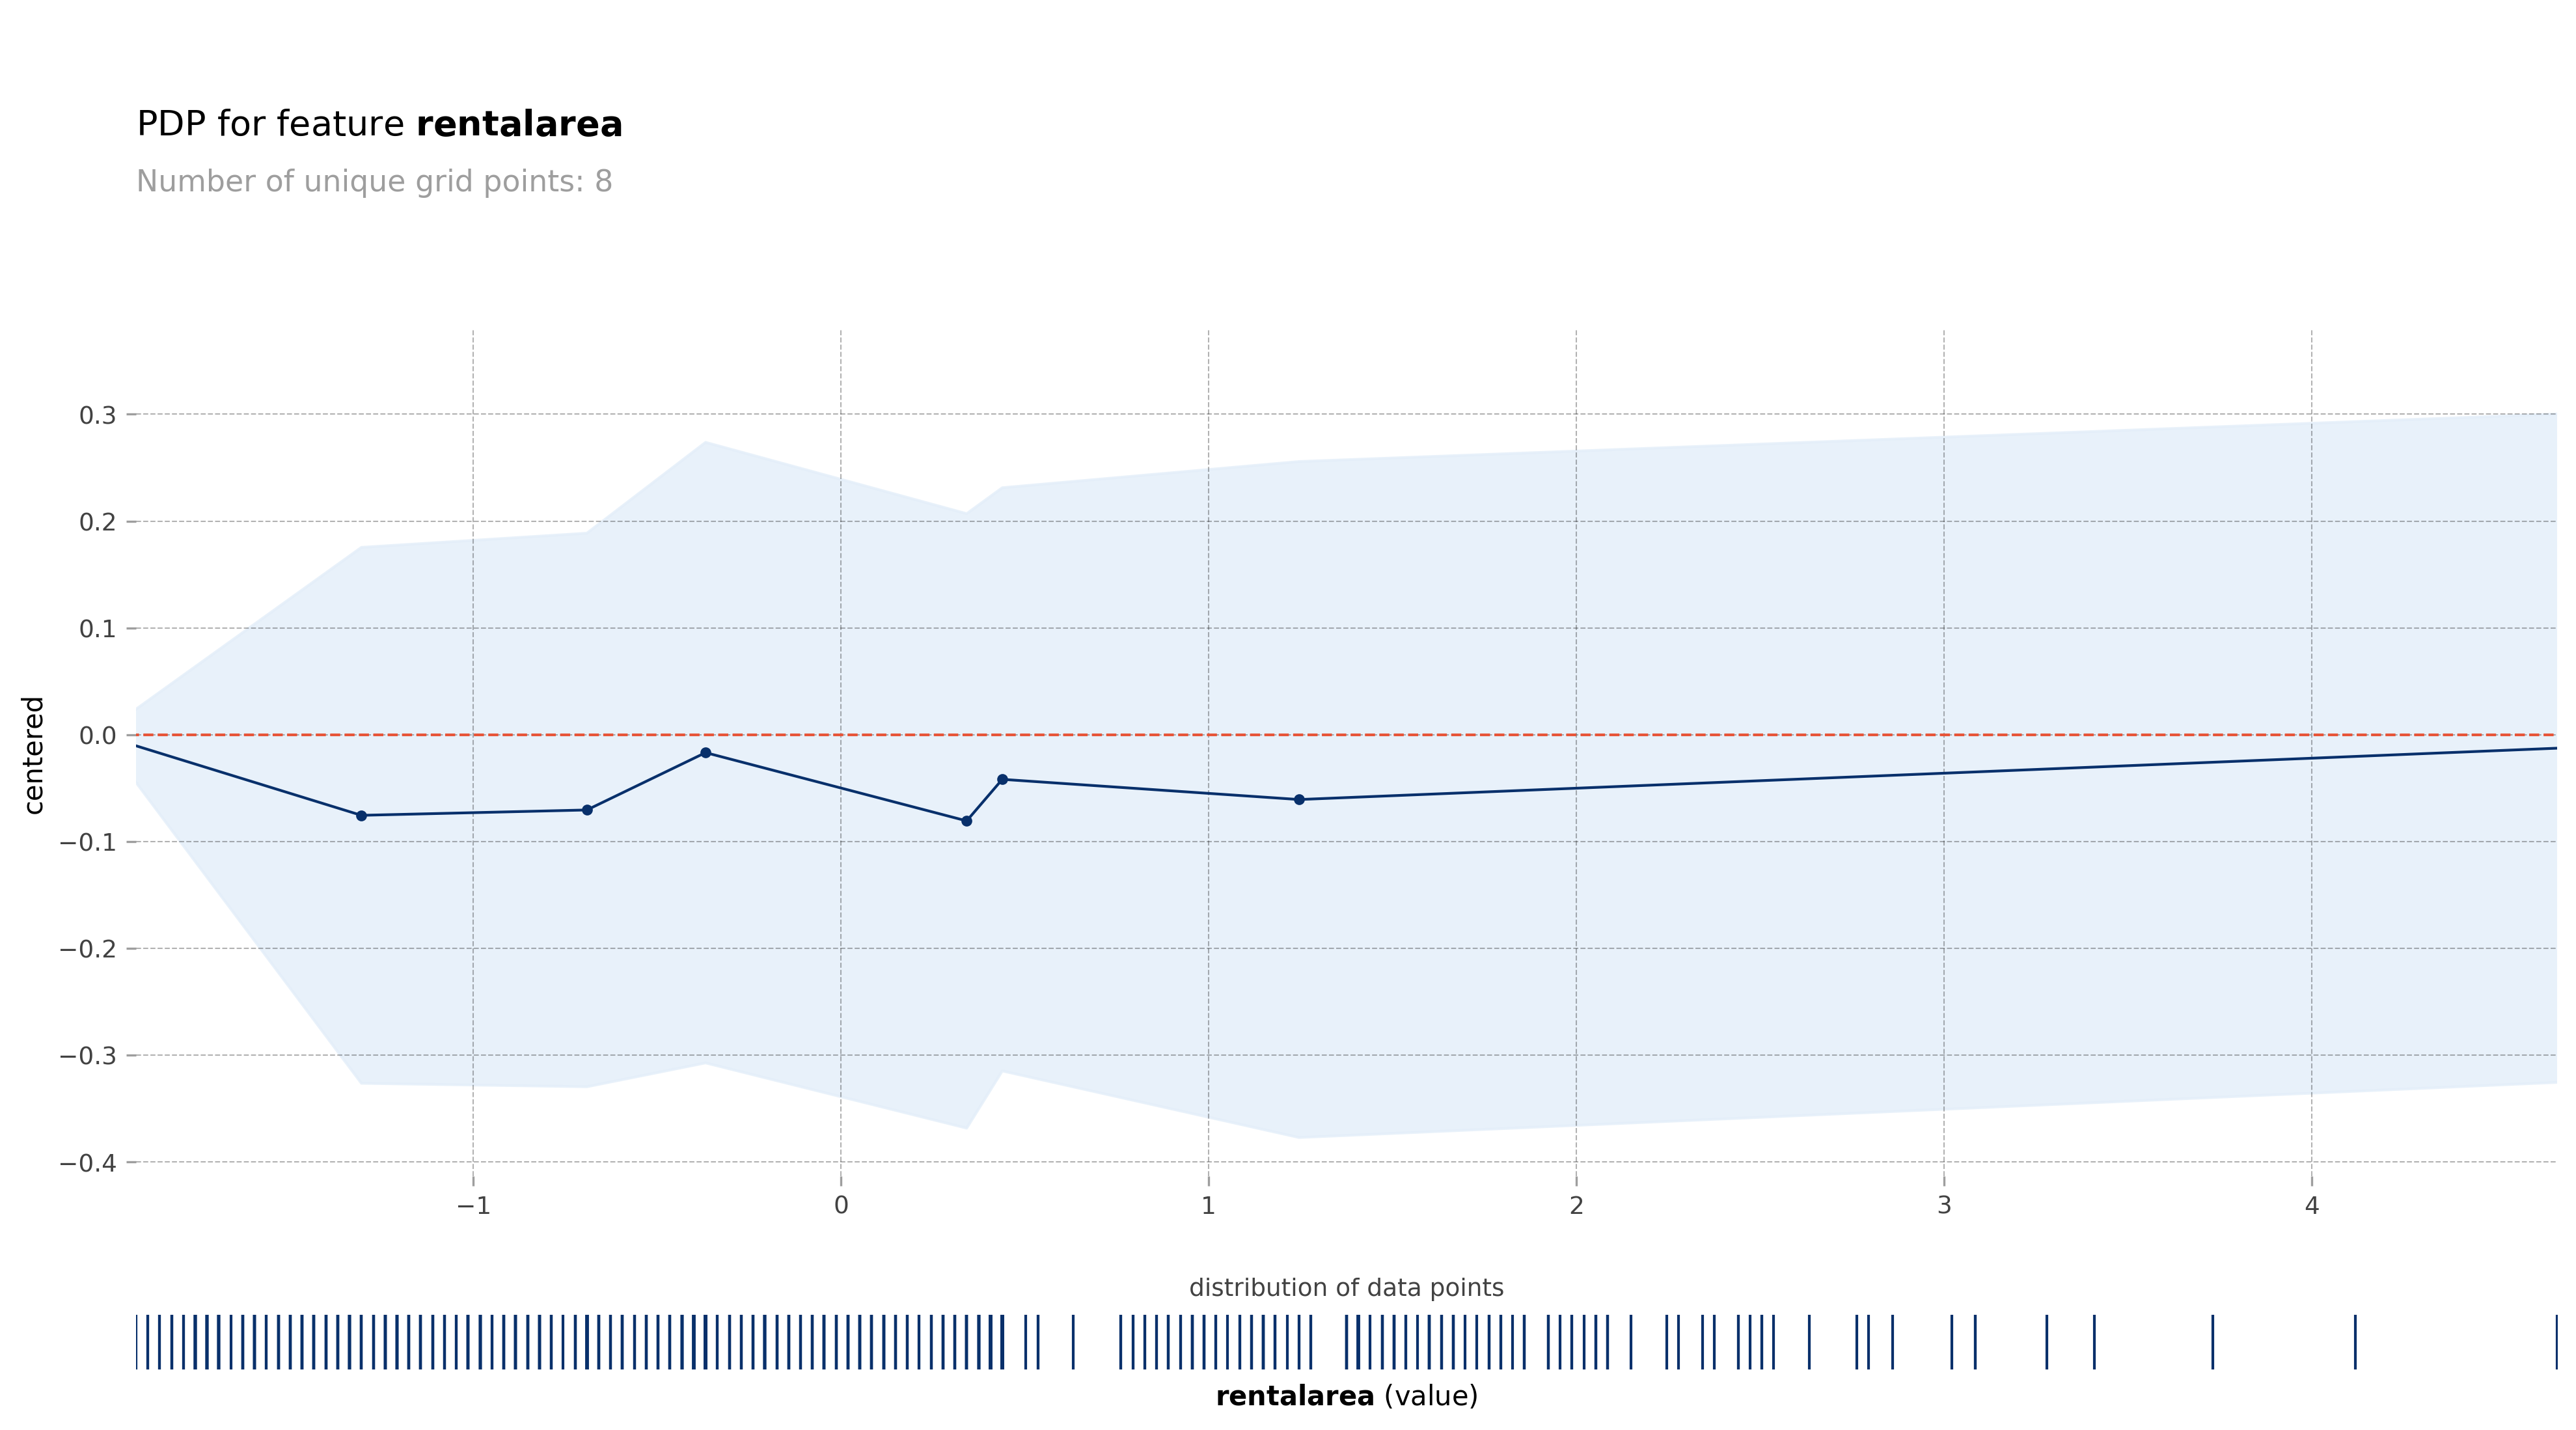

In [ ]:
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_isolate = PDPIsolate(df=X_test_preprocessed_df, feature=feature1, feature_name=feature1, model=model, model_features=X_test_preprocessed_df.columns)
pdp_isolate.plot(engine='matplotlib', plot_pts_dist=True)

In [ ]:
mappings = encoder.mapping

mapping_data2 = list(filter(lambda x: x["col"] == feature2, mappings))
mapping_data3 = list(filter(lambda x: x["col"] == feature3, mappings))
mapping_data4 = list(filter(lambda x: x["col"] == feature4, mappings))
mapping_data5 = list(filter(lambda x: x["col"] == feature5, mappings))
mapping_data6 = list(filter(lambda x: x["col"] == feature6, mappings))

print(mapping_data2)
print(mapping_data3)
print(mapping_data4)
print(mapping_data5)
print(mapping_data6)

[{'col': 'yearmonth', 'mapping': 2019.01      1
2022.05      2
2014.03      3
2014.09      4
2016.09      5
          ... 
2022.11    117
2017.11    118
2018.11    119
2016.11    120
NaN         -2
Length: 121, dtype: int64, 'data_type': dtype('O')}]
[{'col': 'YOC', 'mapping': 1975.0     1
2011.0     2
2014.0     3
1980.0     4
2001.0     5
2015.0     6
2010.0     7
2017.0     8
1978.0     9
2000.0    10
2002.0    11
2016.0    12
1988.0    13
2003.0    14
1994.0    15
1997.0    16
1996.0    17
2004.0    18
2008.0    19
1992.0    20
1986.0    21
2009.0    22
2007.0    23
1995.0    24
1990.0    25
2019.0    26
2018.0    27
2021.0    28
1999.0    29
1984.0    30
1998.0    31
1985.0    32
1991.0    33
1987.0    34
1989.0    35
1979.0    36
2013.0    37
1993.0    38
2006.0    39
2020.0    40
1974.0    41
2022.0    42
1982.0    43
1971.0    44
2005.0    45
1981.0    46
1983.0    47
2012.0    48
1970.0    49
1977.0    50
1976.0    51
1972.0    52
1973.0    53
1969.0    54
1968.0    55
1965.0 

In [ ]:
maps2 = mapping_data2[0]["mapping"]
maps3 = mapping_data3[0]["mapping"]
maps4 = mapping_data4[0]["mapping"]
maps5 = mapping_data5[0]["mapping"]
maps6 = mapping_data6[0]["mapping"]

encoded_features2 = maps2.values.tolist()
original_features2 = maps2.index.tolist()
encoded_features3 = maps3.values.tolist()
original_features3 = maps3.index.tolist()
encoded_features4 = maps4.values.tolist()
original_features4 = maps4.index.tolist()
encoded_features5 = maps5.values.tolist()
original_features5 = maps5.index.tolist()
encoded_features6 = maps6.values.tolist()
original_features6 = maps6.index.tolist()

In [ ]:
target_feature2 = 'yearmonth'
target_feature3 = 'YOC'
target_feature4 = 'borough'
target_feature5 = 'buildinguse'
target_feature6 = 'floor'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

([<matplotlib.axis.XTick at 0x7fcd7ab66e00>,
 [Text(1, 0, '2019.01'),
  Text(2, 0, '2022.05'),
  Text(3, 0, '2014.03'),
  Text(4, 0, '2014.09'),
  Text(5, 0, '2016.09'),
  Text(6, 0, '2018.02'),
  Text(7, 0, '2019.12'),
  Text(8, 0, '2015.08'),
  Text(9, 0, '2019.08'),
  Text(10, 0, '2017.03'),
  Text(11, 0, '2014.10'),
  Text(12, 0, '2014.02'),
  Text(13, 0, '2022.06'),
  Text(14, 0, '2020.06'),
  Text(15, 0, '2013.02'),
  Text(16, 0, '2021.05'),
  Text(17, 0, '2017.06'),
  Text(18, 0, '2022.02'),
  Text(19, 0, '2015.01'),
  Text(20, 0, '2014.12'),
  Text(21, 0, '2015.12'),
  Text(22, 0, '2018.03'),
  Text(23, 0, '2015.03'),
  Text(24, 0, '2018.07'),
  Text(25, 0, '2016.04'),
  Text(26, 0, '2021.06'),
  Text(27, 0, '2015.07'),
  Text(28, 0, '2017.05'),
  Text(29, 0, '2020.02'),
  Text(30, 0, '2021.07'),
  Text(31, 0, '2016.01'),
  Text(32, 0, '2019.09'),
  Text(33, 0, '2018.01'),
  Text(34, 0, '2020.01'),
  Text(35, 0, '2022.08'),
  Text(36, 0, '2019.05'),
  Text(37, 0, '2015.11'),
  

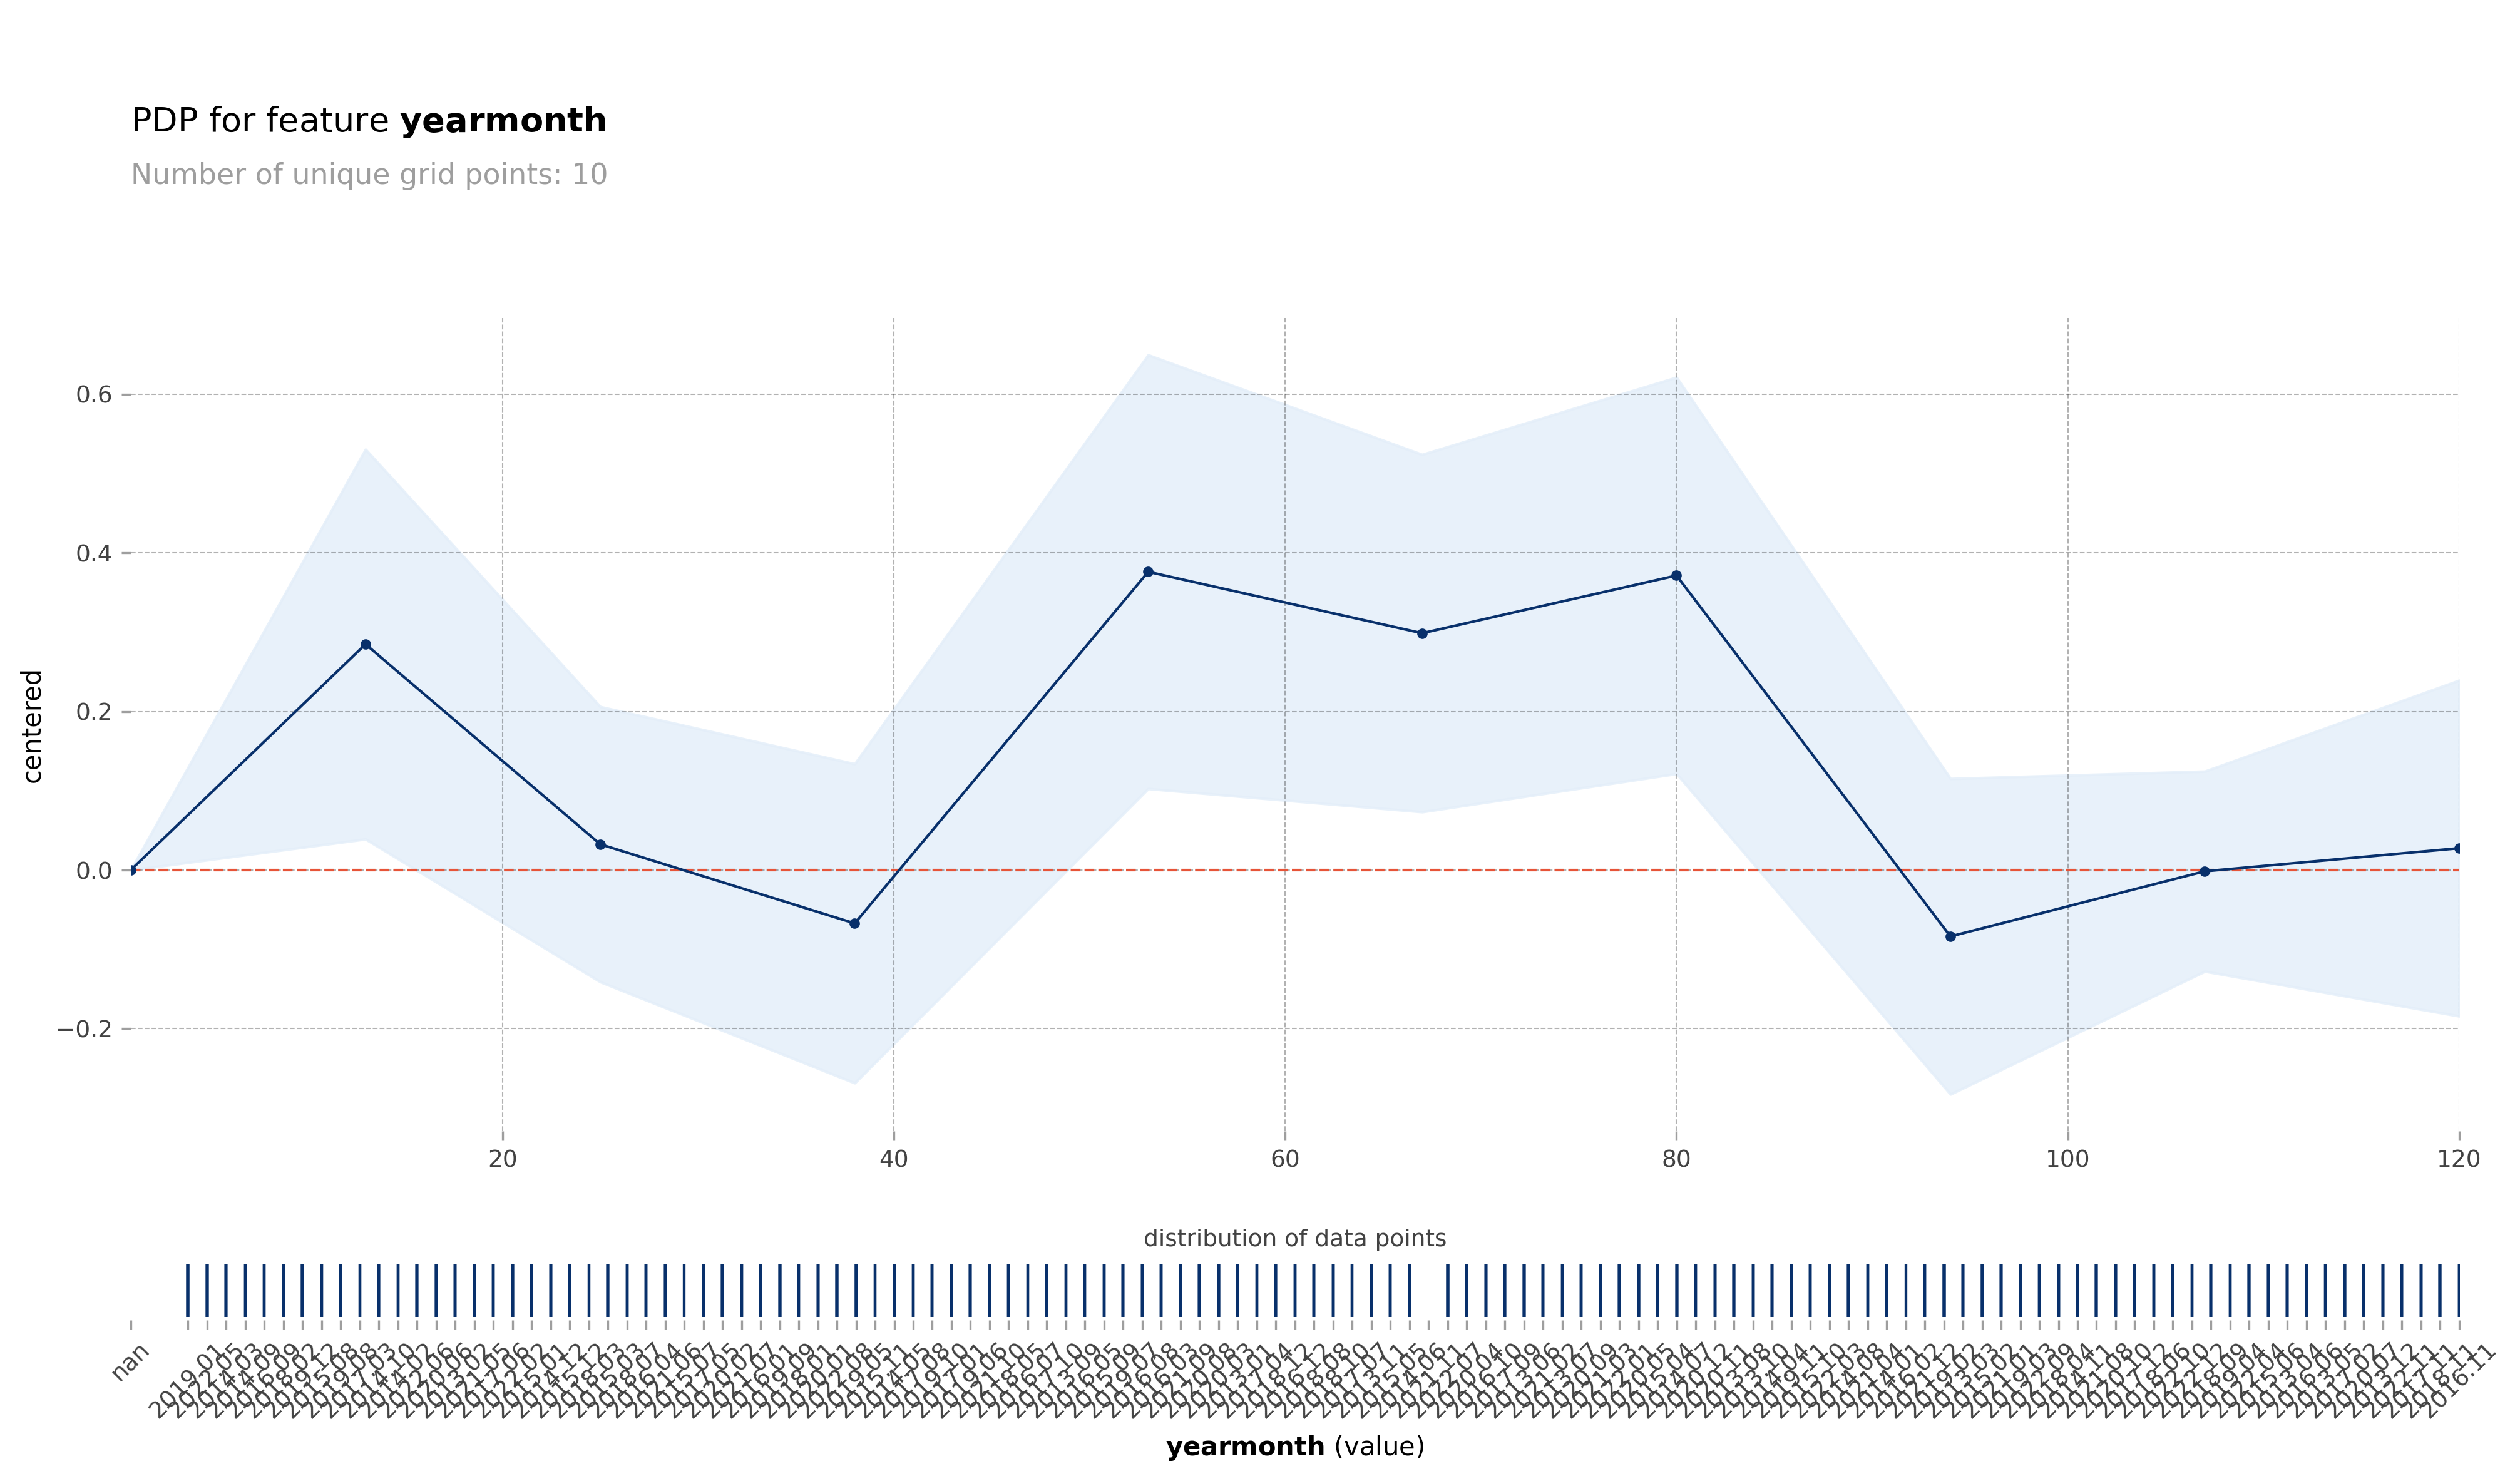

In [ ]:
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_isolate22 = PDPIsolate(
    df=X_test_preprocessed_df,
    feature=target_feature2,
    feature_name=target_feature2,
    model=model,
    model_features=X_test_preprocessed_df.columns)
pdp_isolate22.plot(engine='matplotlib', plot_pts_dist=True)
plt.xticks(encoded_features2, original_features2, rotation=45)

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

([<matplotlib.axis.XTick at 0x7fcd7a7650f0>,
 [Text(1, 0, '1975.0'),
  Text(2, 0, '2011.0'),
  Text(3, 0, '2014.0'),
  Text(4, 0, '1980.0'),
  Text(5, 0, '2001.0'),
  Text(6, 0, '2015.0'),
  Text(7, 0, '2010.0'),
  Text(8, 0, '2017.0'),
  Text(9, 0, '1978.0'),
  Text(10, 0, '2000.0'),
  Text(11, 0, '2002.0'),
  Text(12, 0, '2016.0'),
  Text(13, 0, '1988.0'),
  Text(14, 0, '2003.0'),
  Text(15, 0, '1994.0'),
  Text(16, 0, '1997.0'),
  Text(17, 0, '1996.0'),
  Text(18, 0, '2004.0'),
  Text(19, 0, '2008.0'),
  Text(20, 0, '1992.0'),
  Text(21, 0, '1986.0'),
  Text(22, 0, '2009.0'),
  Text(23, 0, '2007.0'),
  Text(24, 0, '1995.0'),
  Text(25, 0, '1990.0'),
  Text(26, 0, '2019.0'),
  Text(27, 0, '2018.0'),
  Text(28, 0, '2021.0'),
  Text(29, 0, '1999.0'),
  Text(30, 0, '1984.0'),
  Text(31, 0, '1998.0'),
  Text(32, 0, '1985.0'),
  Text(33, 0, '1991.0'),
  Text(34, 0, '1987.0'),
  Text(35, 0, '1989.0'),
  Text(36, 0, '1979.0'),
  Text(37, 0, '2013.0'),
  Text(38, 0, '1993.0'),
  Text(39, 0, 

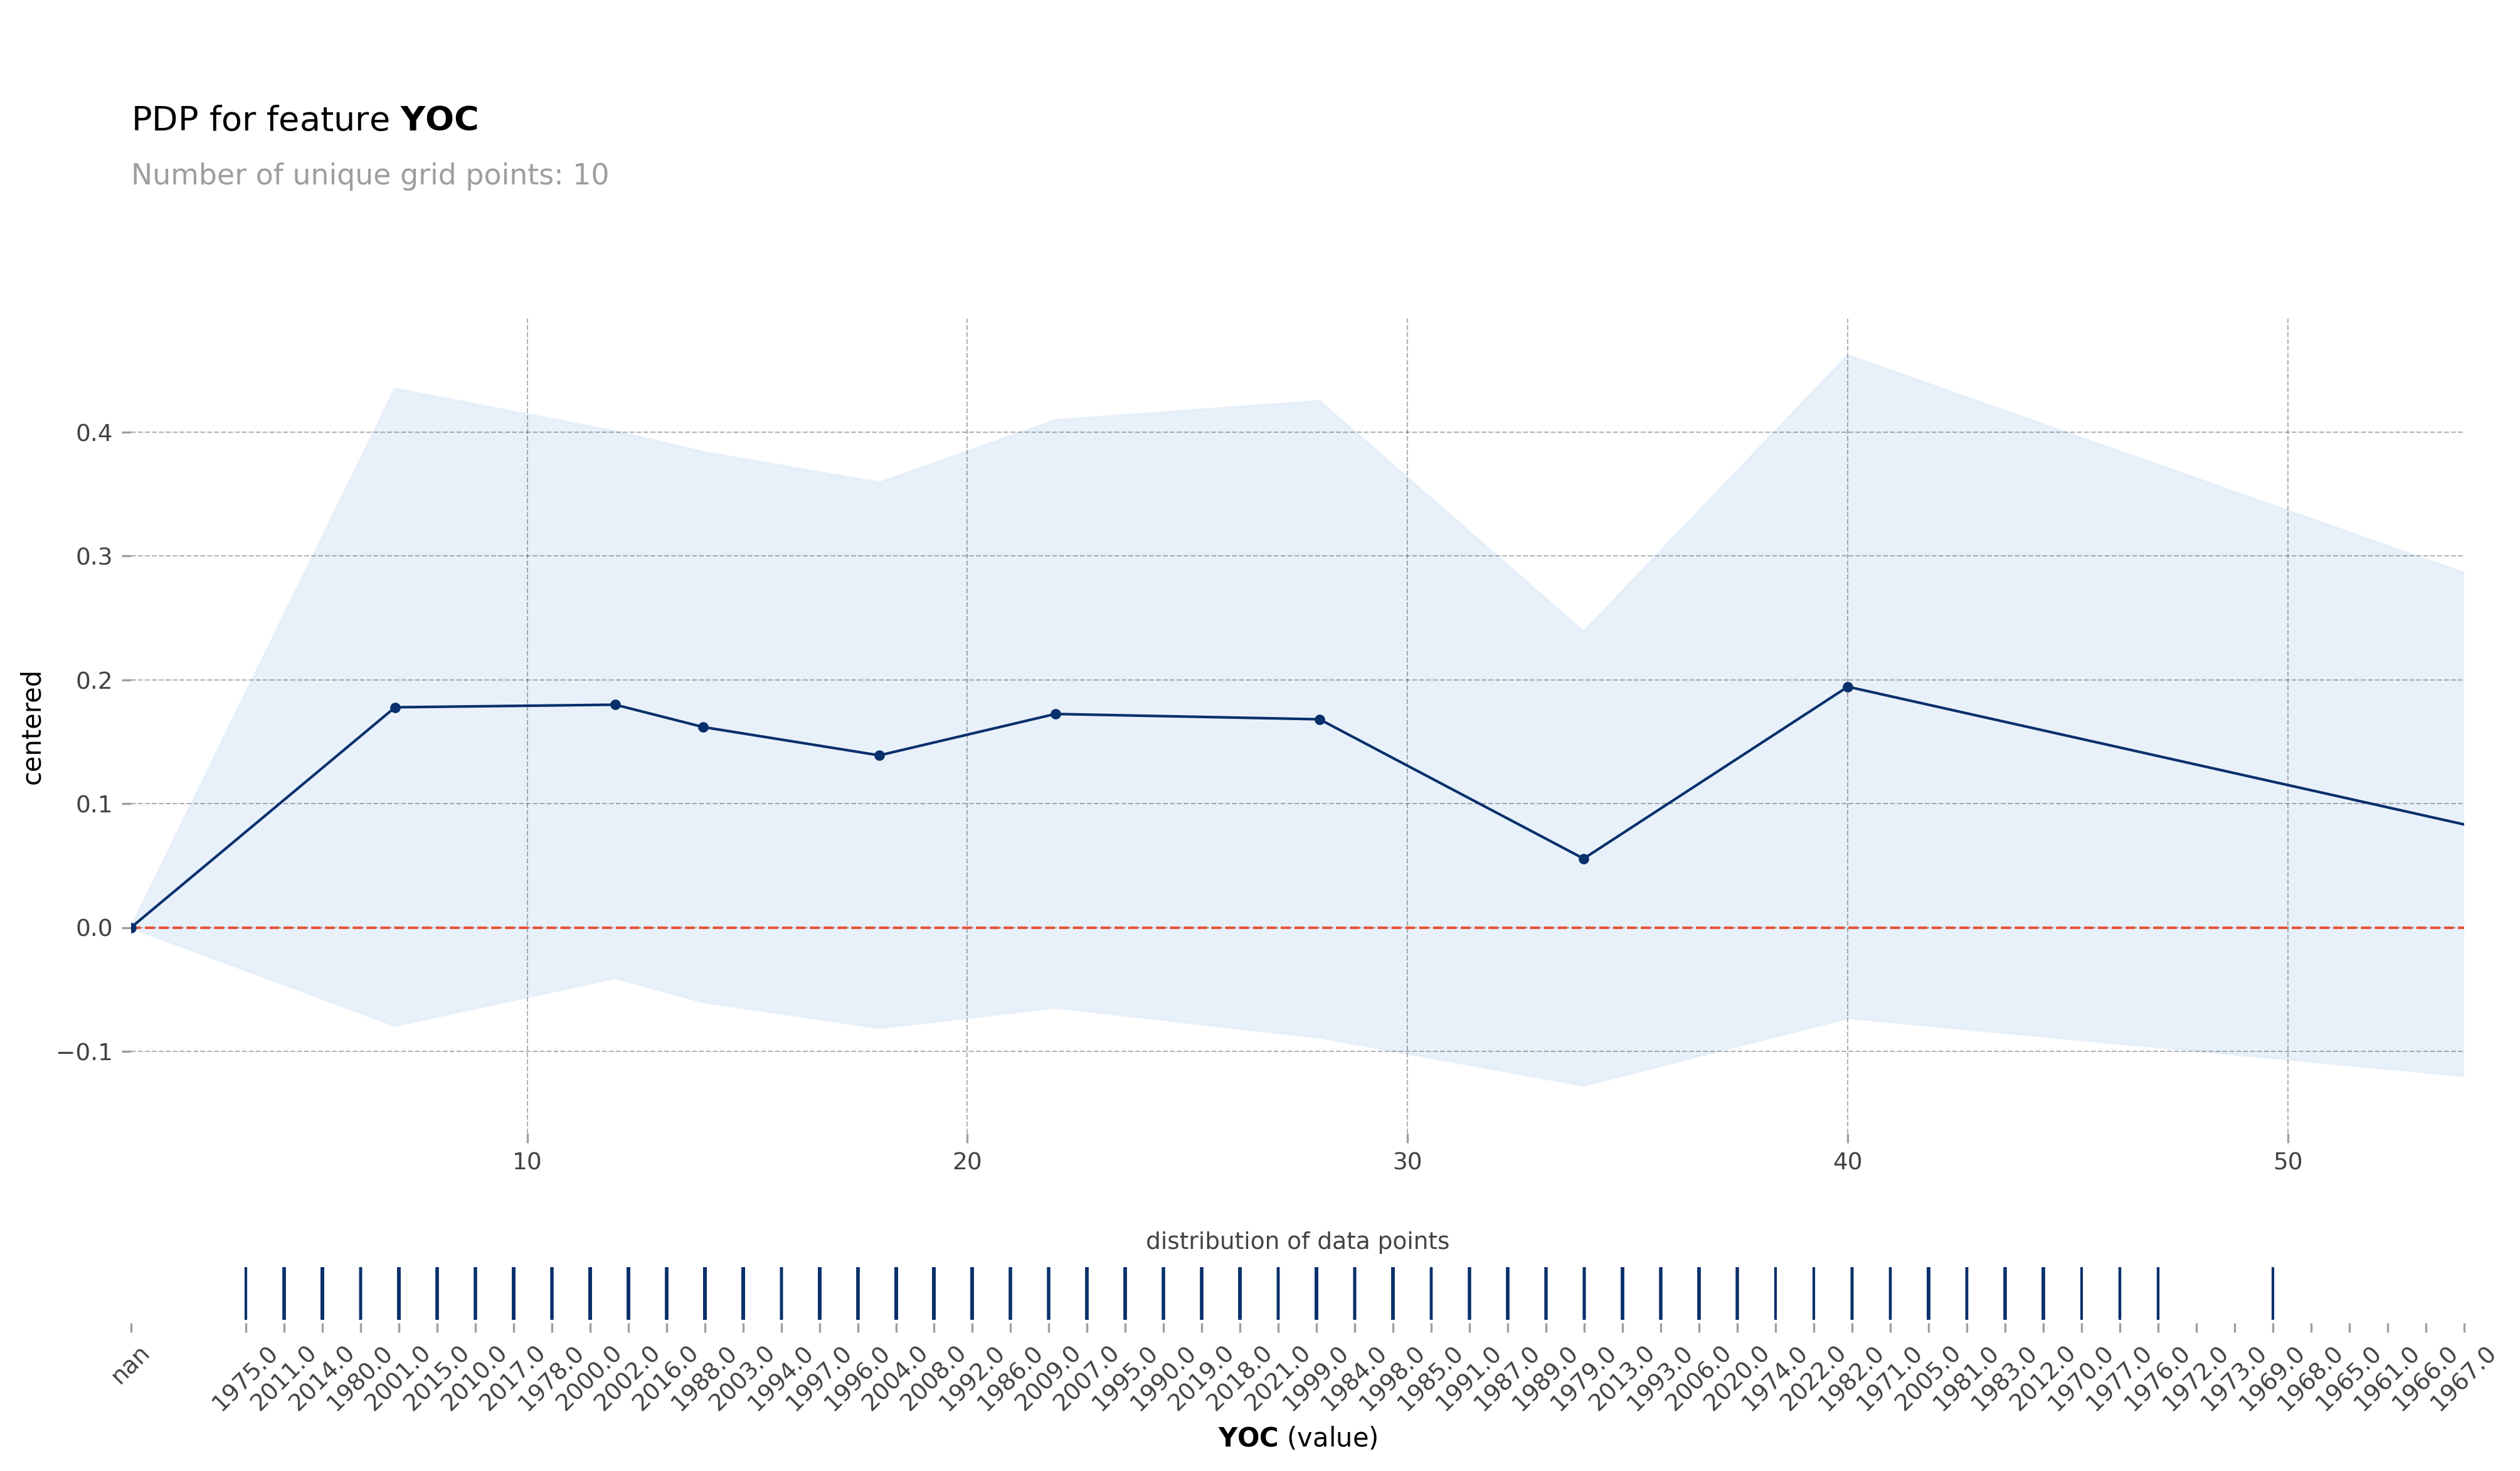

In [ ]:
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_isolate33 = PDPIsolate(
    df=X_test_preprocessed_df,
    feature=target_feature3,
    feature_name=target_feature3,
    model=model,
    model_features=X_test_preprocessed_df.columns)
pdp_isolate33.plot(engine='matplotlib', plot_pts_dist=True)
plt.xticks(encoded_features3, original_features3, rotation=45)

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

([<matplotlib.axis.XTick at 0x7fcd7a9aaa40>,
 [Text(1, 0, 'seocho'),
  Text(2, 0, 'dongdaemungu'),
  Text(3, 0, 'geumcheon'),
  Text(4, 0, 'gangdong'),
  Text(5, 0, 'seongdong'),
  Text(6, 0, 'yeongdengpo'),
  Text(7, 0, 'eunpyeong'),
  Text(8, 0, 'gangseo'),
  Text(9, 0, 'songpa'),
  Text(10, 0, 'seongbuk'),
  Text(11, 0, 'dongjak'),
  Text(12, 0, 'jungrang'),
  Text(13, 0, 'gwangjin'),
  Text(14, 0, 'jongro'),
  Text(15, 0, 'seodaemun'),
  Text(16, 0, 'nowon'),
  Text(17, 0, 'gwanak'),
  Text(18, 0, 'yangcheon'),
  Text(19, 0, 'dobong'),
  Text(20, 0, 'yongsan'),
  Text(21, 0, 'gangnam'),
  Text(22, 0, 'guro'),
  Text(23, 0, 'mapo'),
  Text(24, 0, 'gangbuk'),
  Text(25, 0, 'jung'),
  Text(-2, 0, 'nan')])

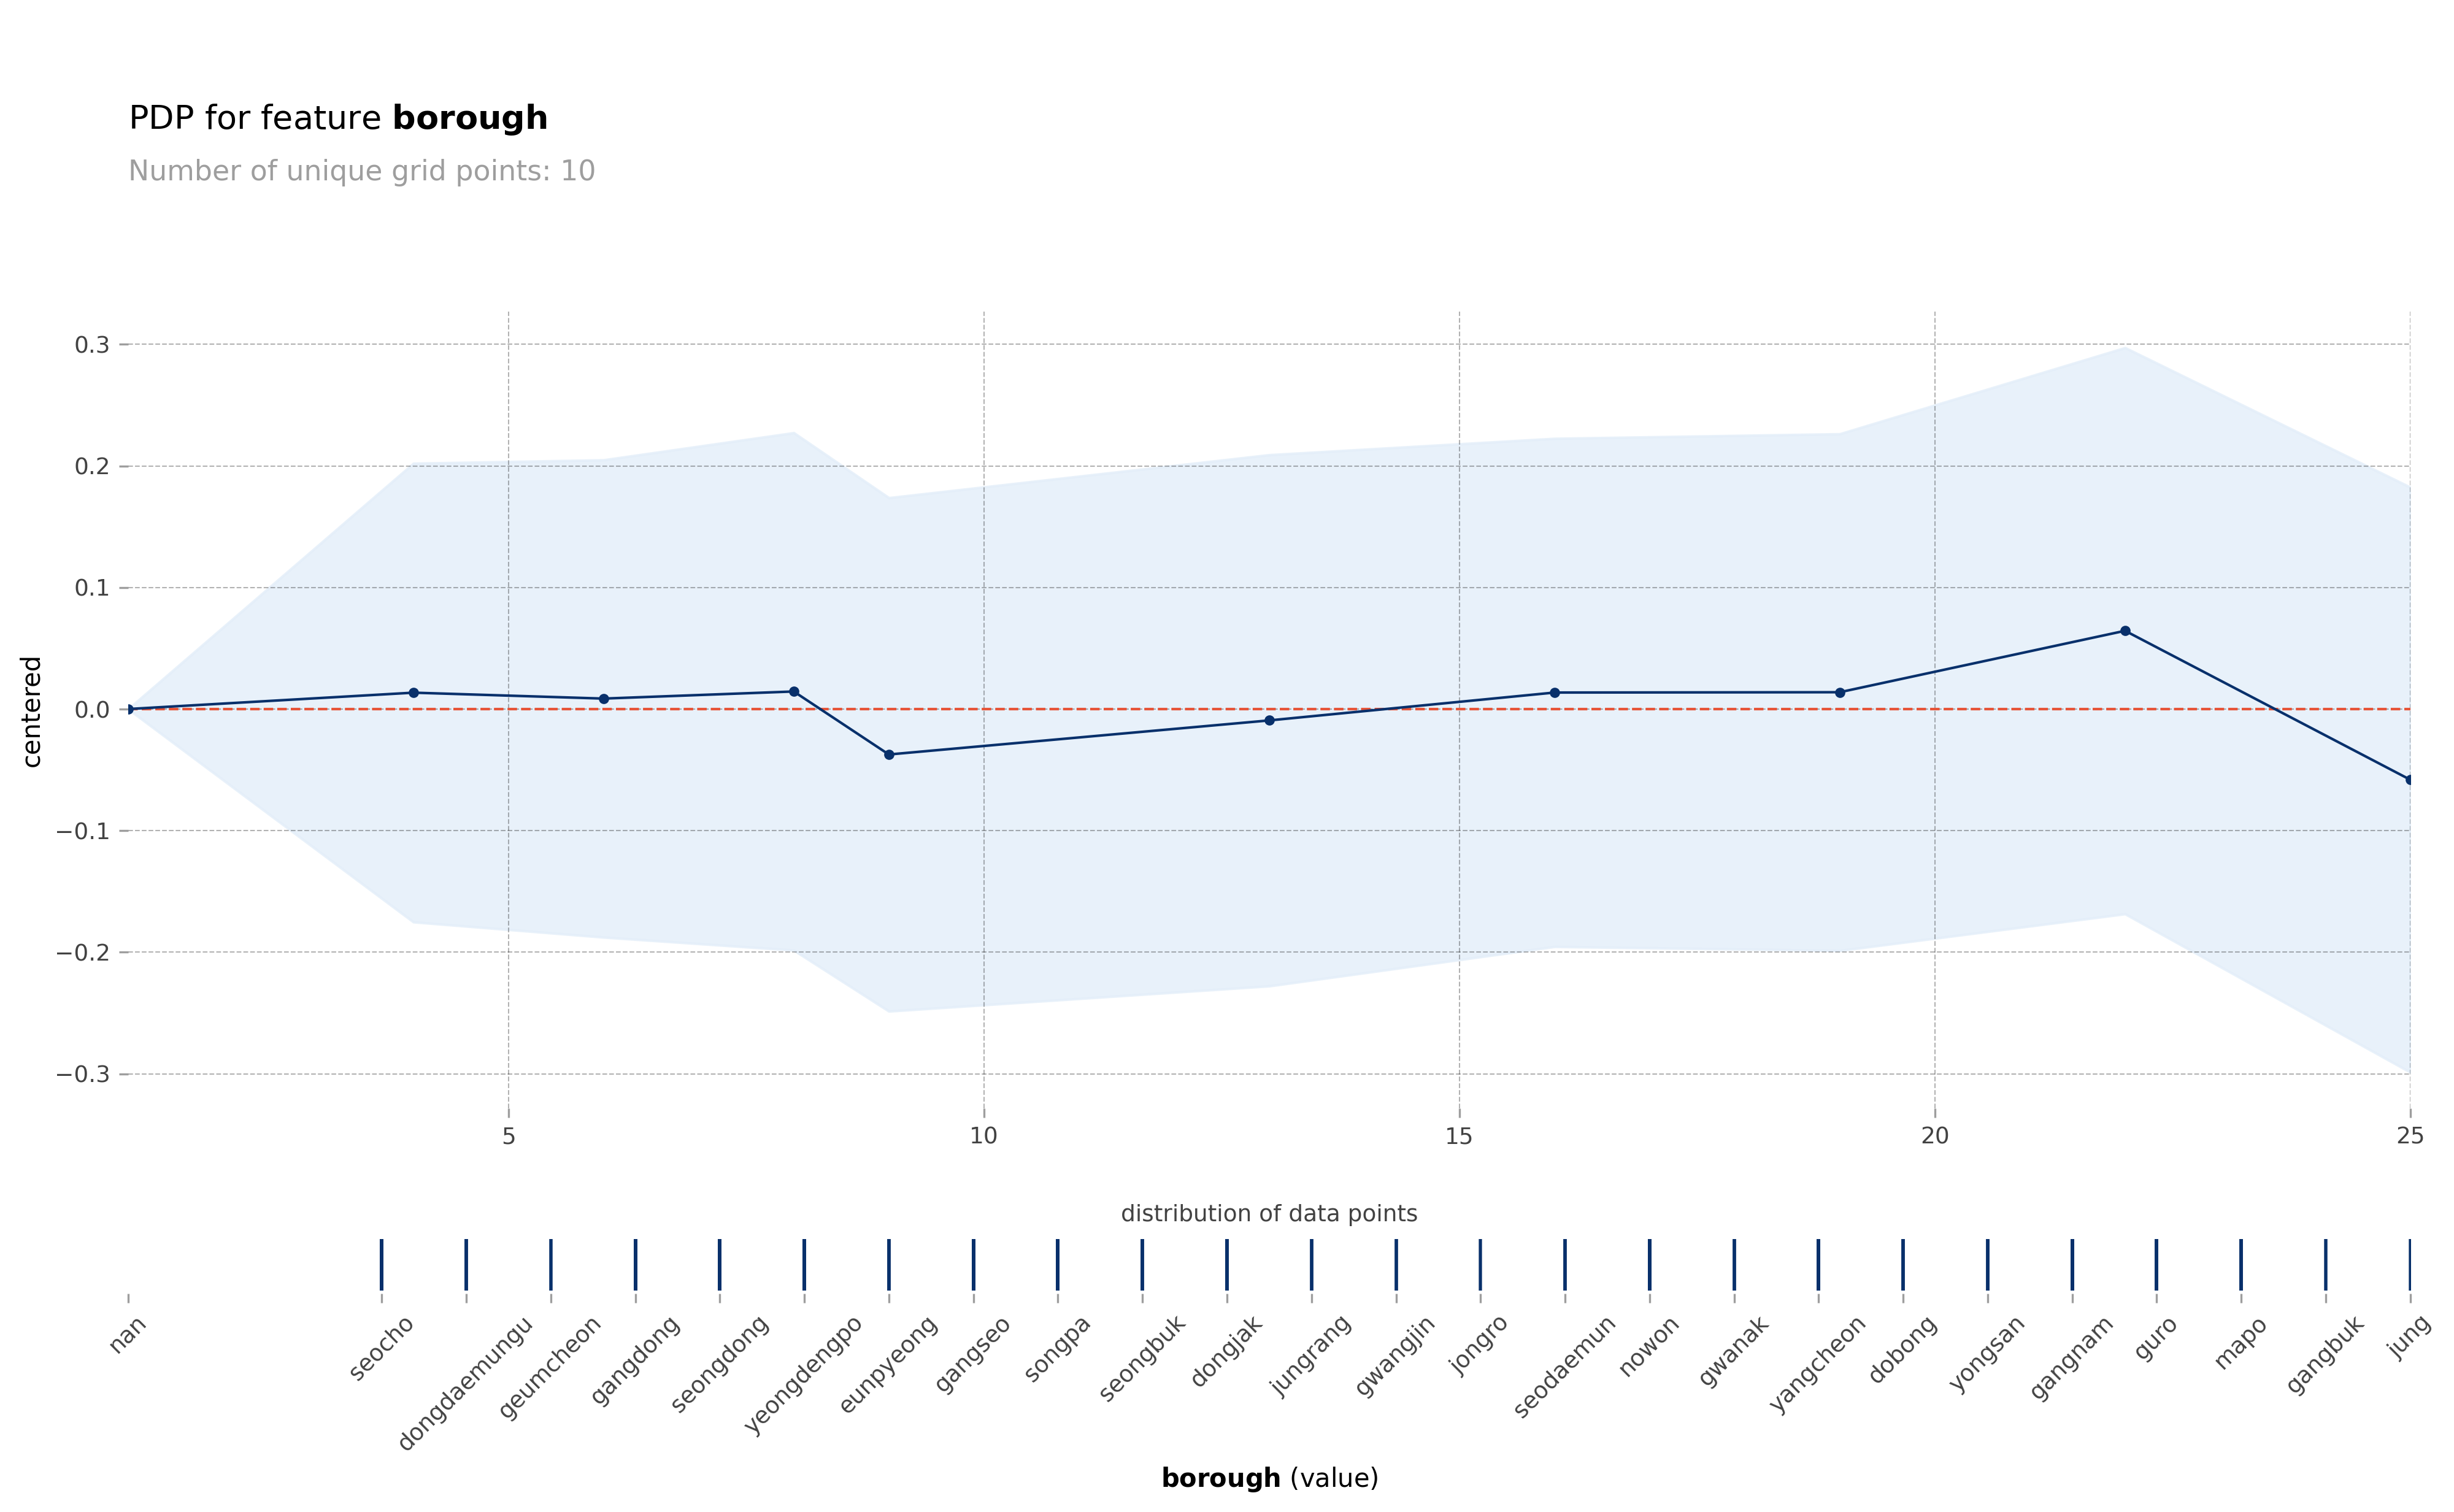

In [ ]:
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_isolate44 = PDPIsolate(
    df=X_test_preprocessed_df,
    feature=target_feature4,
    feature_name=target_feature4,
    model=model,
    model_features=X_test_preprocessed_df.columns)
pdp_isolate44.plot(engine='matplotlib', plot_pts_dist=True)
plt.xticks(encoded_features4, original_features4, rotation=45)

obtain pred_func from the provided model.


  0%|          | 0/2 [00:00<?, ?it/s]

([<matplotlib.axis.XTick at 0x7fcd74dca530>,
 [Text(1, 0, 'apartment'), Text(2, 0, 'Officetels'), Text(-2, 0, 'nan')])

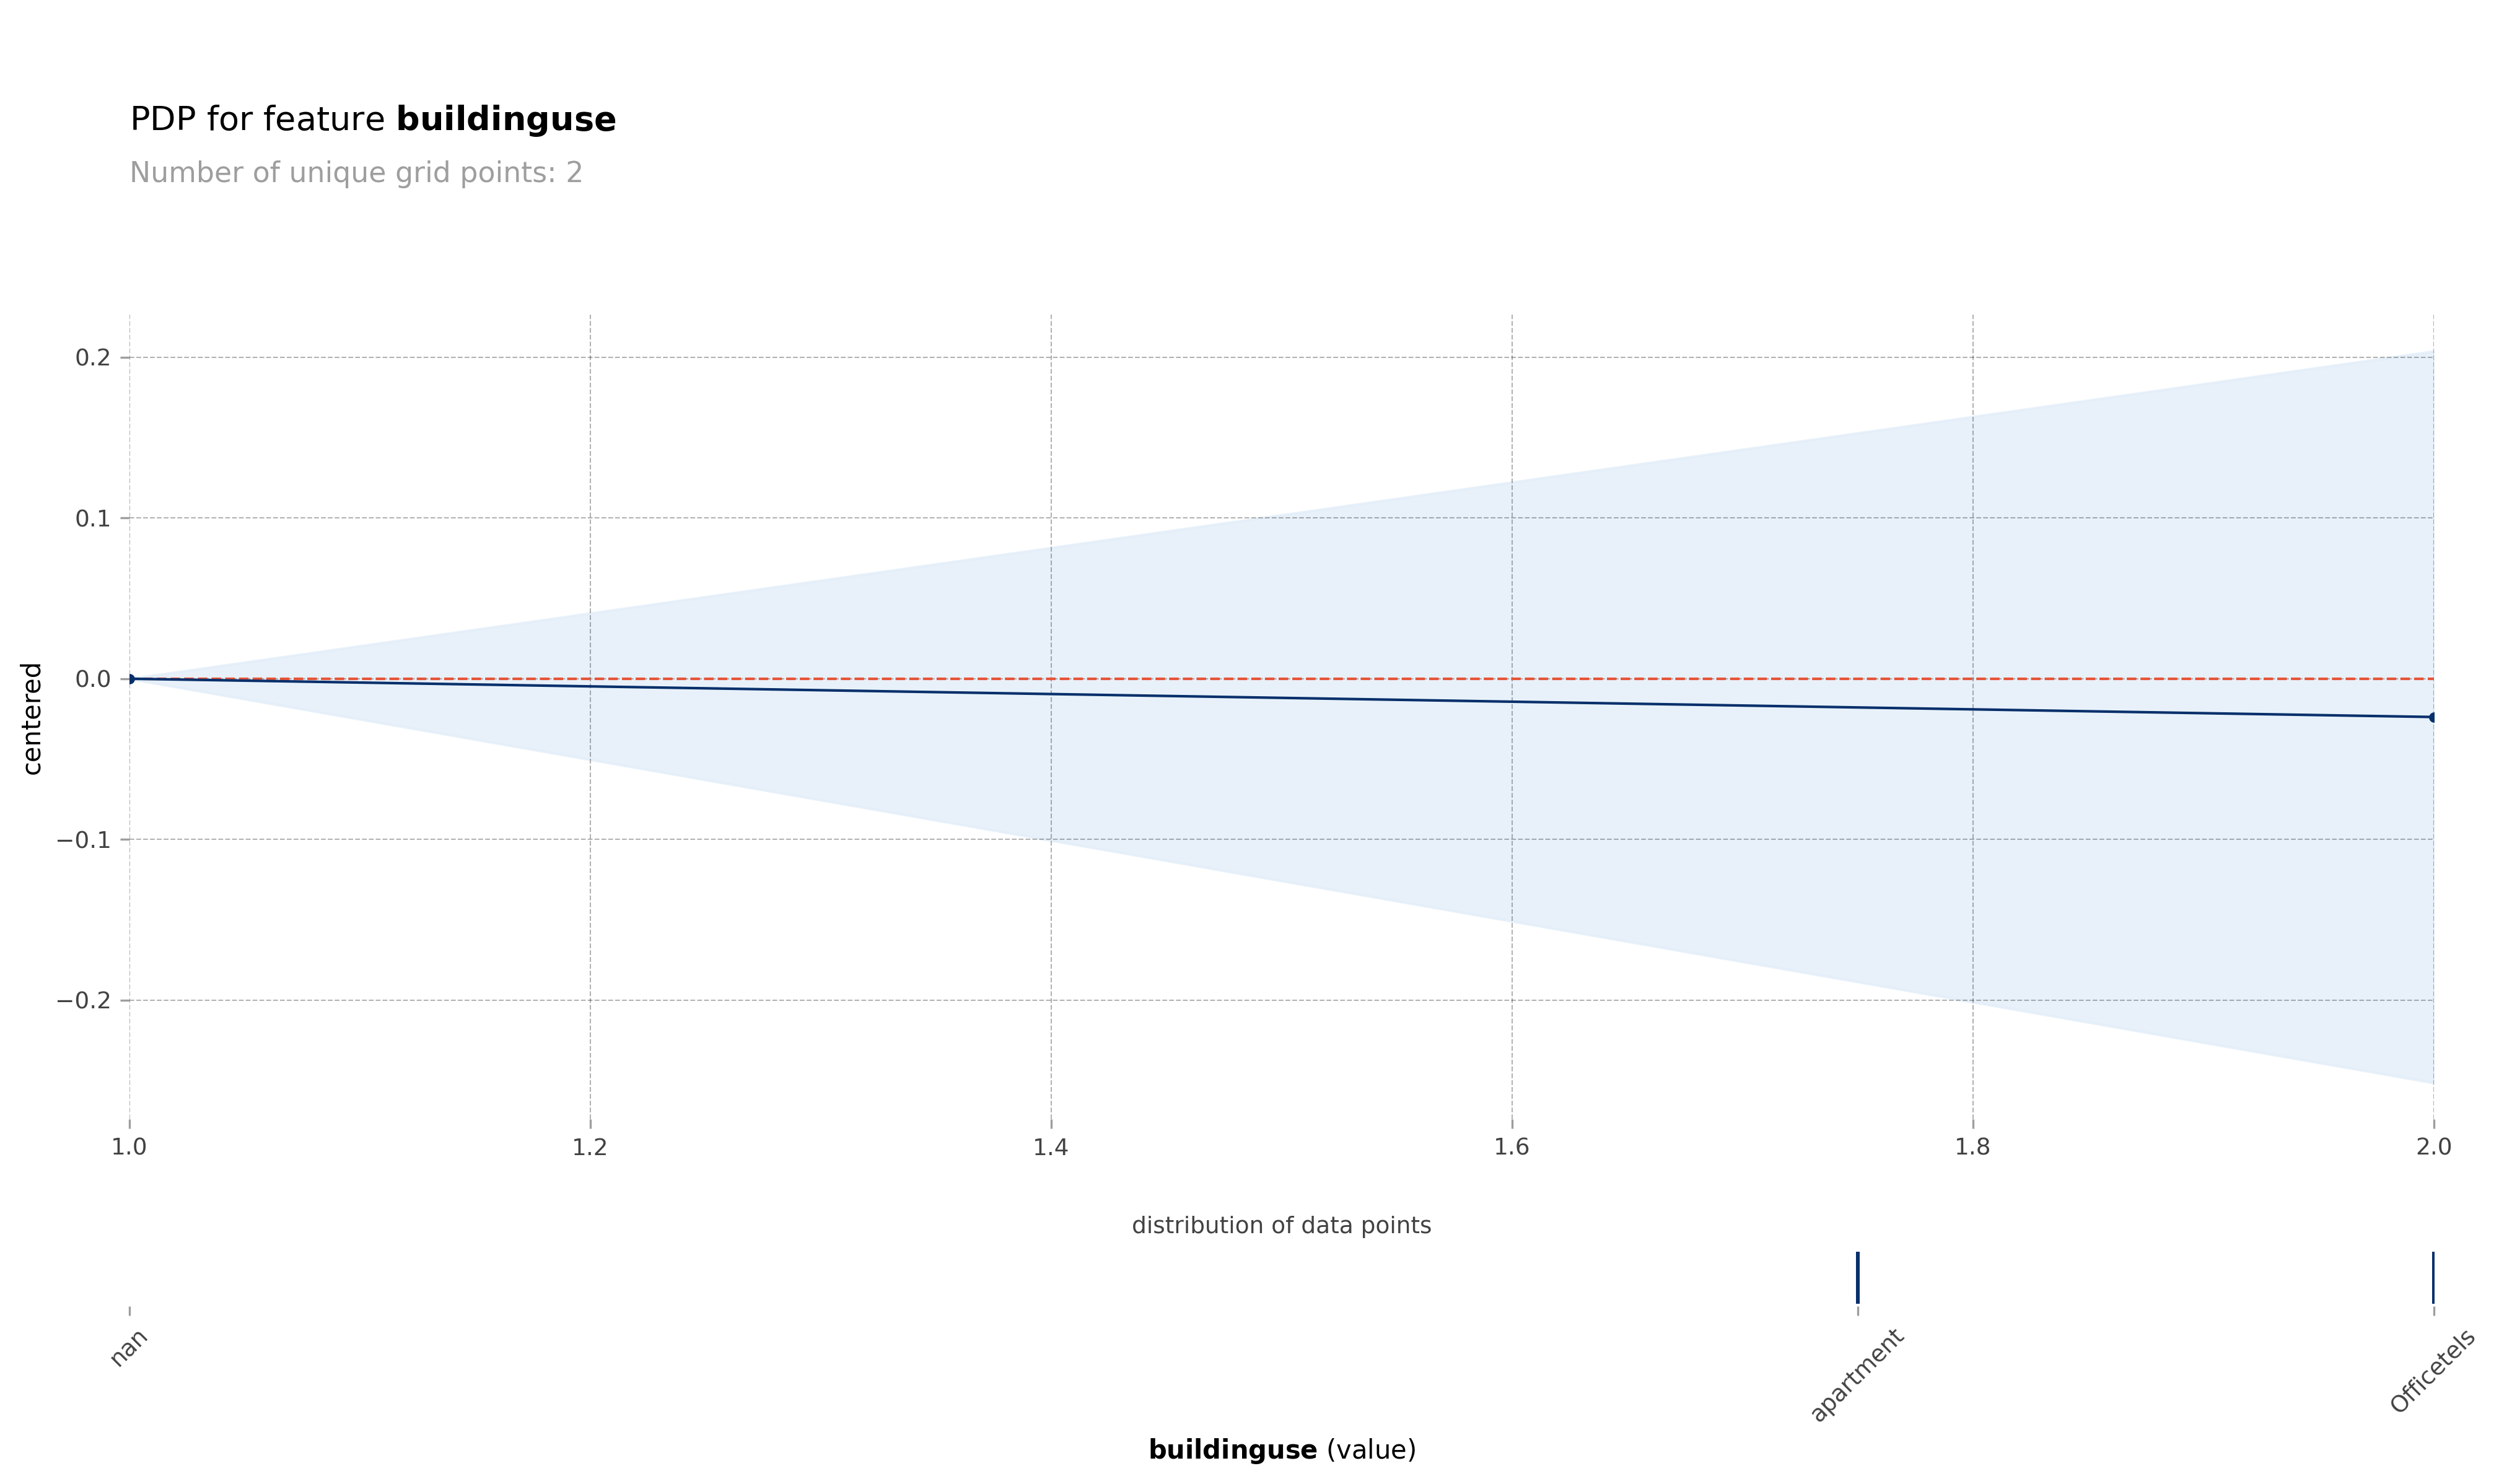

In [ ]:
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_isolate55 = PDPIsolate(
    df=X_test_preprocessed_df,
    feature=target_feature5,
    feature_name=target_feature5,
    model=model,
    model_features=X_test_preprocessed_df.columns)
pdp_isolate55.plot(engine='matplotlib', plot_pts_dist=True)
plt.xticks(encoded_features5, original_features5, rotation=45)

obtain pred_func from the provided model.


  0%|          | 0/3 [00:00<?, ?it/s]

([<matplotlib.axis.XTick at 0x7fcd6f366fb0>,
 [Text(1, 0, '3.0'), Text(2, 0, '1.0'), Text(3, 0, '2.0'), Text(-2, 0, 'nan')])

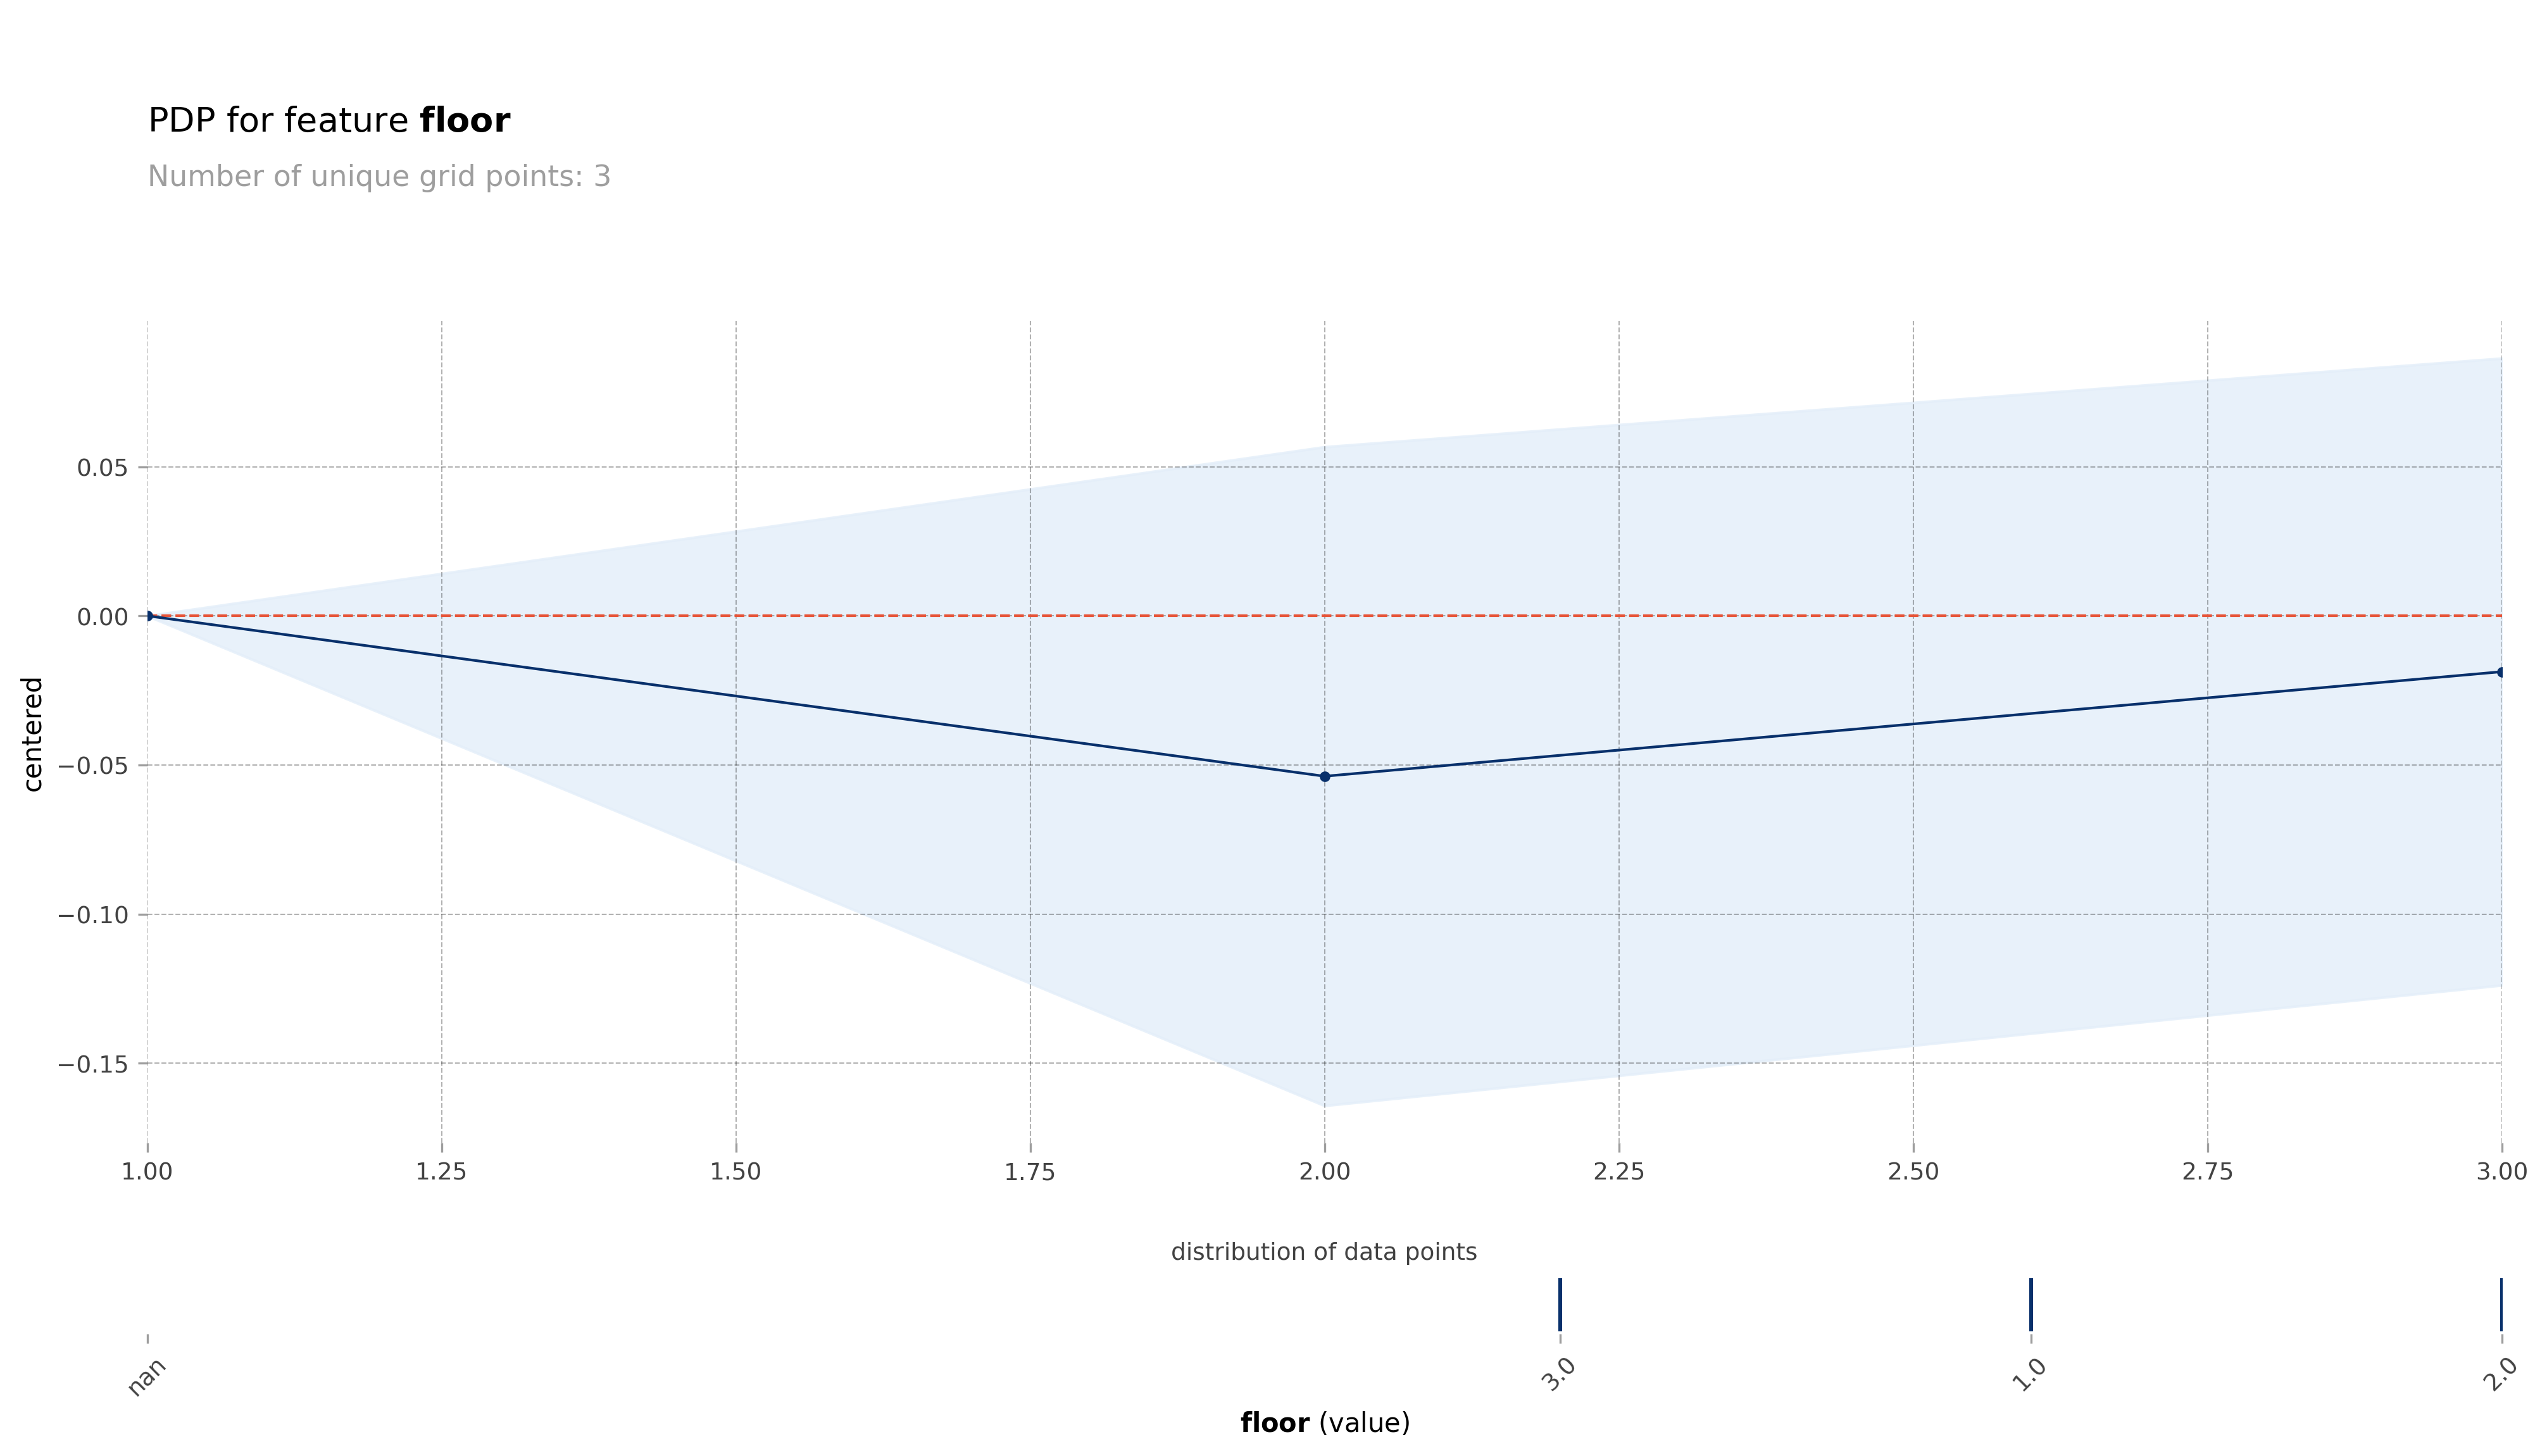

In [ ]:
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_isolate66 = PDPIsolate(
    df=X_test_preprocessed_df,
    feature=target_feature6,
    feature_name=target_feature6,
    model=model,
    model_features=X_test_preprocessed_df.columns)
pdp_isolate66.plot(engine='matplotlib', plot_pts_dist=True)
plt.xticks(encoded_features6, original_features6, rotation=45)

##### PDP interactive

In [ ]:
from pdpbox.pdp import PDPIsolate, PDPInteract

In [ ]:
# 2가지 특성으로 조사
# yearmonth & YOC : 범주가 너무 많음!

#target_features1 = ['rentalarea', 'yearmonth']
#target_features2 = ['rentalarea', 'YOC']
target_features3 = ['rentalarea', 'borough']
target_features4 = ['rentalarea', 'buildinguse']
target_features5 = ['rentalarea', 'floor']
#target_features6 = ['yearmonth', 'YOC']
#target_features7 = ['yearmonth', 'borough']
#target_features8 = ['yearmonth', 'buildinguse']
#target_features9 = ['yearmonth', 'floor']
#target_features10 = ['YOC', 'borough']
#target_features11 = ['YOC', 'buildinguse']
#target_features12 = ['YOC', 'floor']
target_features13 = ['borough', 'buildinguse']
target_features14 = ['borough', 'floor']
target_features15 = ['buildinguse', 'floor']

obtain pred_func from the provided model.


  0%|          | 0/8 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/25 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/200 [00:00<?, ?it/s]

(<Figure size 4800x2700 with 3 Axes>,
 {'title_axes': <Axes: >,
  'interact_axes': [<Axes: xlabel='$\\bf{rentalarea}$ (value)', ylabel='$\\bf{borough}$ (value)'>],
  'isolate_axes': [[None, None]]})

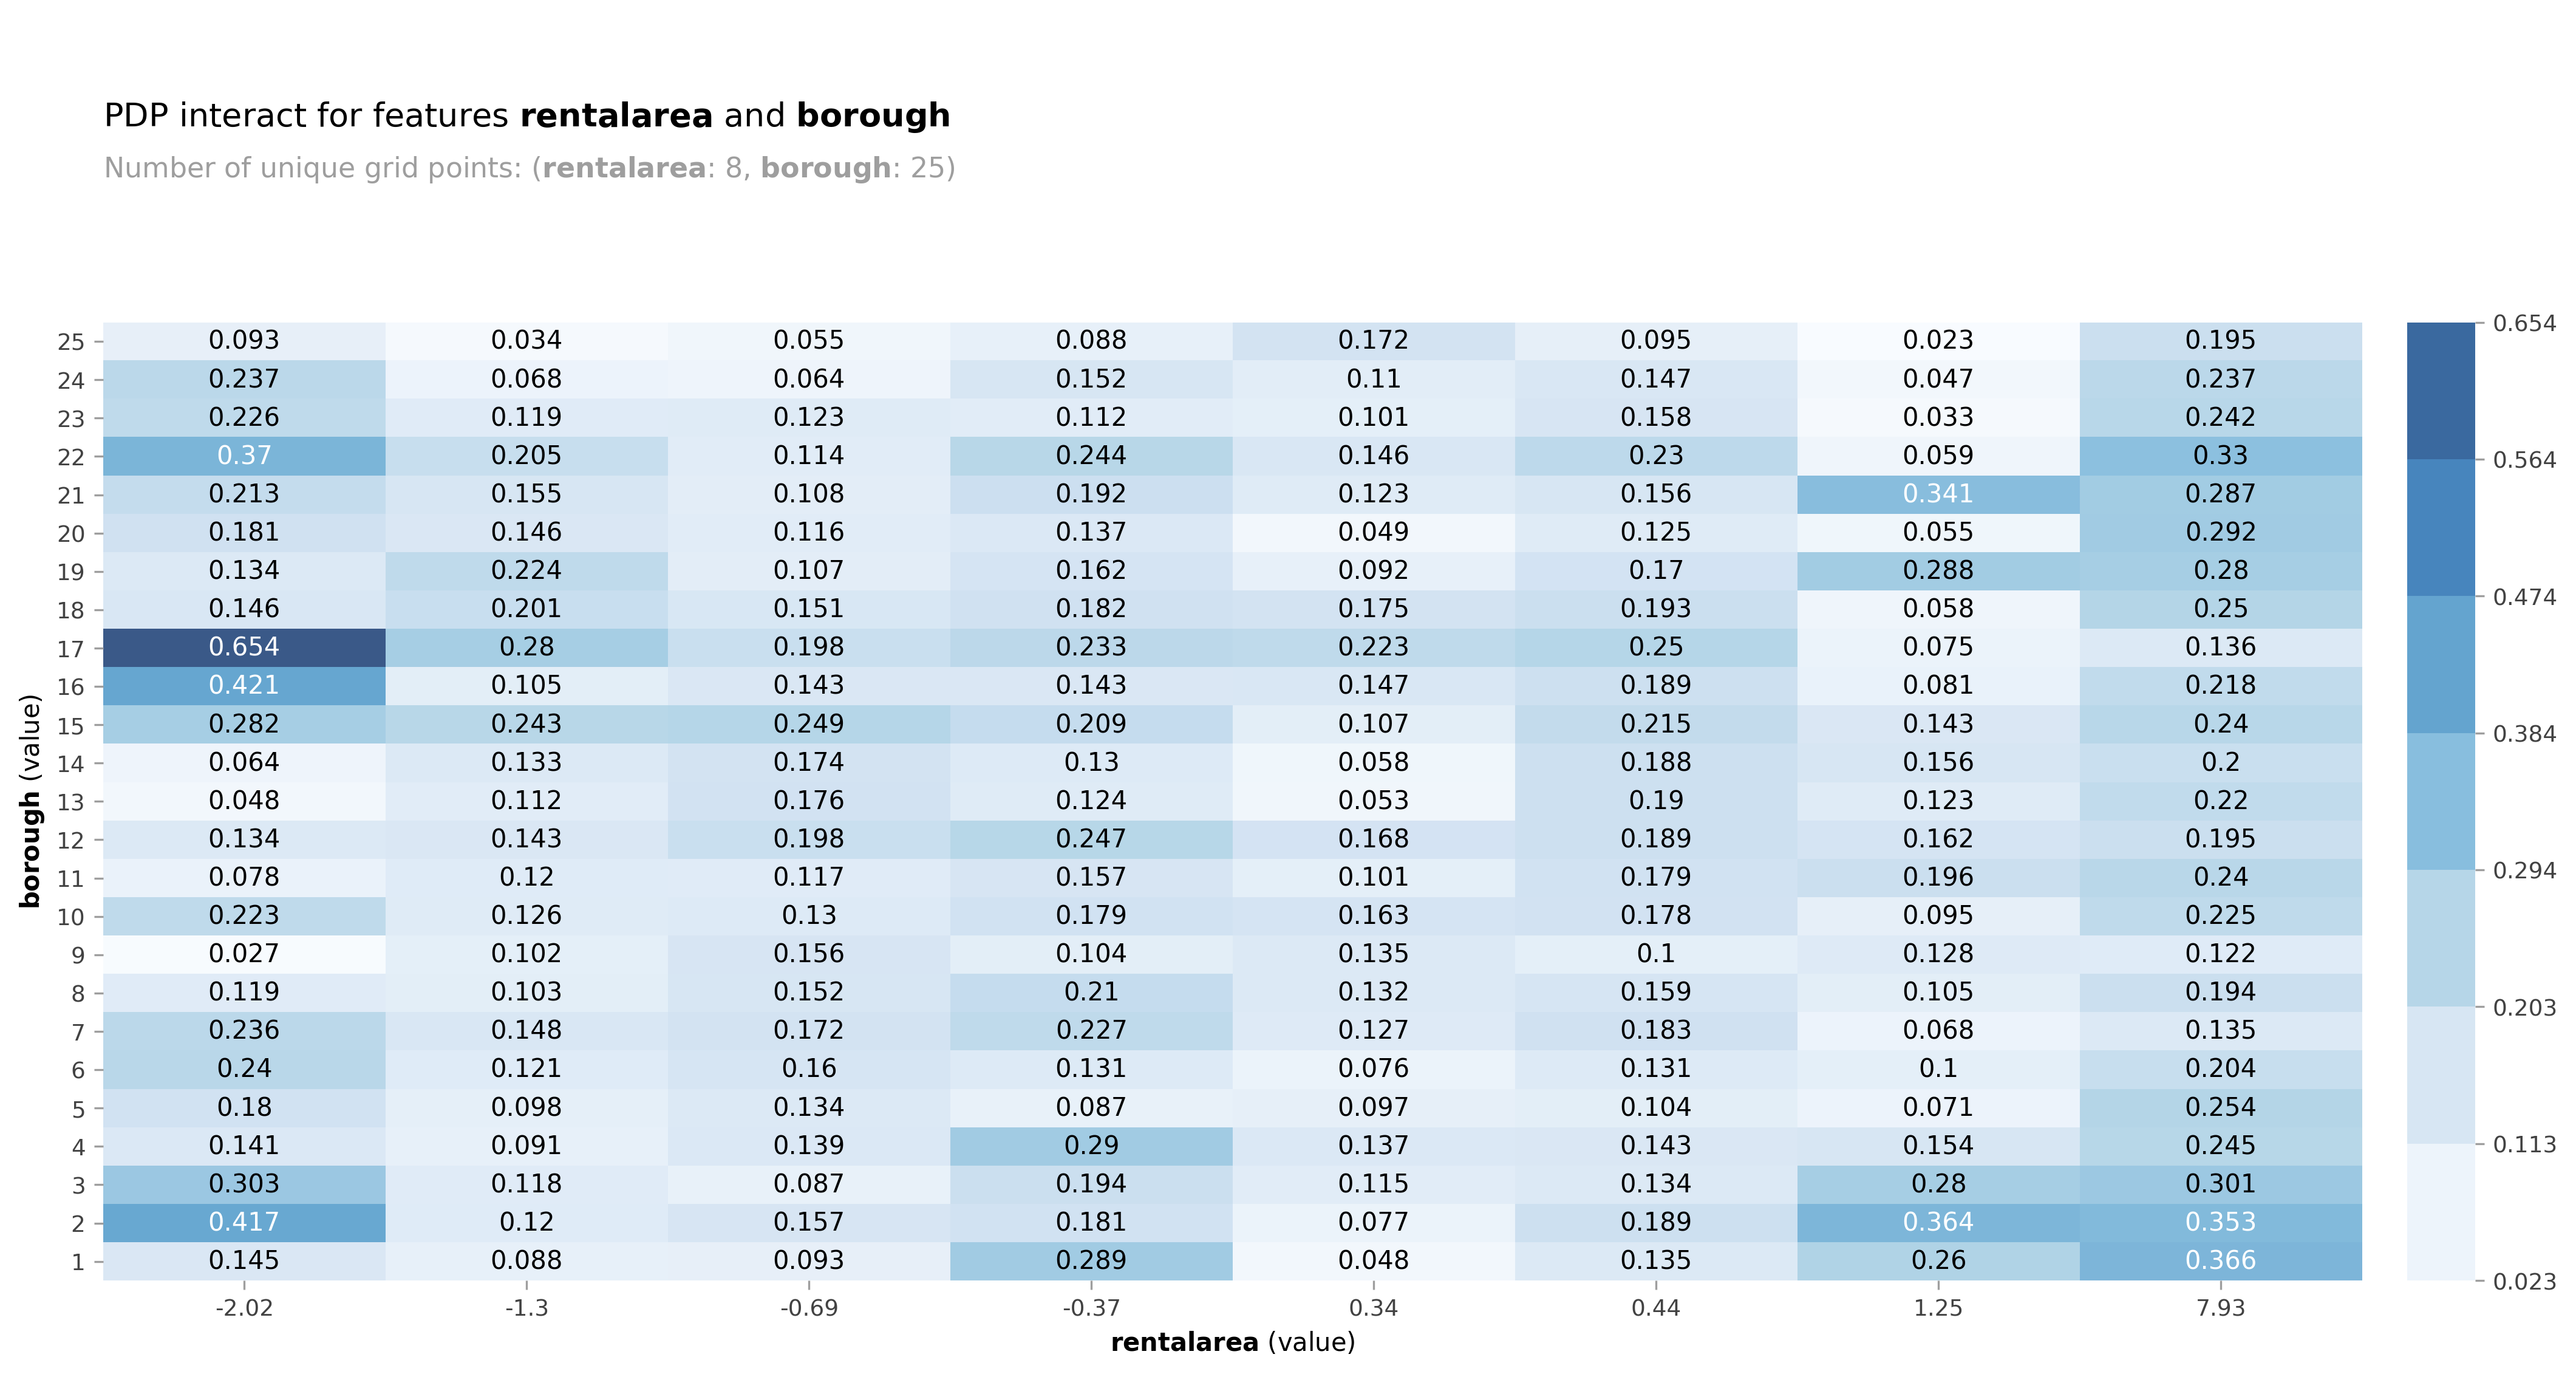

In [ ]:
# 임대면적 & 자치구명
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_Interact3 = PDPInteract(
    df=X_test_preprocessed_df,
    features=target_features3,
    feature_names=target_features3,
    model=model,
    model_features=X_test_preprocessed_df.columns,
    cust_grid_points=[None,[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
    ])
pdp_Interact3.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')

obtain pred_func from the provided model.


  0%|          | 0/8 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/2 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/16 [00:00<?, ?it/s]

(<Figure size 4800x2700 with 3 Axes>,
 {'title_axes': <Axes: >,
  'interact_axes': [<Axes: xlabel='$\\bf{rentalarea}$ (value)', ylabel='$\\bf{buildinguse}$ (value)'>],
  'isolate_axes': [[None, None]]})

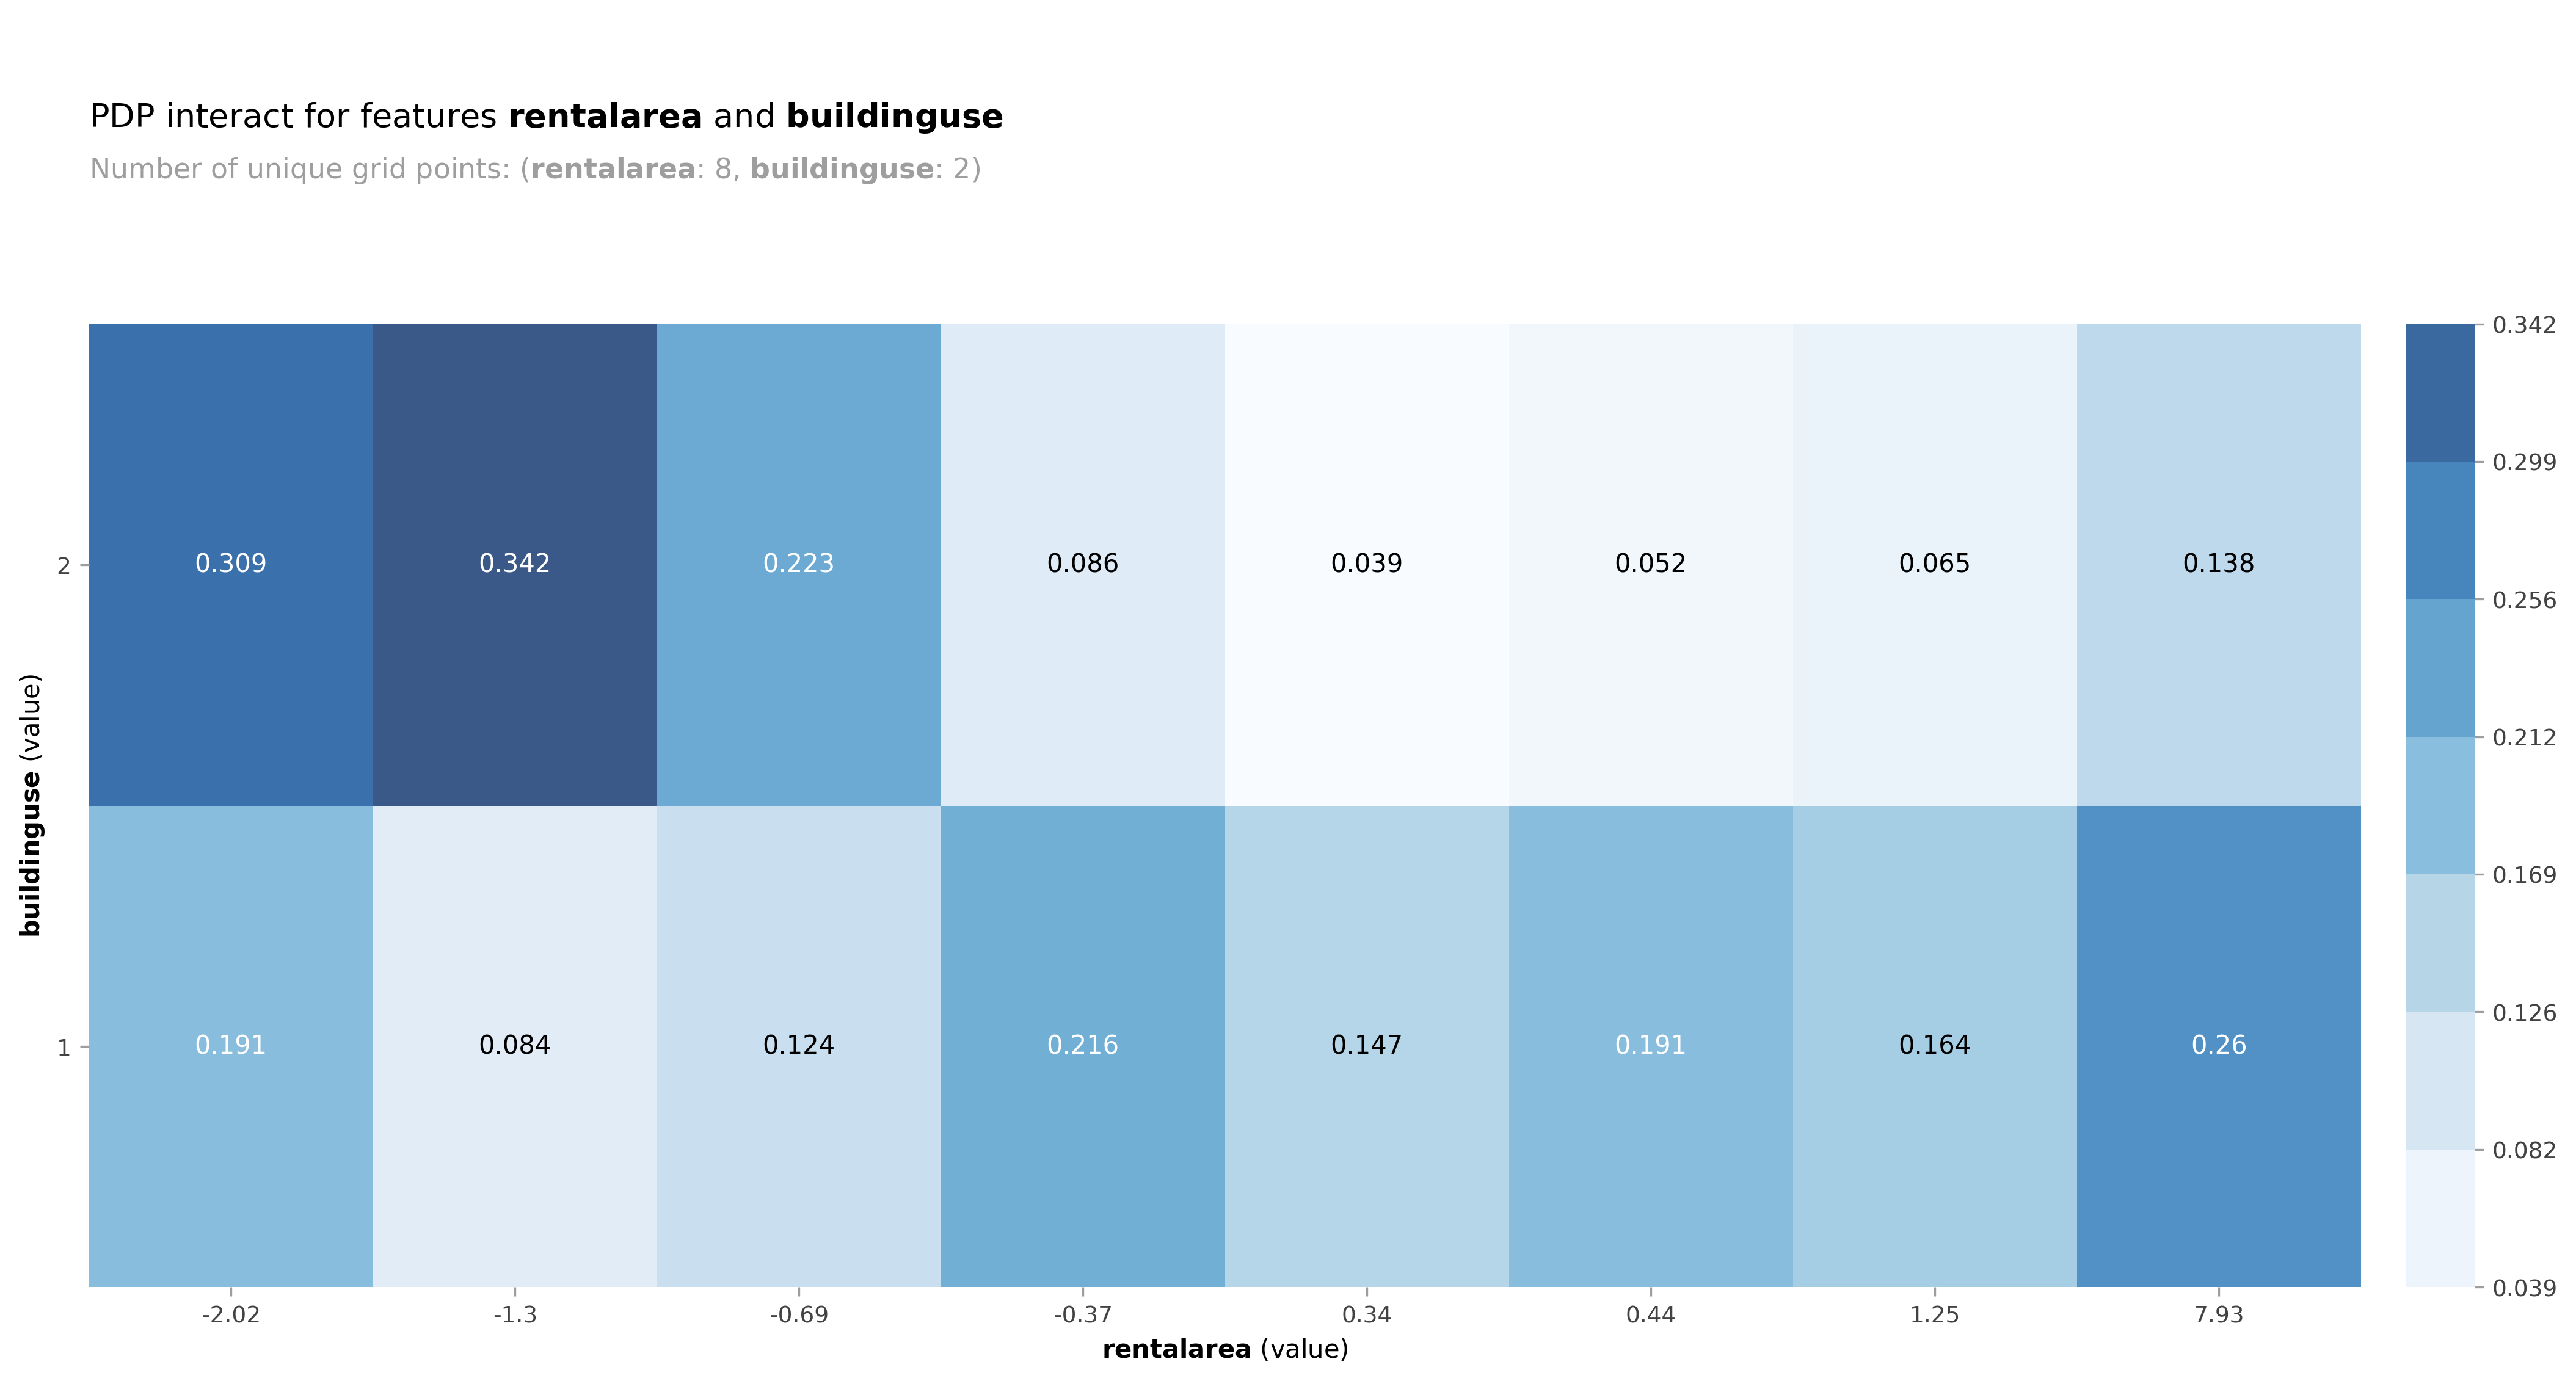

In [ ]:
# 임대면적 & 건물용도
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_Interact4 = PDPInteract(
    df=X_test_preprocessed_df,
    features=target_features4,
    feature_names=target_features4,
    model=model,
    model_features=X_test_preprocessed_df.columns)
pdp_Interact4.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')

obtain pred_func from the provided model.


  0%|          | 0/8 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/3 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/24 [00:00<?, ?it/s]

(<Figure size 4800x2700 with 3 Axes>,
 {'title_axes': <Axes: >,
  'interact_axes': [<Axes: xlabel='$\\bf{rentalarea}$ (value)', ylabel='$\\bf{floor}$ (value)'>],
  'isolate_axes': [[None, None]]})

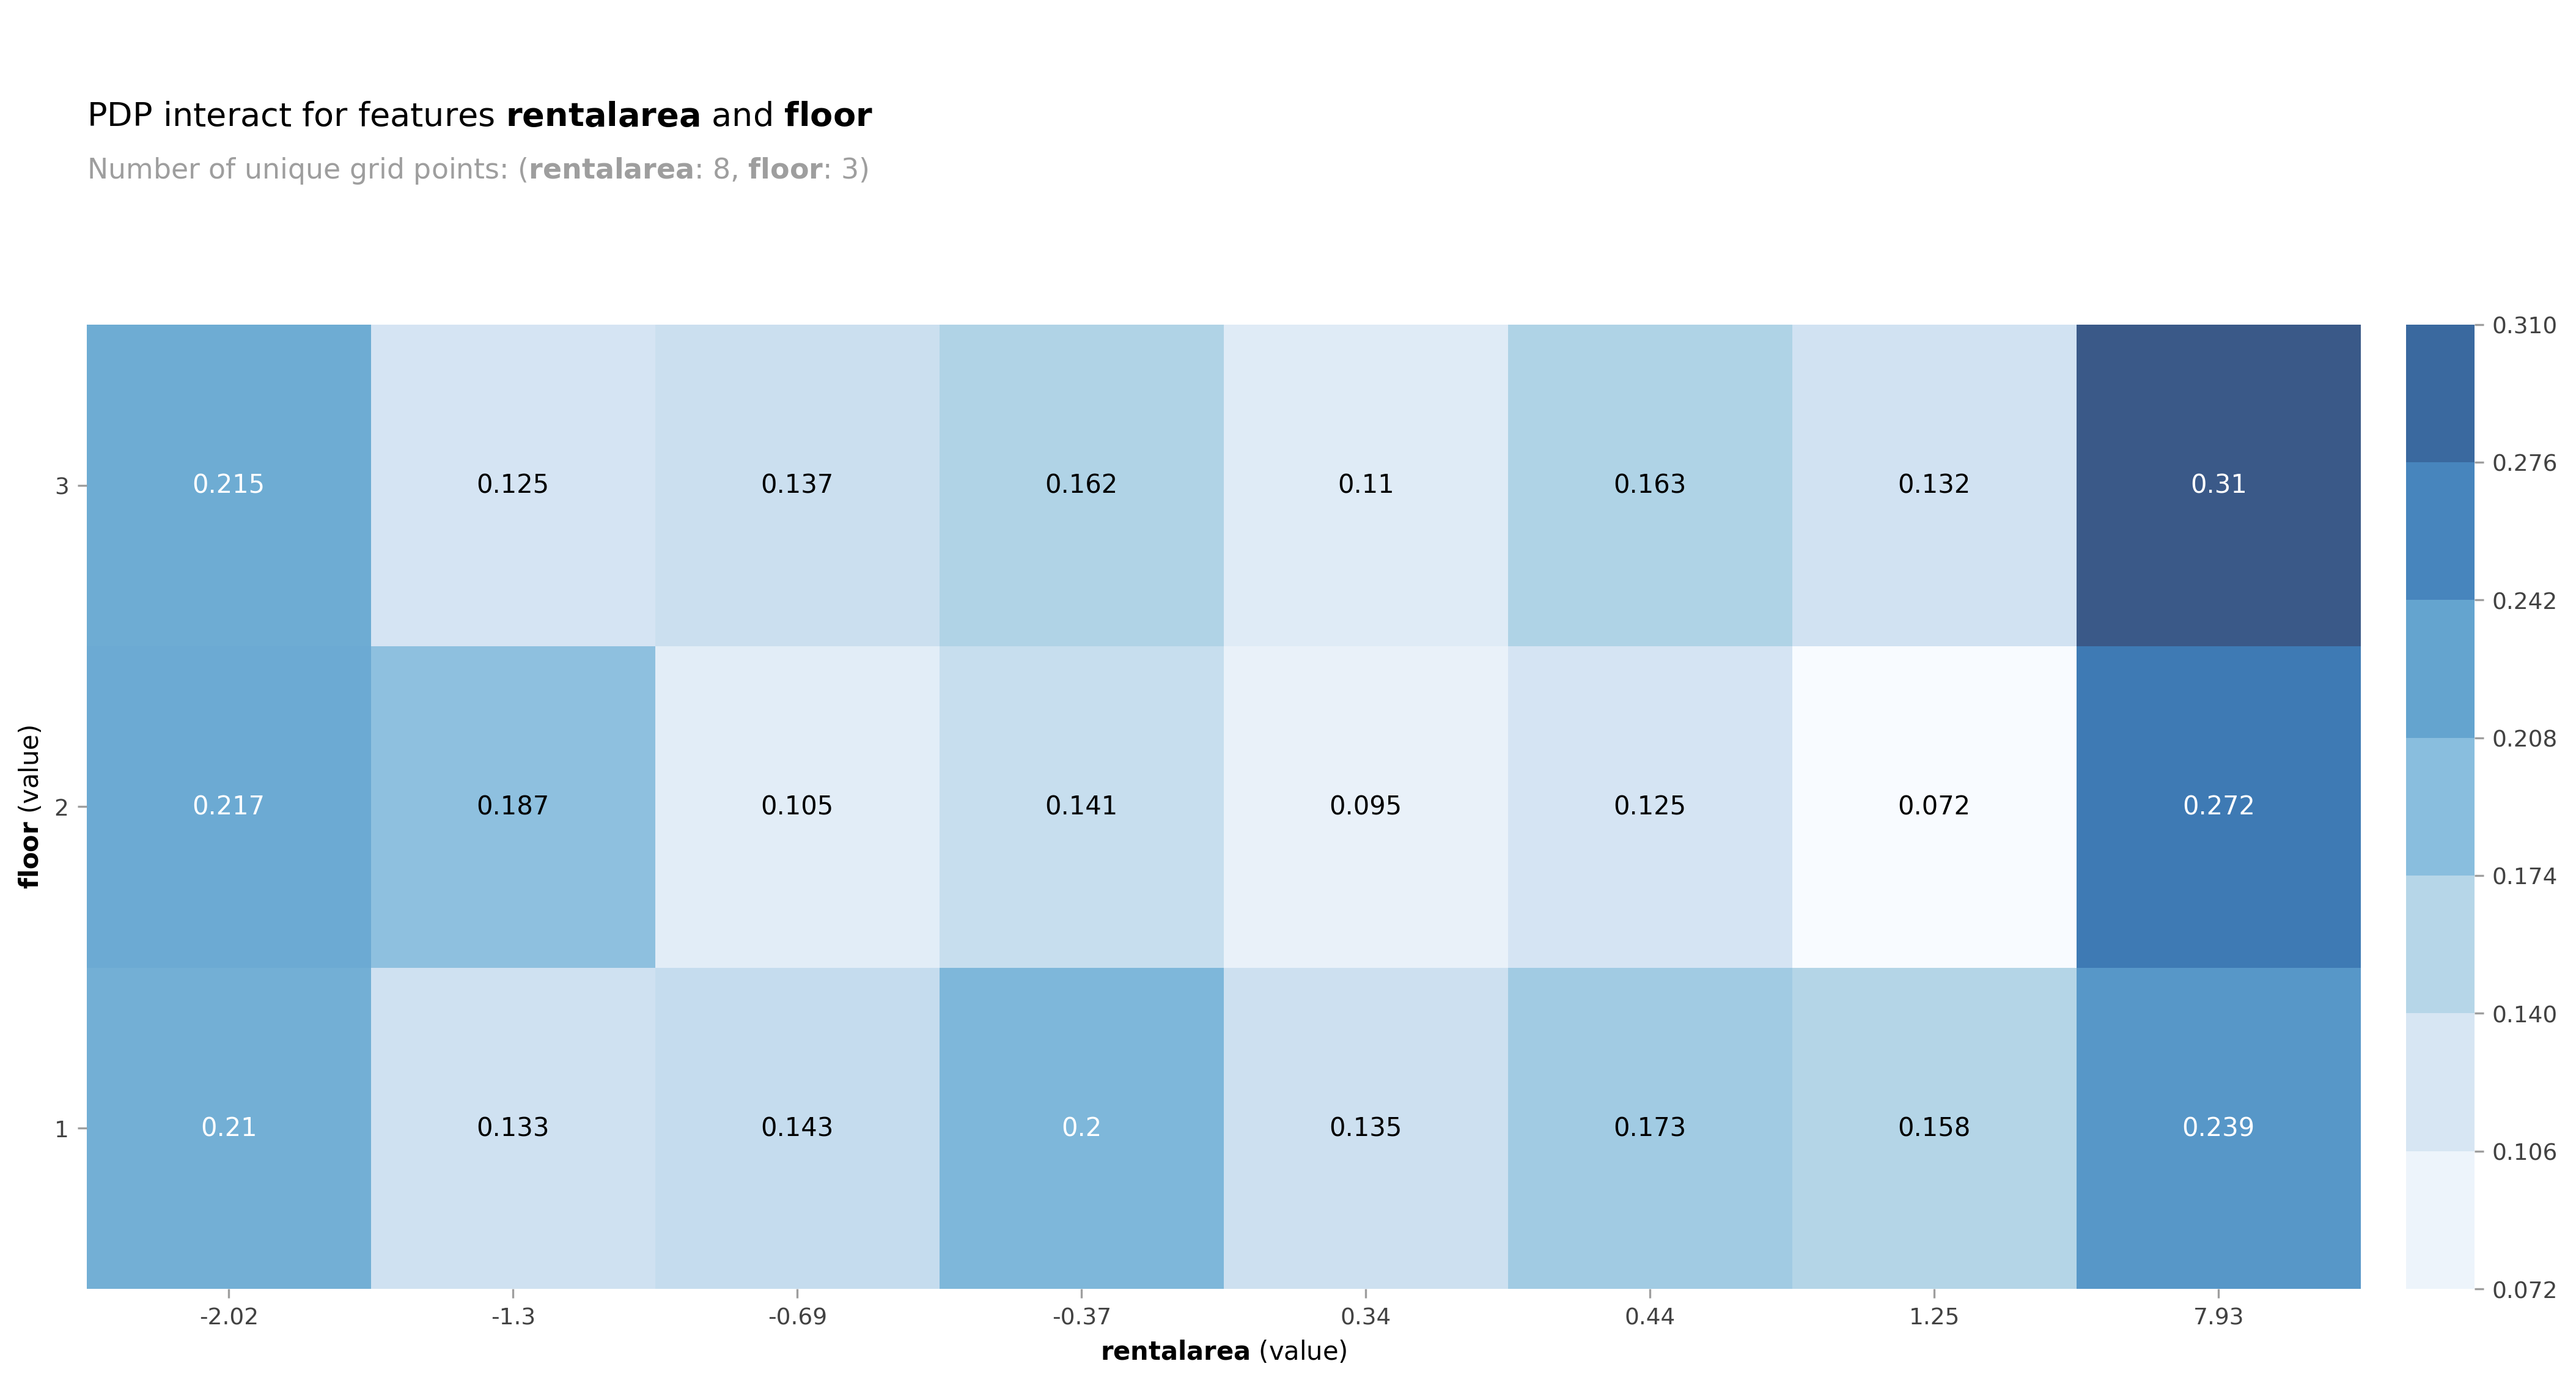

In [ ]:
# 임대면적 & 층
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_Interact5 = PDPInteract(
    df=X_test_preprocessed_df,
    features=target_features5,
    feature_names=target_features5,
    model=model,
    model_features=X_test_preprocessed_df.columns)
pdp_Interact5.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')

obtain pred_func from the provided model.


  0%|          | 0/25 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/2 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/50 [00:00<?, ?it/s]

(<Figure size 4800x2700 with 3 Axes>,
 {'title_axes': <Axes: >,
  'interact_axes': [<Axes: xlabel='$\\bf{borough}$ (value)', ylabel='$\\bf{buildinguse}$ (value)'>],
  'isolate_axes': [[None, None]]})

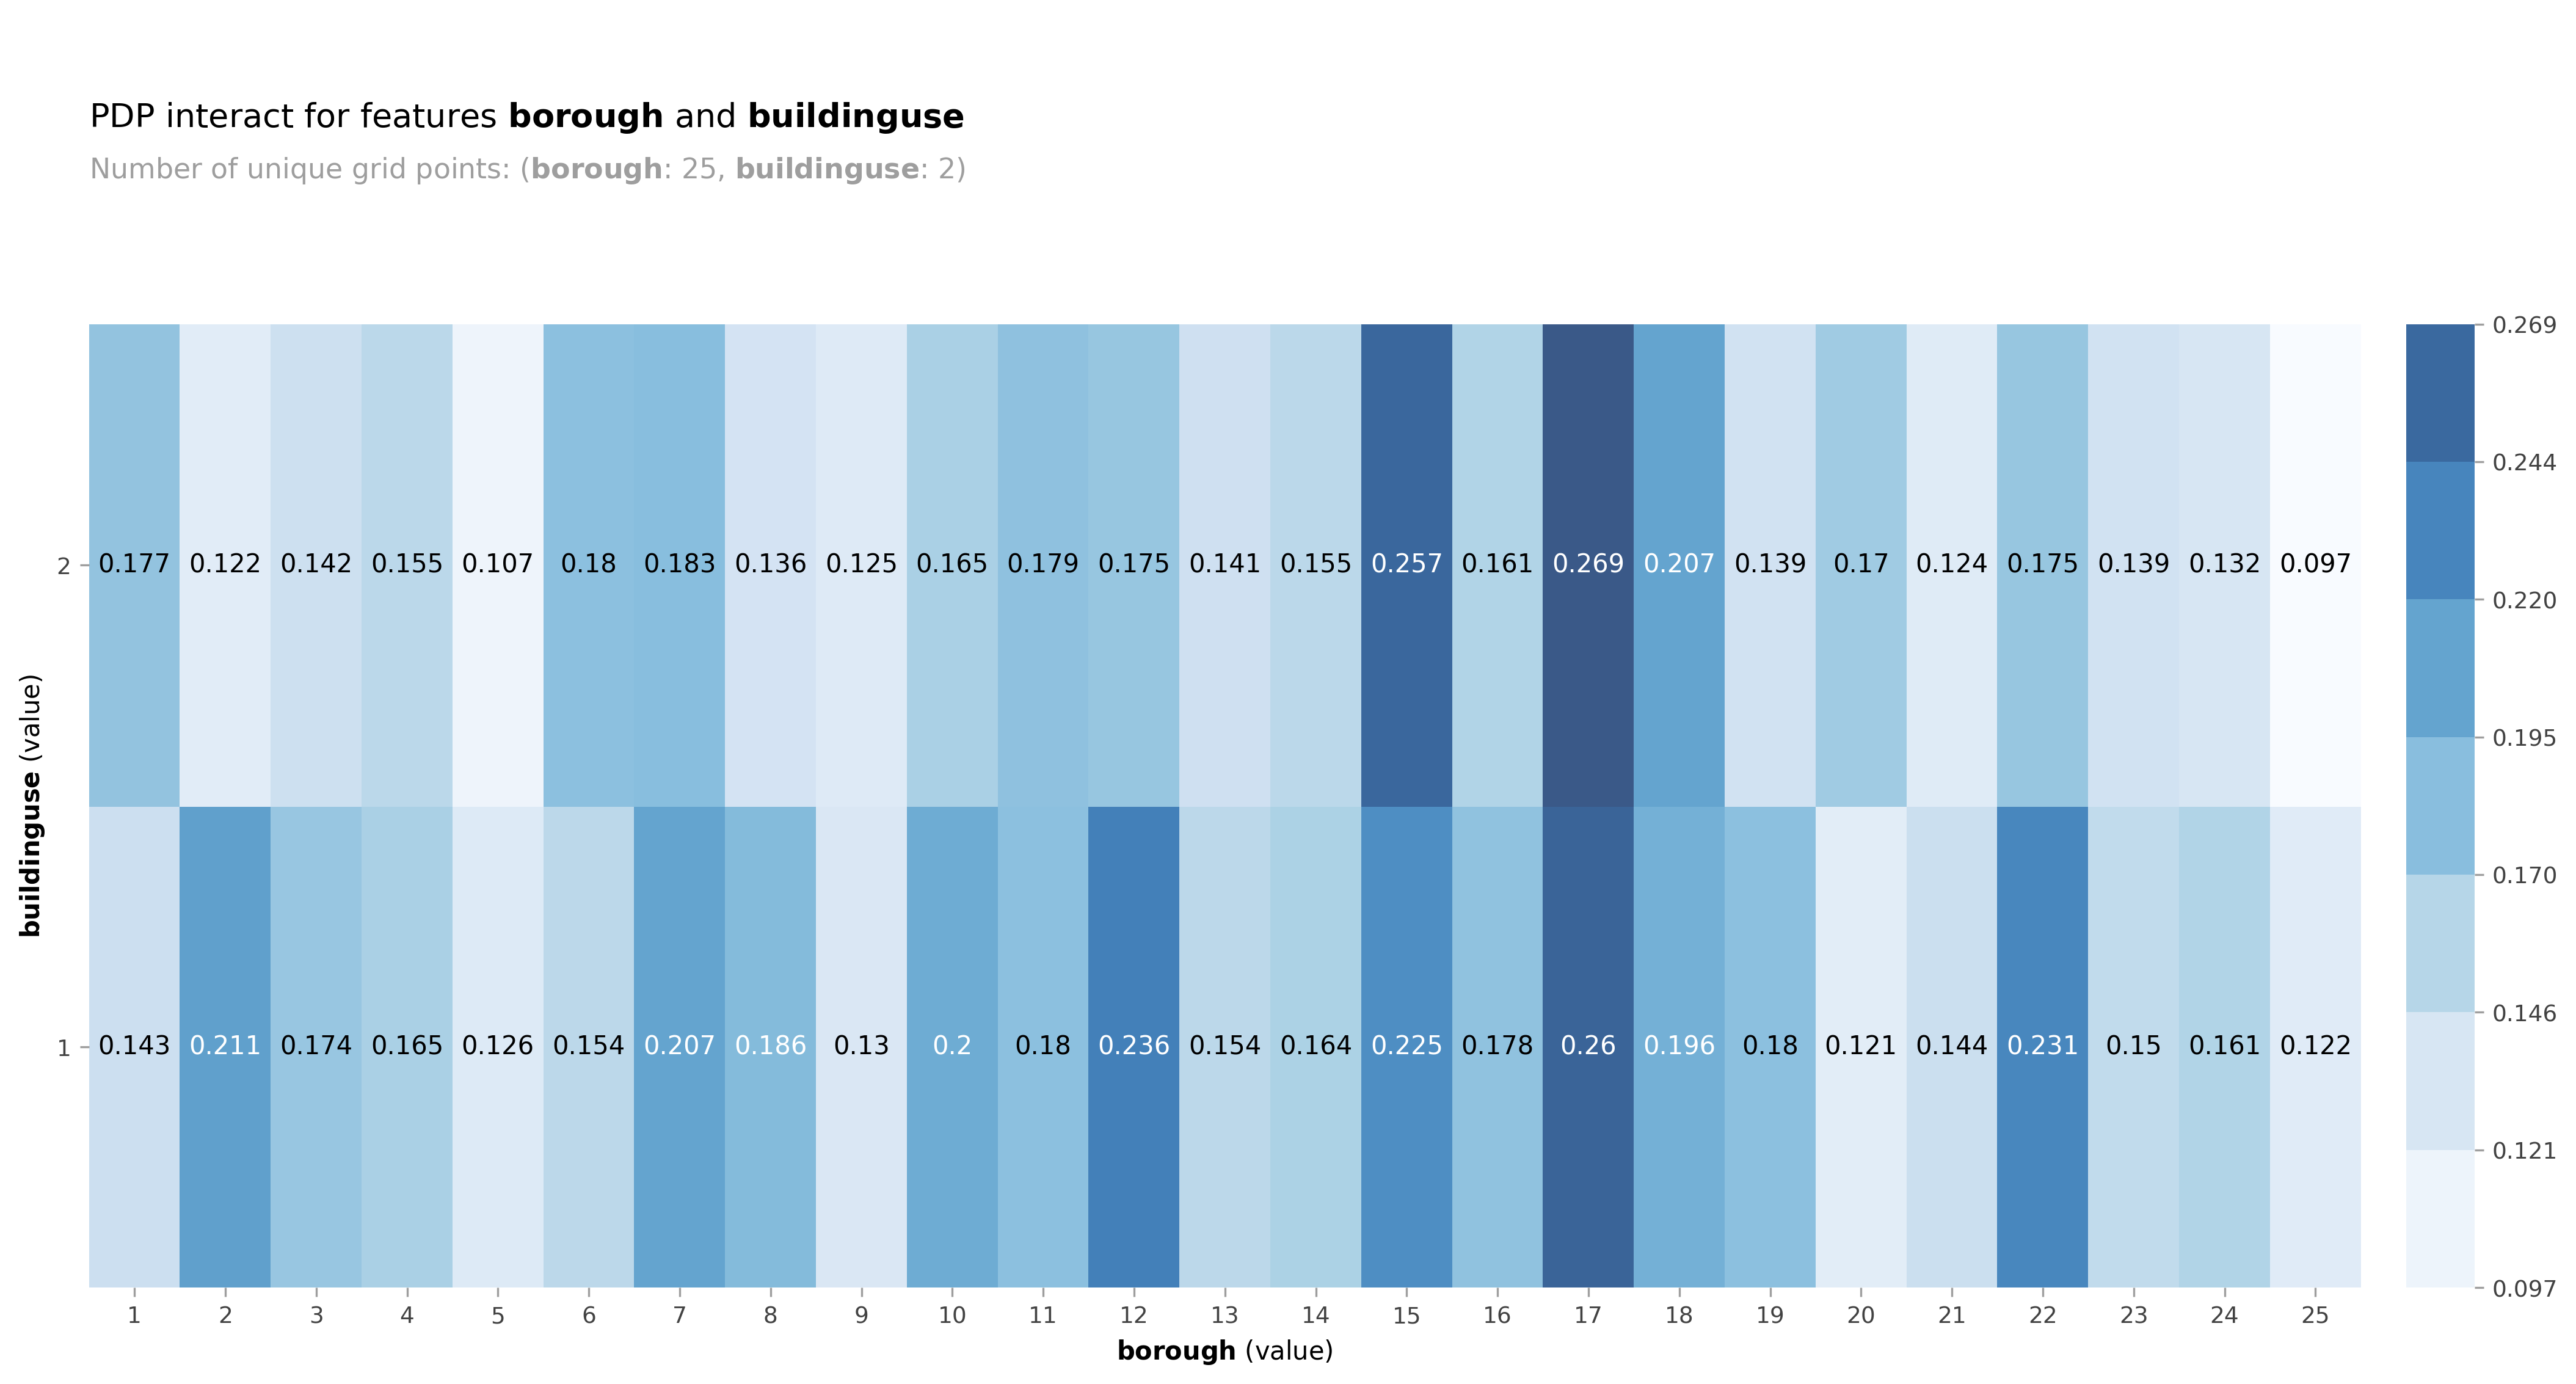

In [ ]:
# 자치구명 & 건물용도
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_Interact13 = PDPInteract(
    df=X_test_preprocessed_df,
    features=target_features13,
    feature_names=target_features13,
    model=model,
    model_features=X_test_preprocessed_df.columns,
    cust_grid_points=[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],None
    ])
pdp_Interact13.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')

obtain pred_func from the provided model.


  0%|          | 0/25 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/3 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/75 [00:00<?, ?it/s]

(<Figure size 4800x2700 with 3 Axes>,
 {'title_axes': <Axes: >,
  'interact_axes': [<Axes: xlabel='$\\bf{borough}$ (value)', ylabel='$\\bf{floor}$ (value)'>],
  'isolate_axes': [[None, None]]})

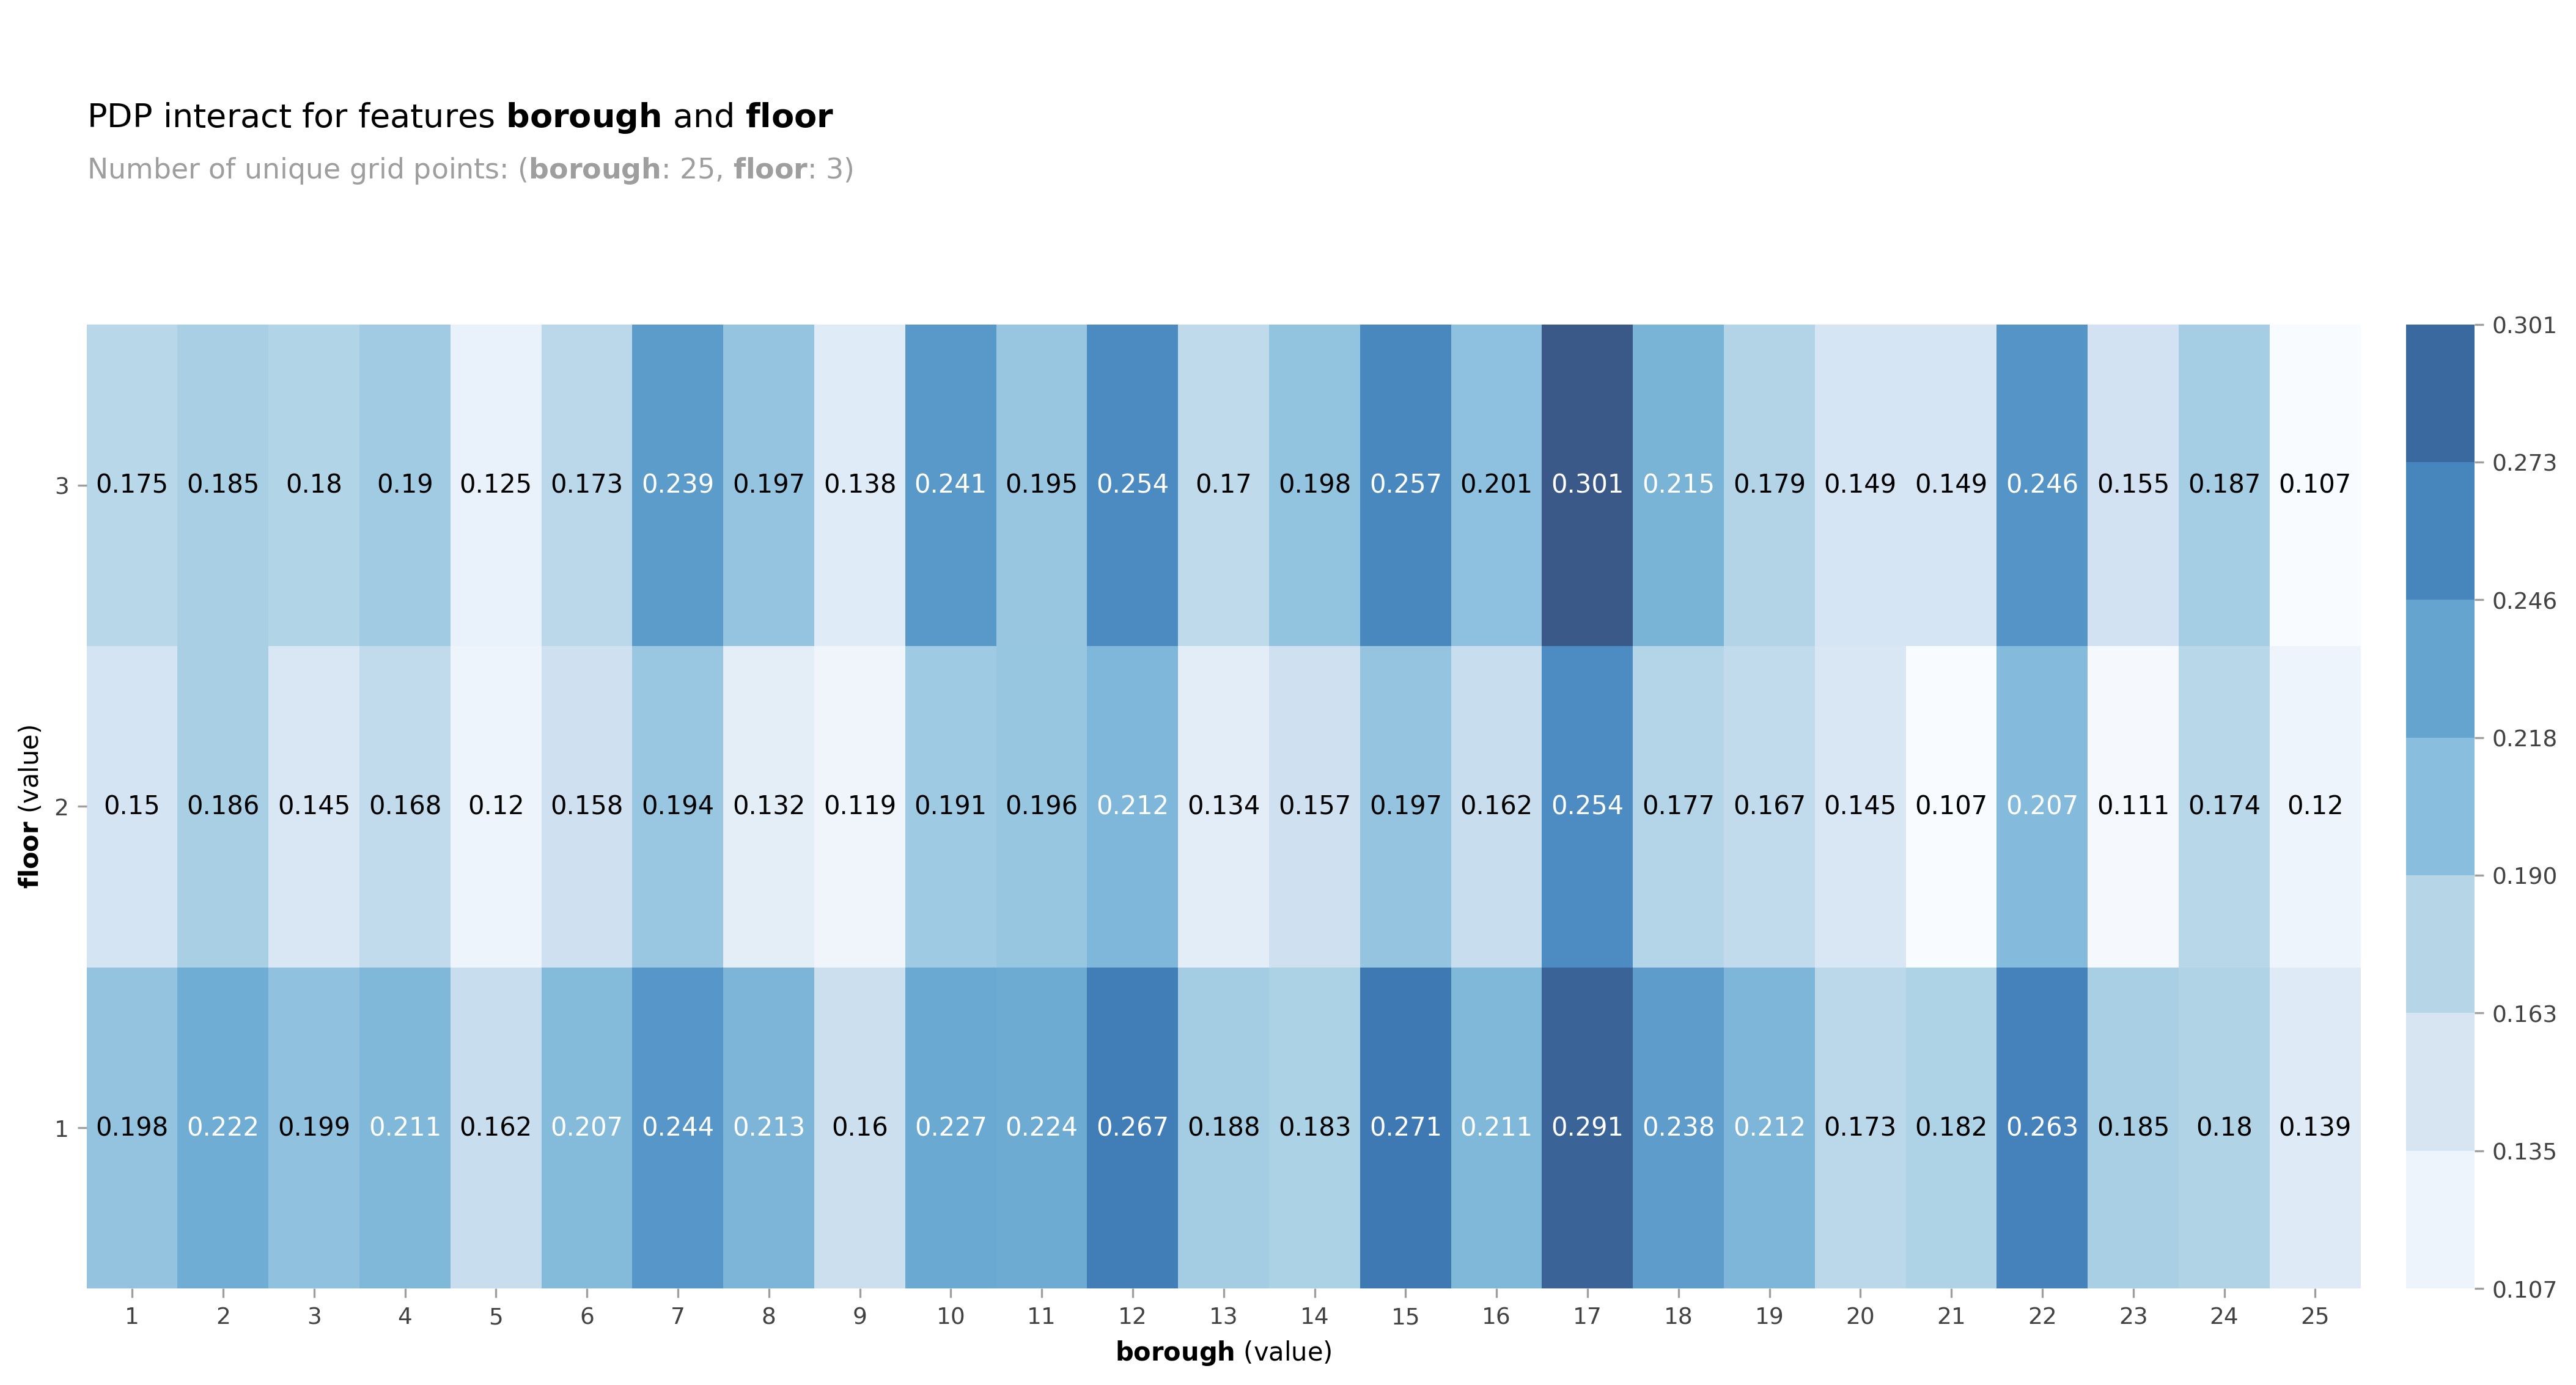

In [ ]:
# 자치구명 & 층
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_Interact14 = PDPInteract(
    df=X_test_preprocessed_df,
    features=target_features14,
    feature_names=target_features14,
    model=model,
    model_features=X_test_preprocessed_df.columns,
    cust_grid_points=[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],None
    ])
pdp_Interact14.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')

obtain pred_func from the provided model.


  0%|          | 0/2 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/3 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/6 [00:00<?, ?it/s]

(<Figure size 4800x2700 with 3 Axes>,
 {'title_axes': <Axes: >,
  'interact_axes': [<Axes: xlabel='$\\bf{buildinguse}$ (value)', ylabel='$\\bf{floor}$ (value)'>],
  'isolate_axes': [[None, None]]})

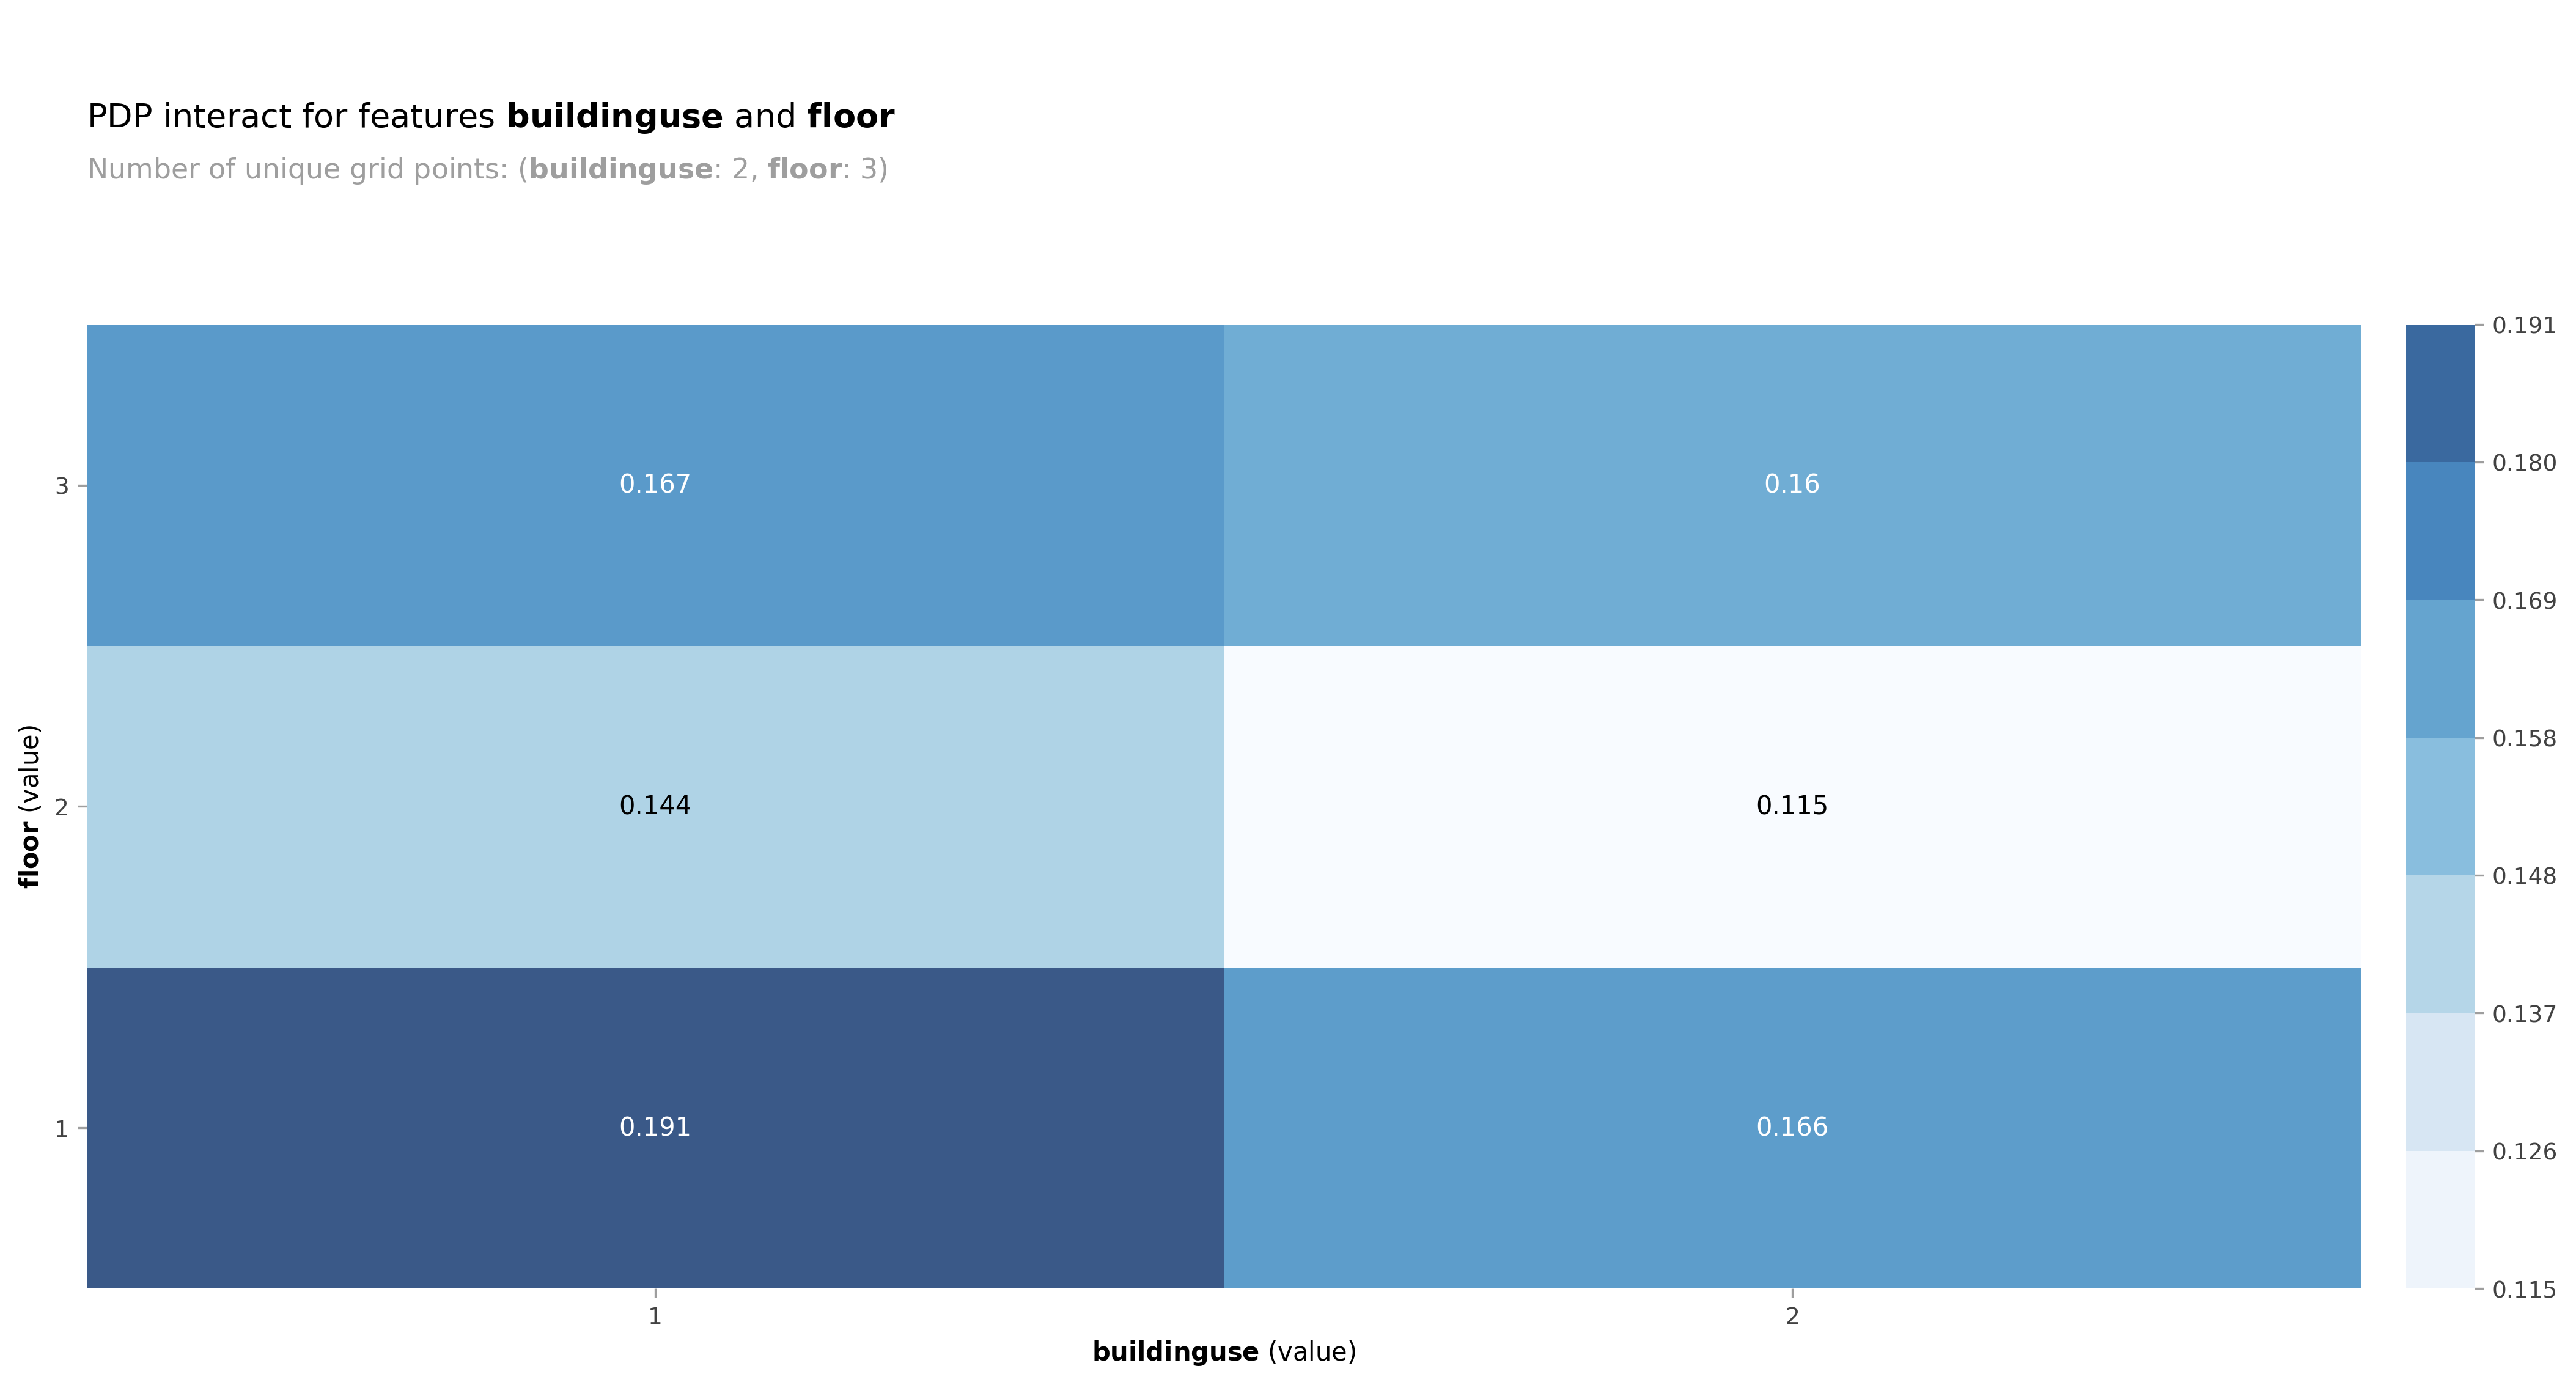

In [ ]:
# 건물용도 & 층
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_Interact15 = PDPInteract(
    df=X_test_preprocessed_df,
    features=target_features15,
    feature_names=target_features15,
    model=model,
    model_features=X_test_preprocessed_df.columns)
pdp_Interact15.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')

In [ ]:
'''# 임대면적 & 계약년월
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_Interact1 = PDPInteract(
    df=X_test_preprocessed_df,
    features=target_features1,
    feature_names=target_features1,
    model=model,
    model_features=X_test_preprocessed_df.columns)
pdp_Interact1.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')'''

"# 임대면적 & 계약년월\nX_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)\npdp_Interact1 = PDPInteract(\n    df=X_test_preprocessed_df,\n    features=target_features1,\n    feature_names=target_features1,\n    model=model,\n    model_features=X_test_preprocessed_df.columns)\npdp_Interact1.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')"

In [ ]:
'''# 임대면적 & 건축년도
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_Interact2 = PDPInteract(
    df=X_test_preprocessed_df,
    features=target_features2,
    feature_names=target_features2,
    model=model,
    model_features=X_test_preprocessed_df.columns)
pdp_Interact2.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')'''

"# 임대면적 & 건축년도\nX_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)\npdp_Interact2 = PDPInteract(\n    df=X_test_preprocessed_df,\n    features=target_features2,\n    feature_names=target_features2,\n    model=model,\n    model_features=X_test_preprocessed_df.columns)\npdp_Interact2.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')"

In [ ]:
'''# 계약년월 & 건축년도
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_Interact6 = PDPInteract(
    df=X_test_preprocessed_df,
    features=target_features6,
    feature_names=target_features6,
    model=model,
    model_features=X_test_preprocessed_df.columns)
pdp_Interact6.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')'''

"# 계약년월 & 건축년도\nX_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)\npdp_Interact6 = PDPInteract(\n    df=X_test_preprocessed_df,\n    features=target_features6,\n    feature_names=target_features6,\n    model=model,\n    model_features=X_test_preprocessed_df.columns)\npdp_Interact6.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')"

In [ ]:
'''# 계약년월 & 자치구명
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_Interact7 = PDPInteract(
    df=X_test_preprocessed_df,
    features=target_features7,
    feature_names=target_features7,
    model=model,
    model_features=X_test_preprocessed_df.columns)
pdp_Interact7.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')'''

"# 계약년월 & 자치구명\nX_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)\npdp_Interact7 = PDPInteract(\n    df=X_test_preprocessed_df,\n    features=target_features7,\n    feature_names=target_features7,\n    model=model,\n    model_features=X_test_preprocessed_df.columns)\npdp_Interact7.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')"

In [ ]:
'''# 계약년월 & 건물용도
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_Interact8 = PDPInteract(
    df=X_test_preprocessed_df,
    features=target_features8,
    feature_names=target_features8,
    model=model,
    model_features=X_test_preprocessed_df.columns)
pdp_Interact8.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')'''

"# 계약년월 & 건물용도\nX_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)\npdp_Interact8 = PDPInteract(\n    df=X_test_preprocessed_df,\n    features=target_features8,\n    feature_names=target_features8,\n    model=model,\n    model_features=X_test_preprocessed_df.columns)\npdp_Interact8.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')"

In [ ]:
'''# 계약년월 & 층
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_Interact9 = PDPInteract(
    df=X_test_preprocessed_df,
    features=target_features9,
    feature_names=target_features9,
    model=model,
    model_features=X_test_preprocessed_df.columns)
pdp_Interact9.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')'''

"# 계약년월 & 층\nX_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)\npdp_Interact9 = PDPInteract(\n    df=X_test_preprocessed_df,\n    features=target_features9,\n    feature_names=target_features9,\n    model=model,\n    model_features=X_test_preprocessed_df.columns)\npdp_Interact9.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')"

In [ ]:
'''# 건축년도 & 자치구명
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_Interact10 = PDPInteract(
    df=X_test_preprocessed_df,
    features=target_features10,
    feature_names=target_features10,
    model=model,
    model_features=X_test_preprocessed_df.columns)
pdp_Interact10.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')'''

"# 건축년도 & 자치구명\nX_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)\npdp_Interact10 = PDPInteract(\n    df=X_test_preprocessed_df,\n    features=target_features10,\n    feature_names=target_features10,\n    model=model,\n    model_features=X_test_preprocessed_df.columns)\npdp_Interact10.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')"

In [ ]:
'''# 건축년도 & 건물용도
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_Interact11 = PDPInteract(
    df=X_test_preprocessed_df,
    features=target_features11,
    feature_names=target_features11,
    model=model,
    model_features=X_test_preprocessed_df.columns)
pdp_Interact11.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')'''

"# 건축년도 & 건물용도\nX_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)\npdp_Interact11 = PDPInteract(\n    df=X_test_preprocessed_df,\n    features=target_features11,\n    feature_names=target_features11,\n    model=model,\n    model_features=X_test_preprocessed_df.columns)\npdp_Interact11.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')"

In [ ]:
'''# 건축년도 & 층
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_Interact12 = PDPInteract(
    df=X_test_preprocessed_df,
    features=target_features12,
    feature_names=target_features12,
    model=model,
    model_features=X_test_preprocessed_df.columns)
pdp_Interact12.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')'''

"# 건축년도 & 층\nX_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)\npdp_Interact12 = PDPInteract(\n    df=X_test_preprocessed_df,\n    features=target_features12,\n    feature_names=target_features12,\n    model=model,\n    model_features=X_test_preprocessed_df.columns)\npdp_Interact12.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')"

##### PDP isolate 추가

([<matplotlib.axis.XTick at 0x7fcd7a2c4d90>,
 [Text(1, 0, '2019.01'),
  Text(2, 0, '2022.05'),
  Text(3, 0, '2014.03'),
  Text(4, 0, '2014.09'),
  Text(5, 0, '2016.09'),
  Text(6, 0, '2018.02'),
  Text(7, 0, '2019.12'),
  Text(8, 0, '2015.08'),
  Text(9, 0, '2019.08'),
  Text(10, 0, '2017.03'),
  Text(11, 0, '2014.10'),
  Text(12, 0, '2014.02'),
  Text(13, 0, '2022.06'),
  Text(14, 0, '2020.06'),
  Text(15, 0, '2013.02'),
  Text(16, 0, '2021.05'),
  Text(17, 0, '2017.06'),
  Text(18, 0, '2022.02'),
  Text(19, 0, '2015.01'),
  Text(20, 0, '2014.12'),
  Text(21, 0, '2015.12'),
  Text(22, 0, '2018.03'),
  Text(23, 0, '2015.03'),
  Text(24, 0, '2018.07'),
  Text(25, 0, '2016.04'),
  Text(26, 0, '2021.06'),
  Text(27, 0, '2015.07'),
  Text(28, 0, '2017.05'),
  Text(29, 0, '2020.02'),
  Text(30, 0, '2021.07'),
  Text(31, 0, '2016.01'),
  Text(32, 0, '2019.09'),
  Text(33, 0, '2018.01'),
  Text(34, 0, '2020.01'),
  Text(35, 0, '2022.08'),
  Text(36, 0, '2019.05'),
  Text(37, 0, '2015.11'),
  

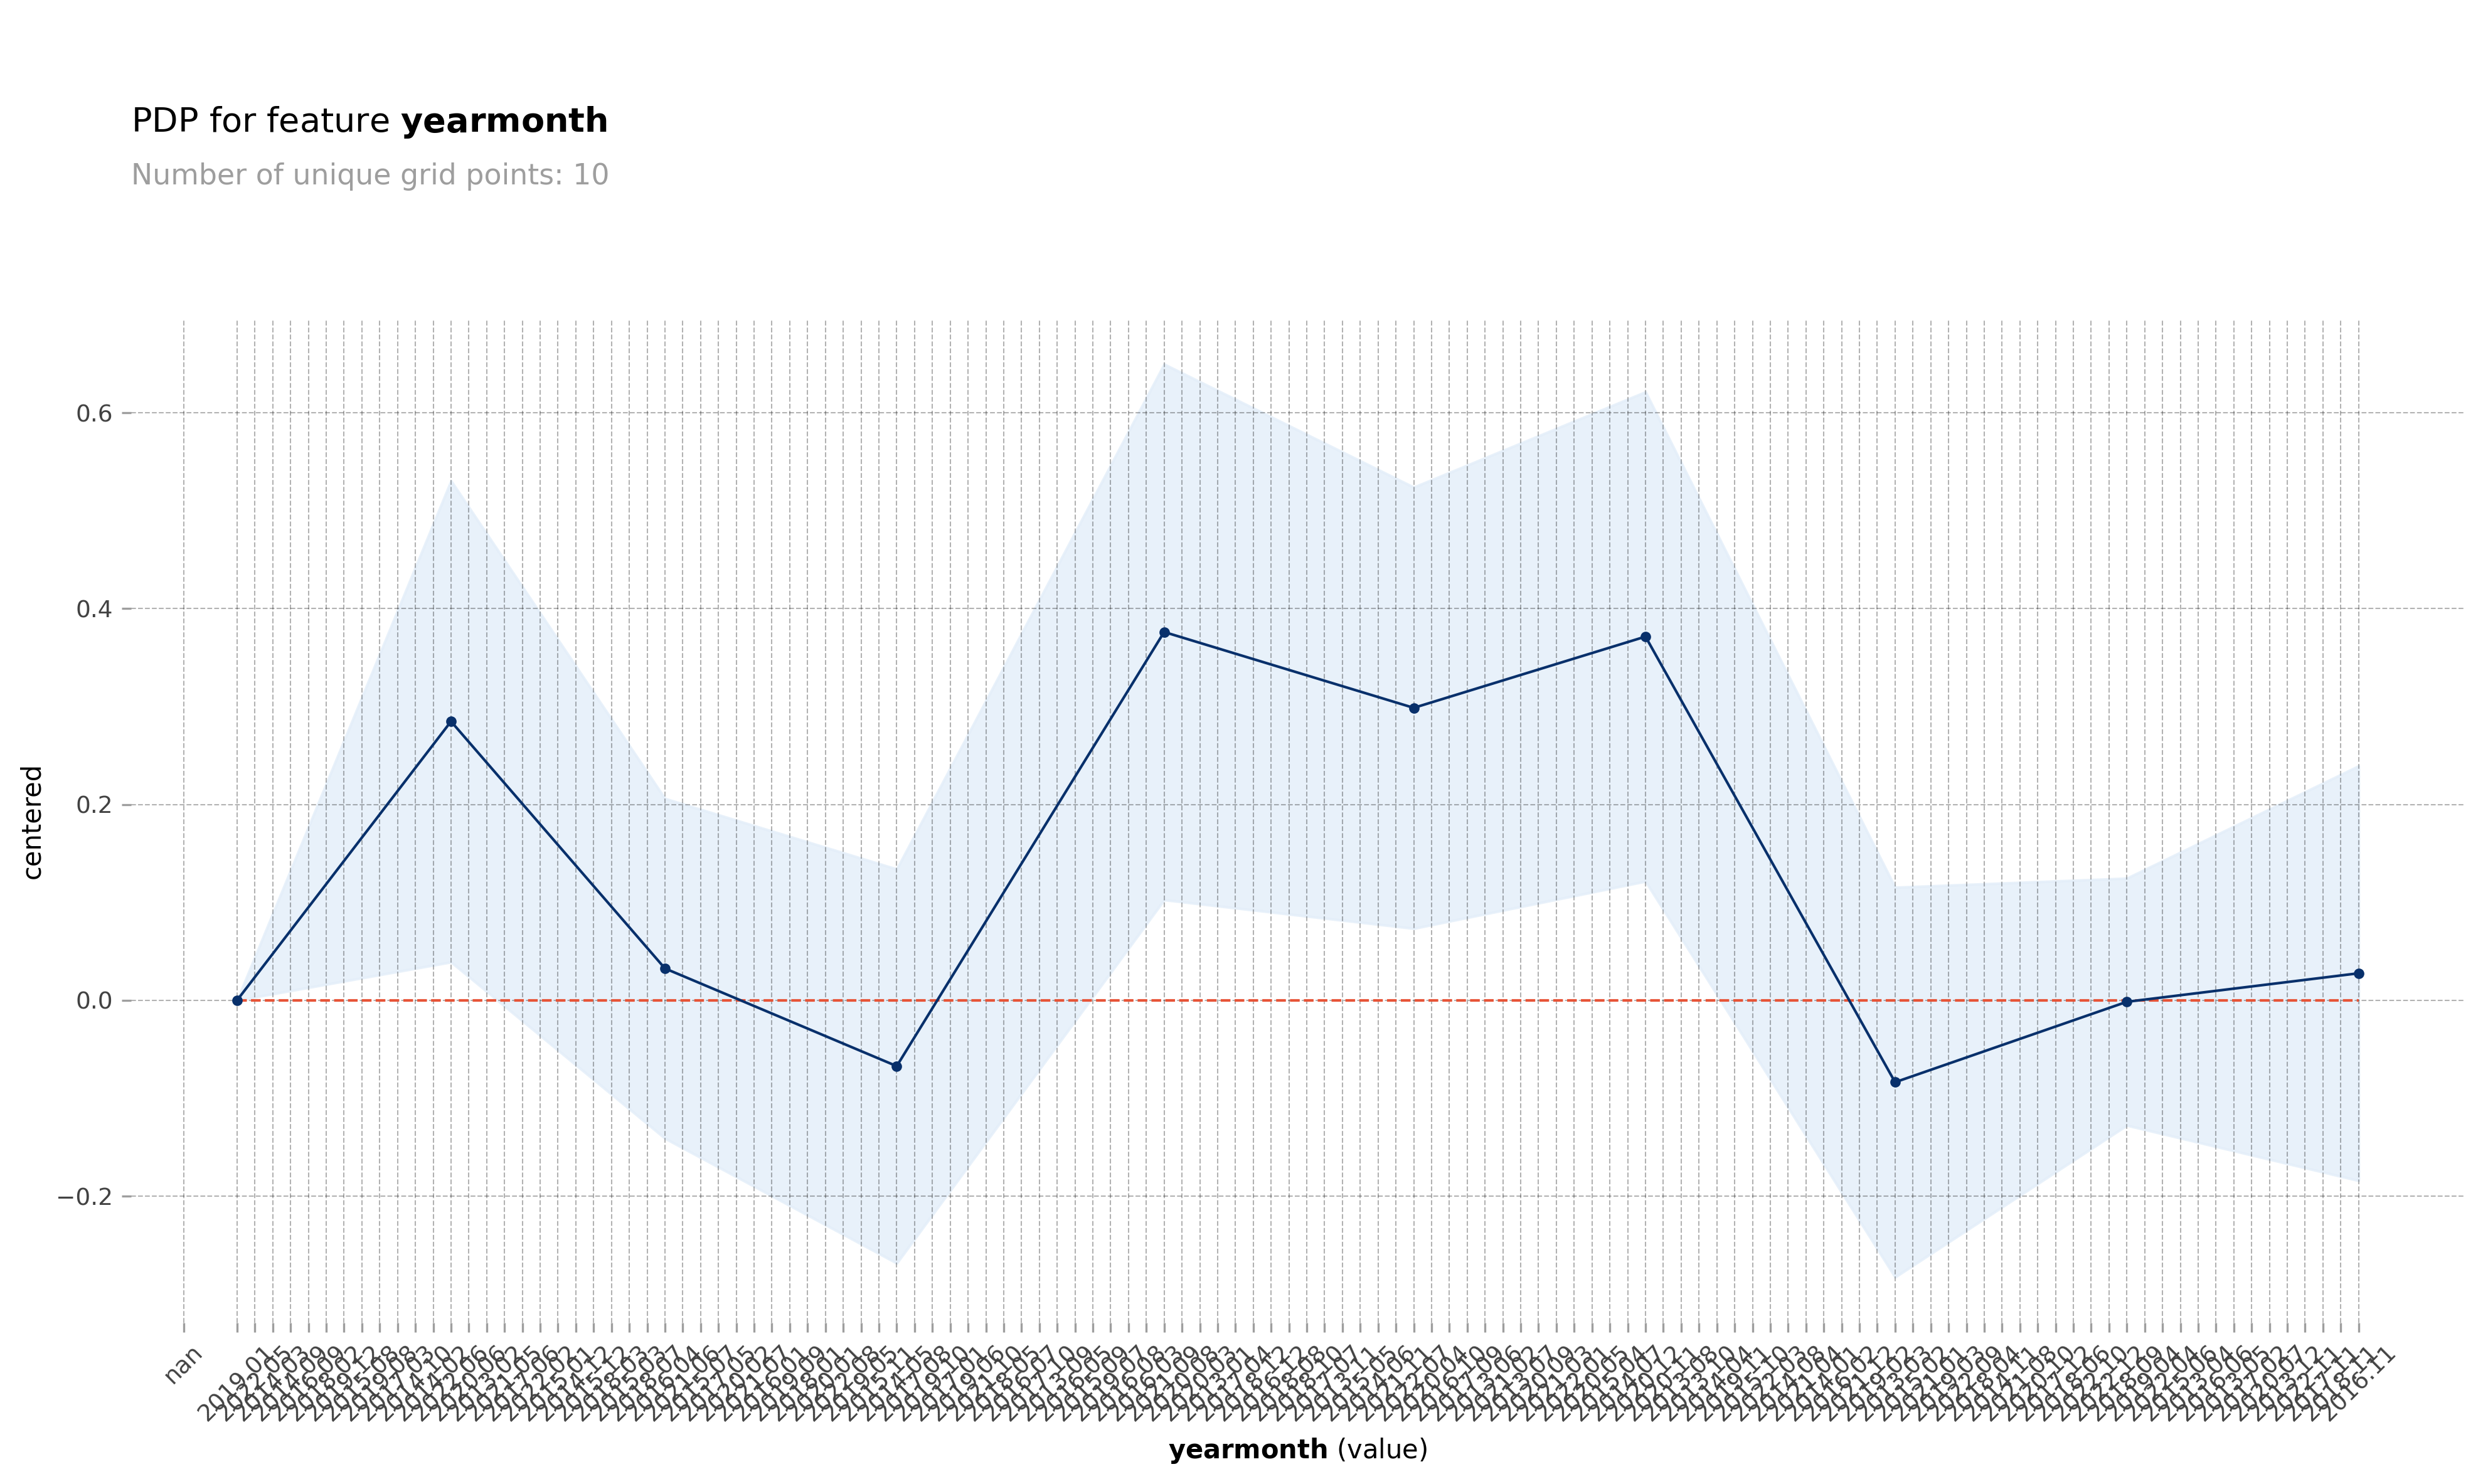

In [ ]:
pdp_isolate22.plot(engine='matplotlib')
plt.xticks(encoded_features2, original_features2, rotation=45)

([<matplotlib.axis.XTick at 0x7fcd55d9e3b0>,
 [Text(1, 0, '1975.0'),
  Text(2, 0, '2011.0'),
  Text(3, 0, '2014.0'),
  Text(4, 0, '1980.0'),
  Text(5, 0, '2001.0'),
  Text(6, 0, '2015.0'),
  Text(7, 0, '2010.0'),
  Text(8, 0, '2017.0'),
  Text(9, 0, '1978.0'),
  Text(10, 0, '2000.0'),
  Text(11, 0, '2002.0'),
  Text(12, 0, '2016.0'),
  Text(13, 0, '1988.0'),
  Text(14, 0, '2003.0'),
  Text(15, 0, '1994.0'),
  Text(16, 0, '1997.0'),
  Text(17, 0, '1996.0'),
  Text(18, 0, '2004.0'),
  Text(19, 0, '2008.0'),
  Text(20, 0, '1992.0'),
  Text(21, 0, '1986.0'),
  Text(22, 0, '2009.0'),
  Text(23, 0, '2007.0'),
  Text(24, 0, '1995.0'),
  Text(25, 0, '1990.0'),
  Text(26, 0, '2019.0'),
  Text(27, 0, '2018.0'),
  Text(28, 0, '2021.0'),
  Text(29, 0, '1999.0'),
  Text(30, 0, '1984.0'),
  Text(31, 0, '1998.0'),
  Text(32, 0, '1985.0'),
  Text(33, 0, '1991.0'),
  Text(34, 0, '1987.0'),
  Text(35, 0, '1989.0'),
  Text(36, 0, '1979.0'),
  Text(37, 0, '2013.0'),
  Text(38, 0, '1993.0'),
  Text(39, 0, 

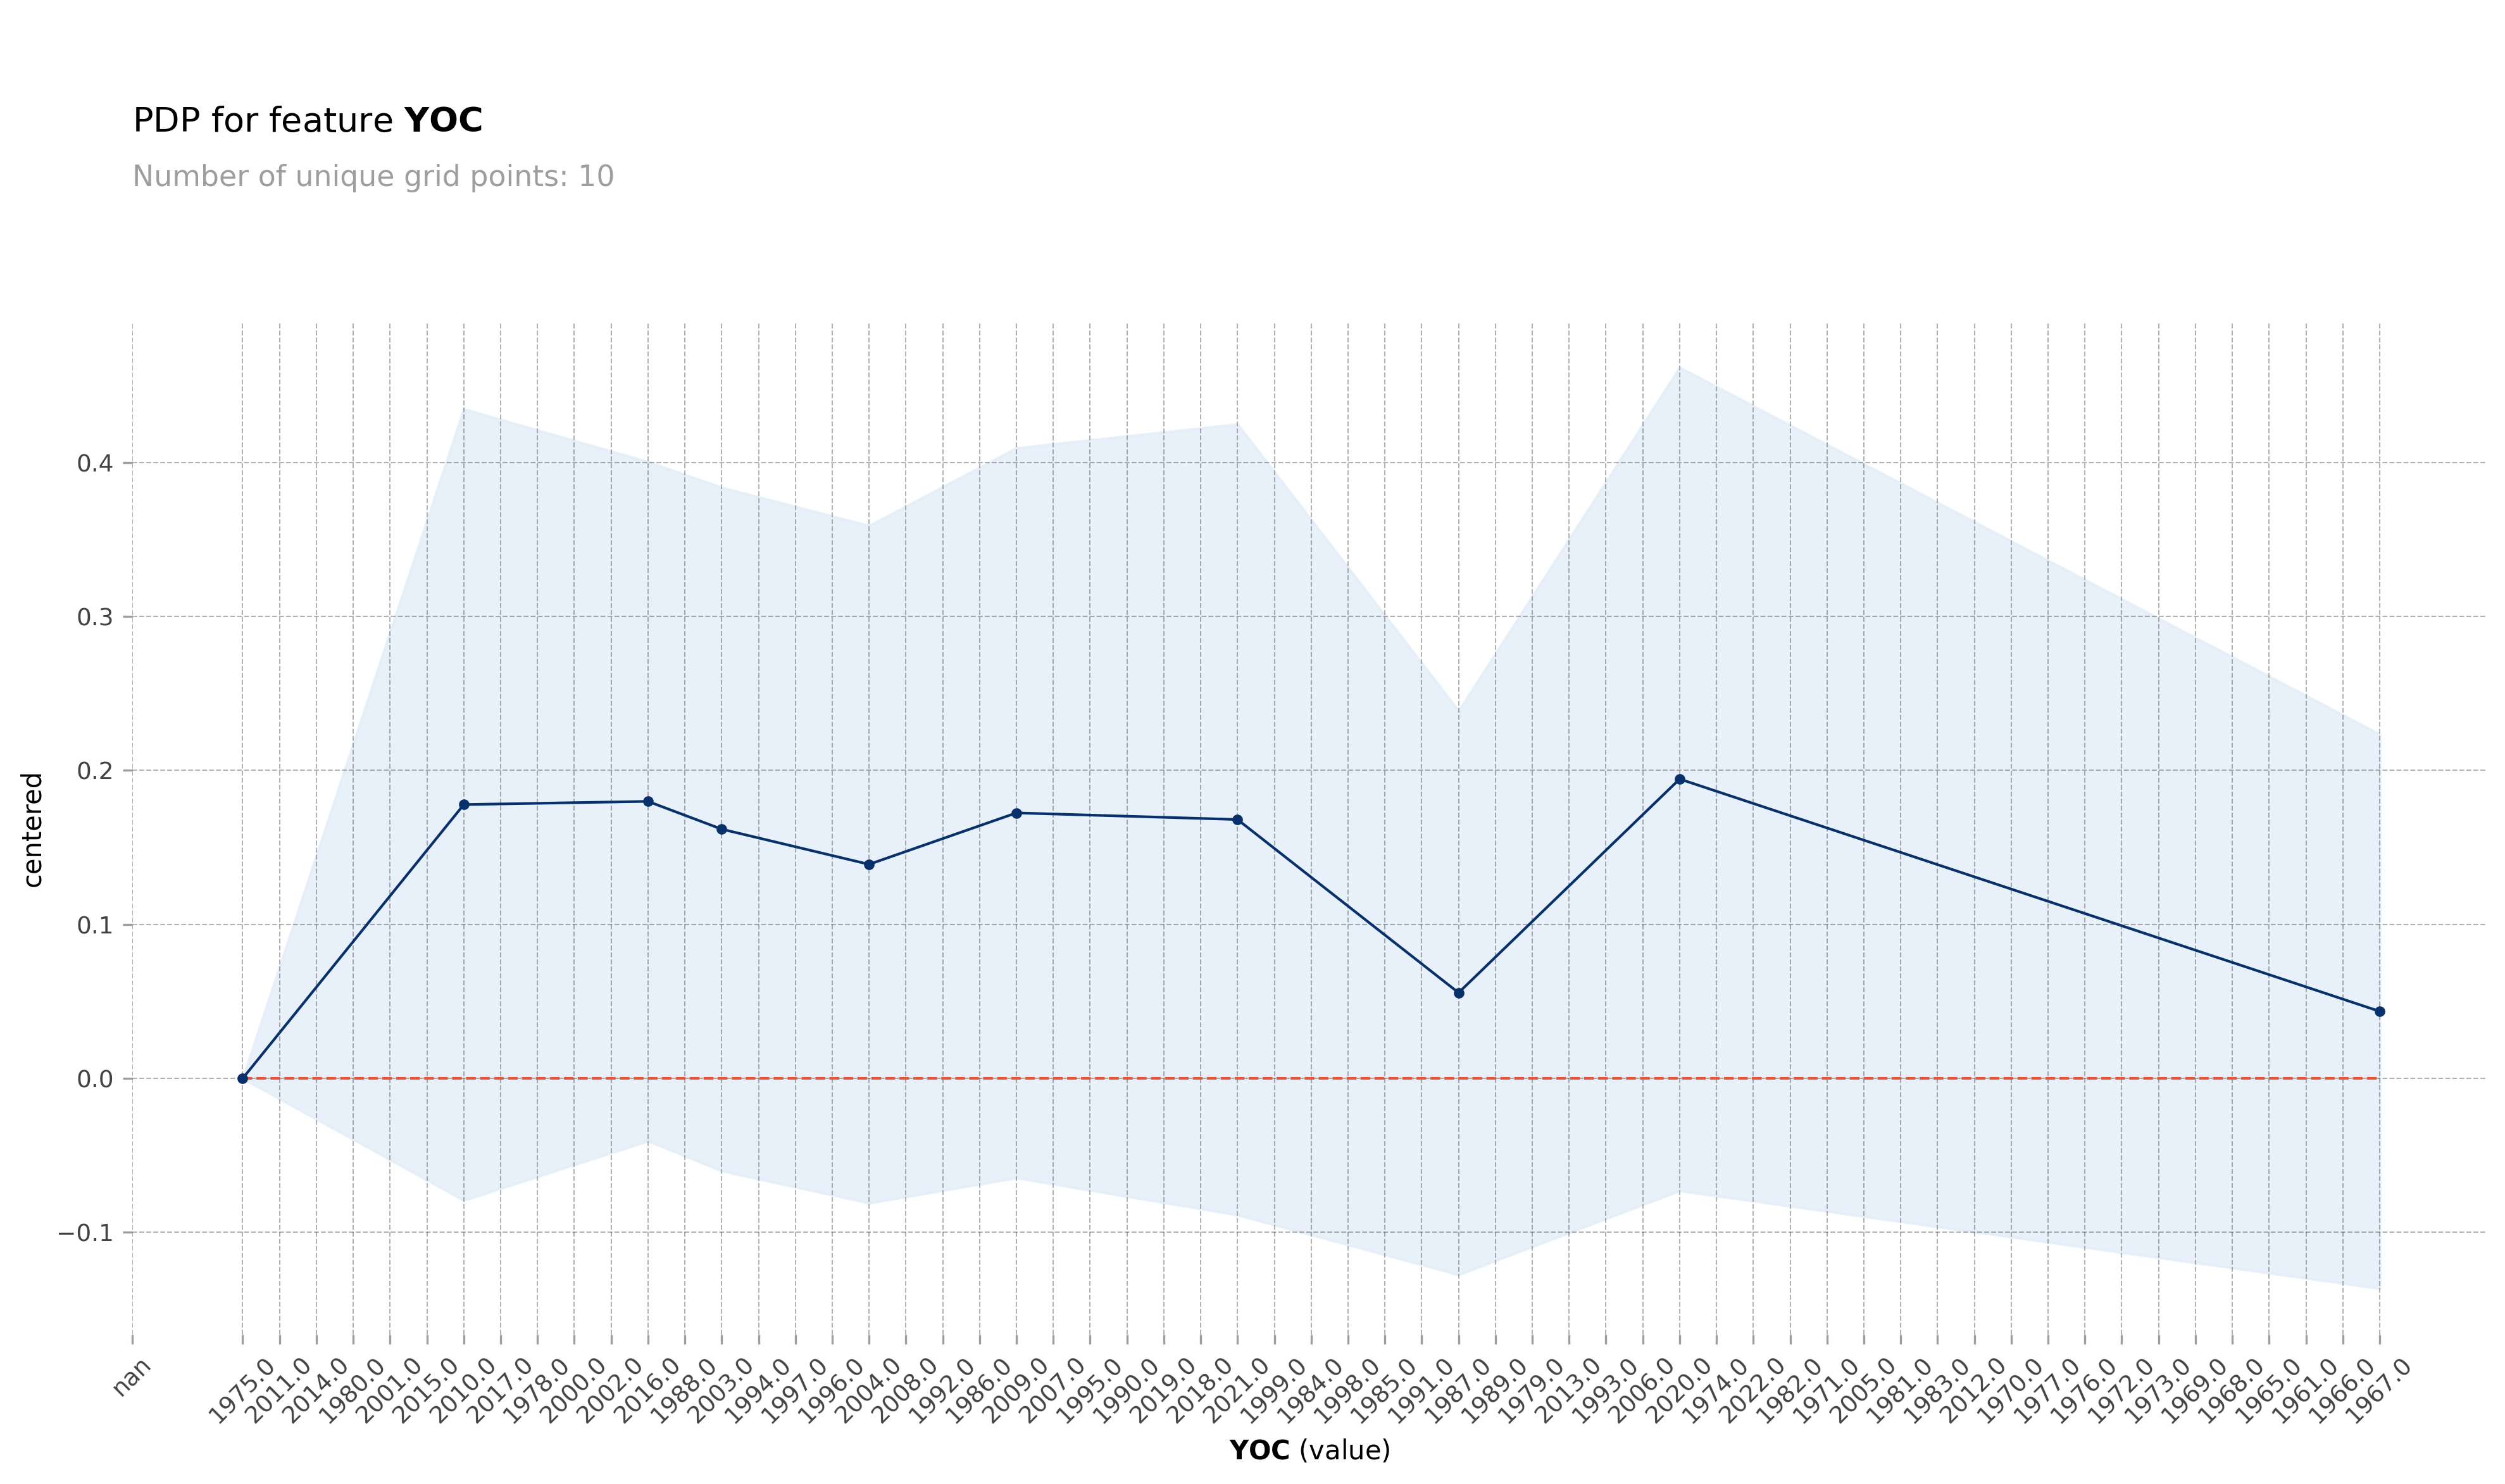

In [ ]:
pdp_isolate33.plot(engine='matplotlib')
plt.xticks(encoded_features3, original_features3, rotation=45)

([<matplotlib.axis.XTick at 0x7fcd5e8b7fa0>,
 [Text(1, 0, 'seocho'),
  Text(2, 0, 'dongdaemungu'),
  Text(3, 0, 'geumcheon'),
  Text(4, 0, 'gangdong'),
  Text(5, 0, 'seongdong'),
  Text(6, 0, 'yeongdengpo'),
  Text(7, 0, 'eunpyeong'),
  Text(8, 0, 'gangseo'),
  Text(9, 0, 'songpa'),
  Text(10, 0, 'seongbuk'),
  Text(11, 0, 'dongjak'),
  Text(12, 0, 'jungrang'),
  Text(13, 0, 'gwangjin'),
  Text(14, 0, 'jongro'),
  Text(15, 0, 'seodaemun'),
  Text(16, 0, 'nowon'),
  Text(17, 0, 'gwanak'),
  Text(18, 0, 'yangcheon'),
  Text(19, 0, 'dobong'),
  Text(20, 0, 'yongsan'),
  Text(21, 0, 'gangnam'),
  Text(22, 0, 'guro'),
  Text(23, 0, 'mapo'),
  Text(24, 0, 'gangbuk'),
  Text(25, 0, 'jung'),
  Text(-2, 0, 'nan')])

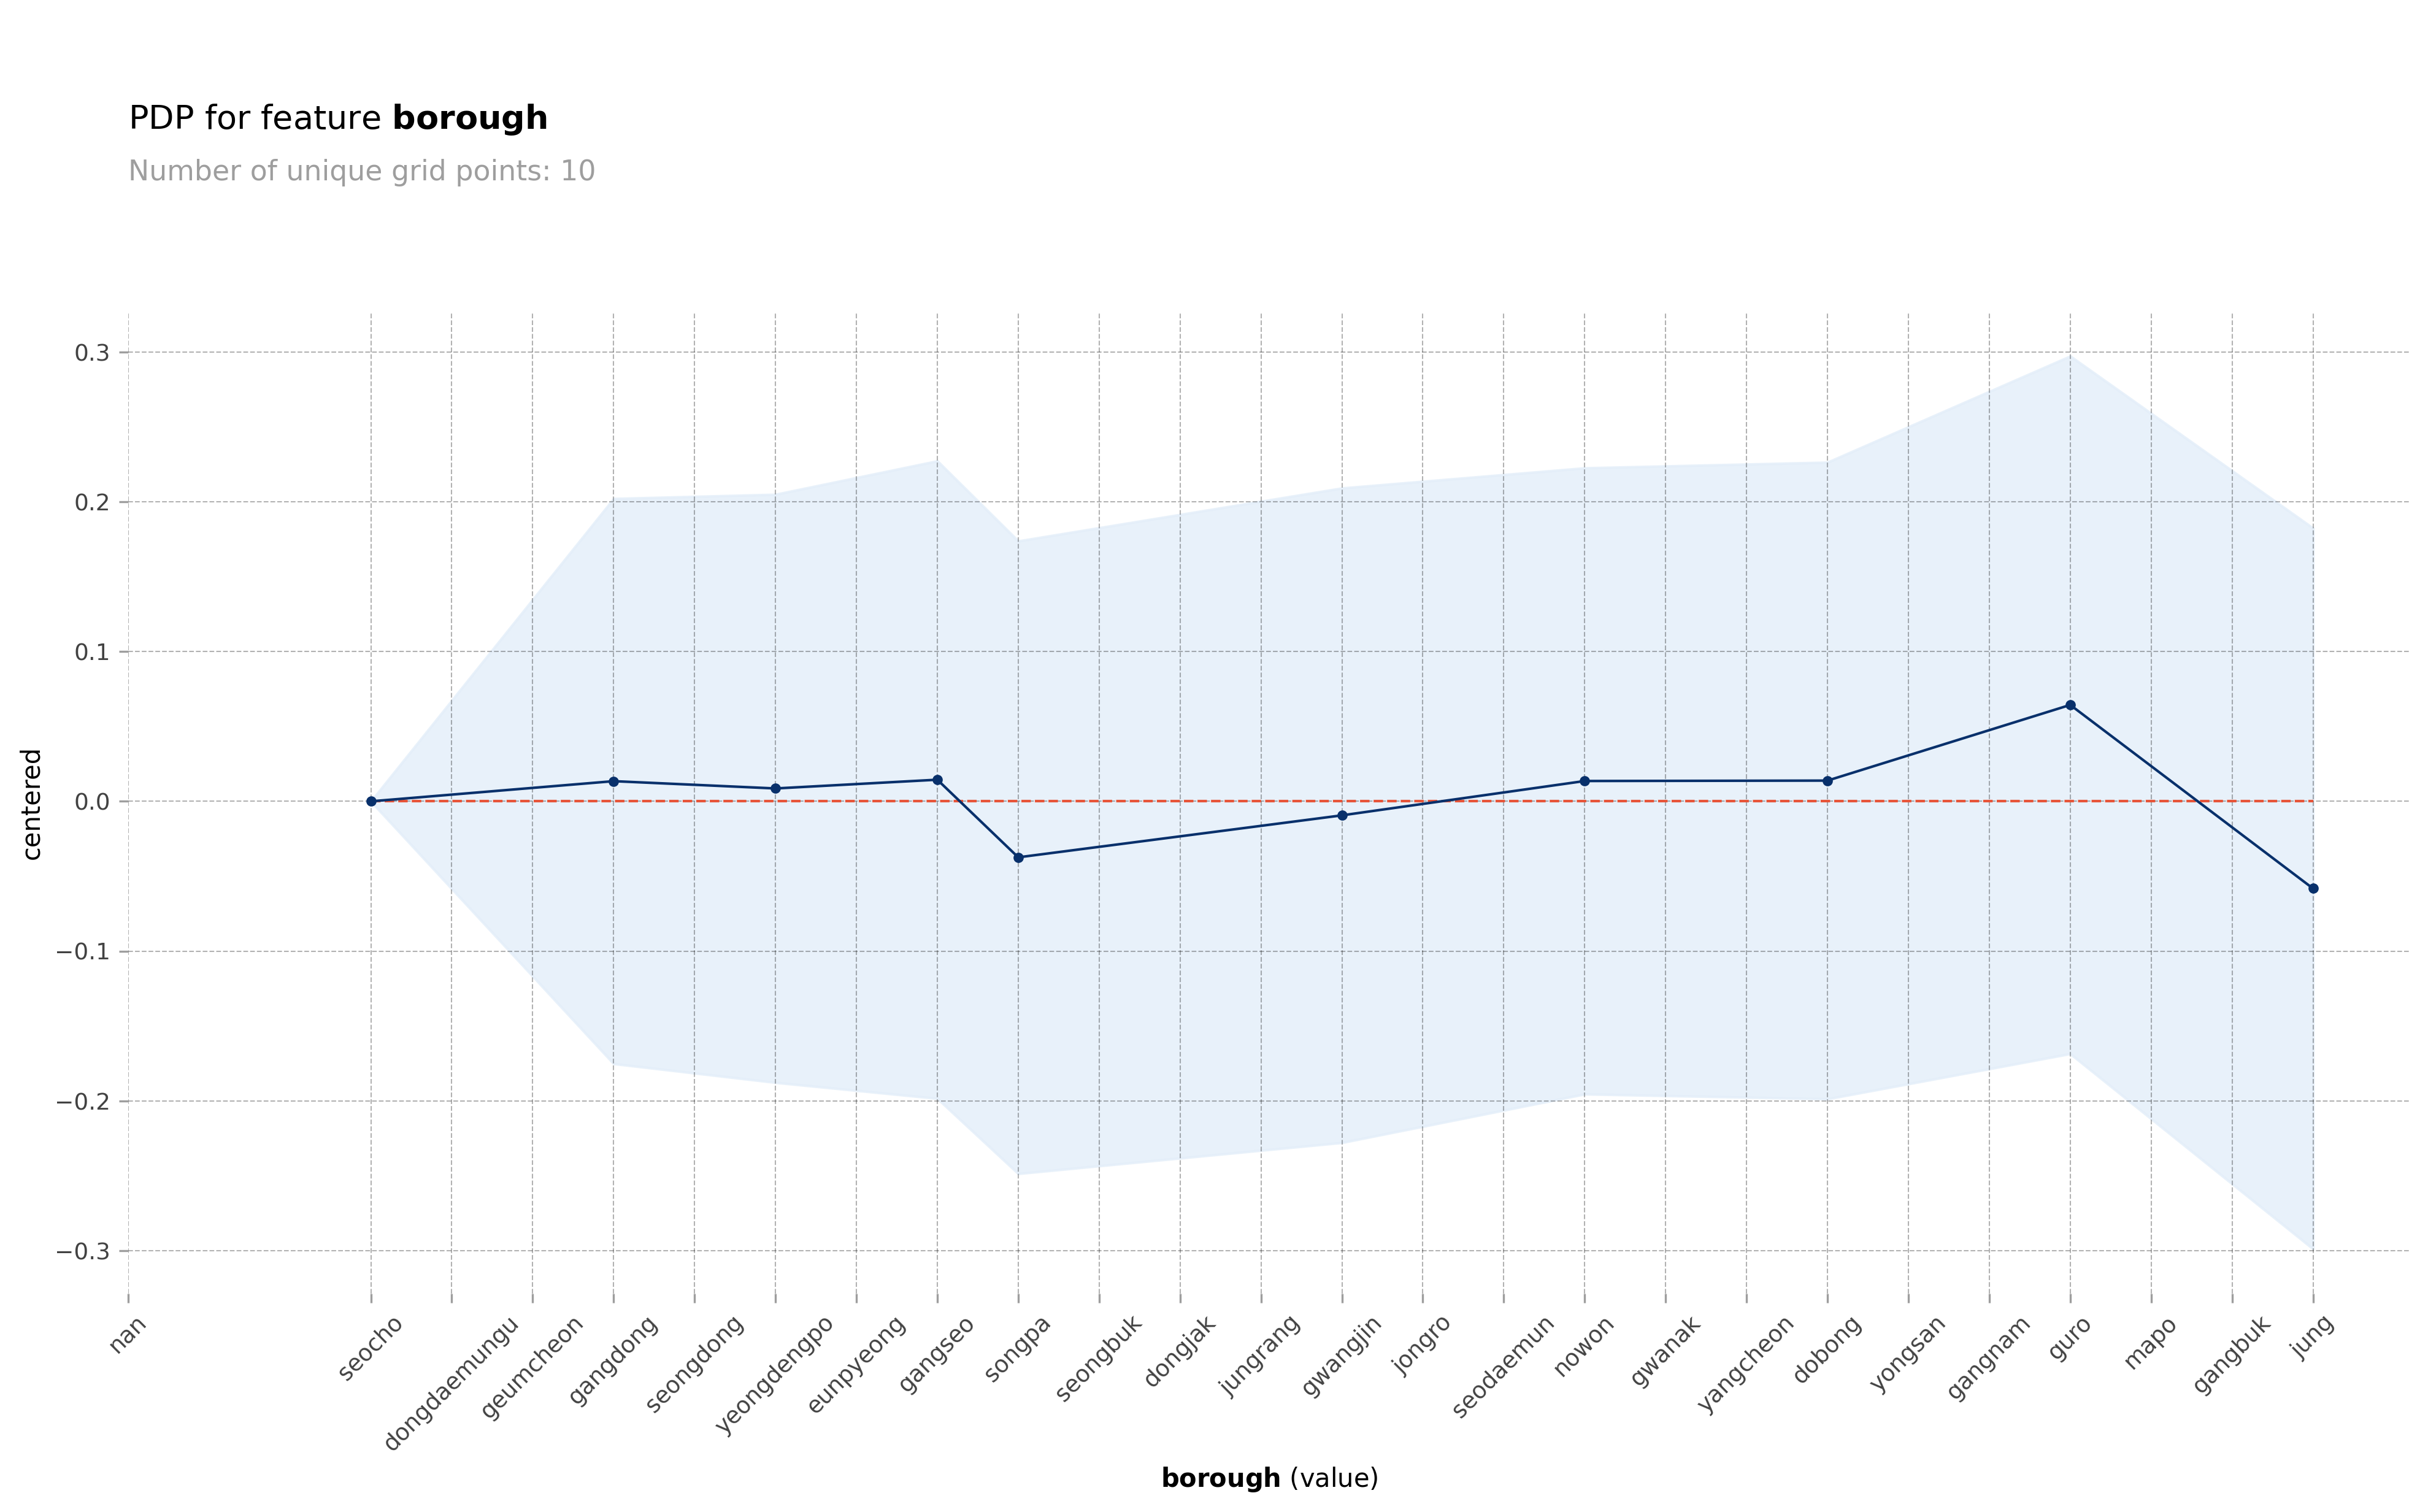

In [ ]:
pdp_isolate44.plot(engine='matplotlib')
plt.xticks(encoded_features4, original_features4, rotation=45)

([<matplotlib.axis.XTick at 0x7fcd7a88f1f0>,
 [Text(1, 0, 'apartment'), Text(2, 0, 'Officetels'), Text(-2, 0, 'nan')])

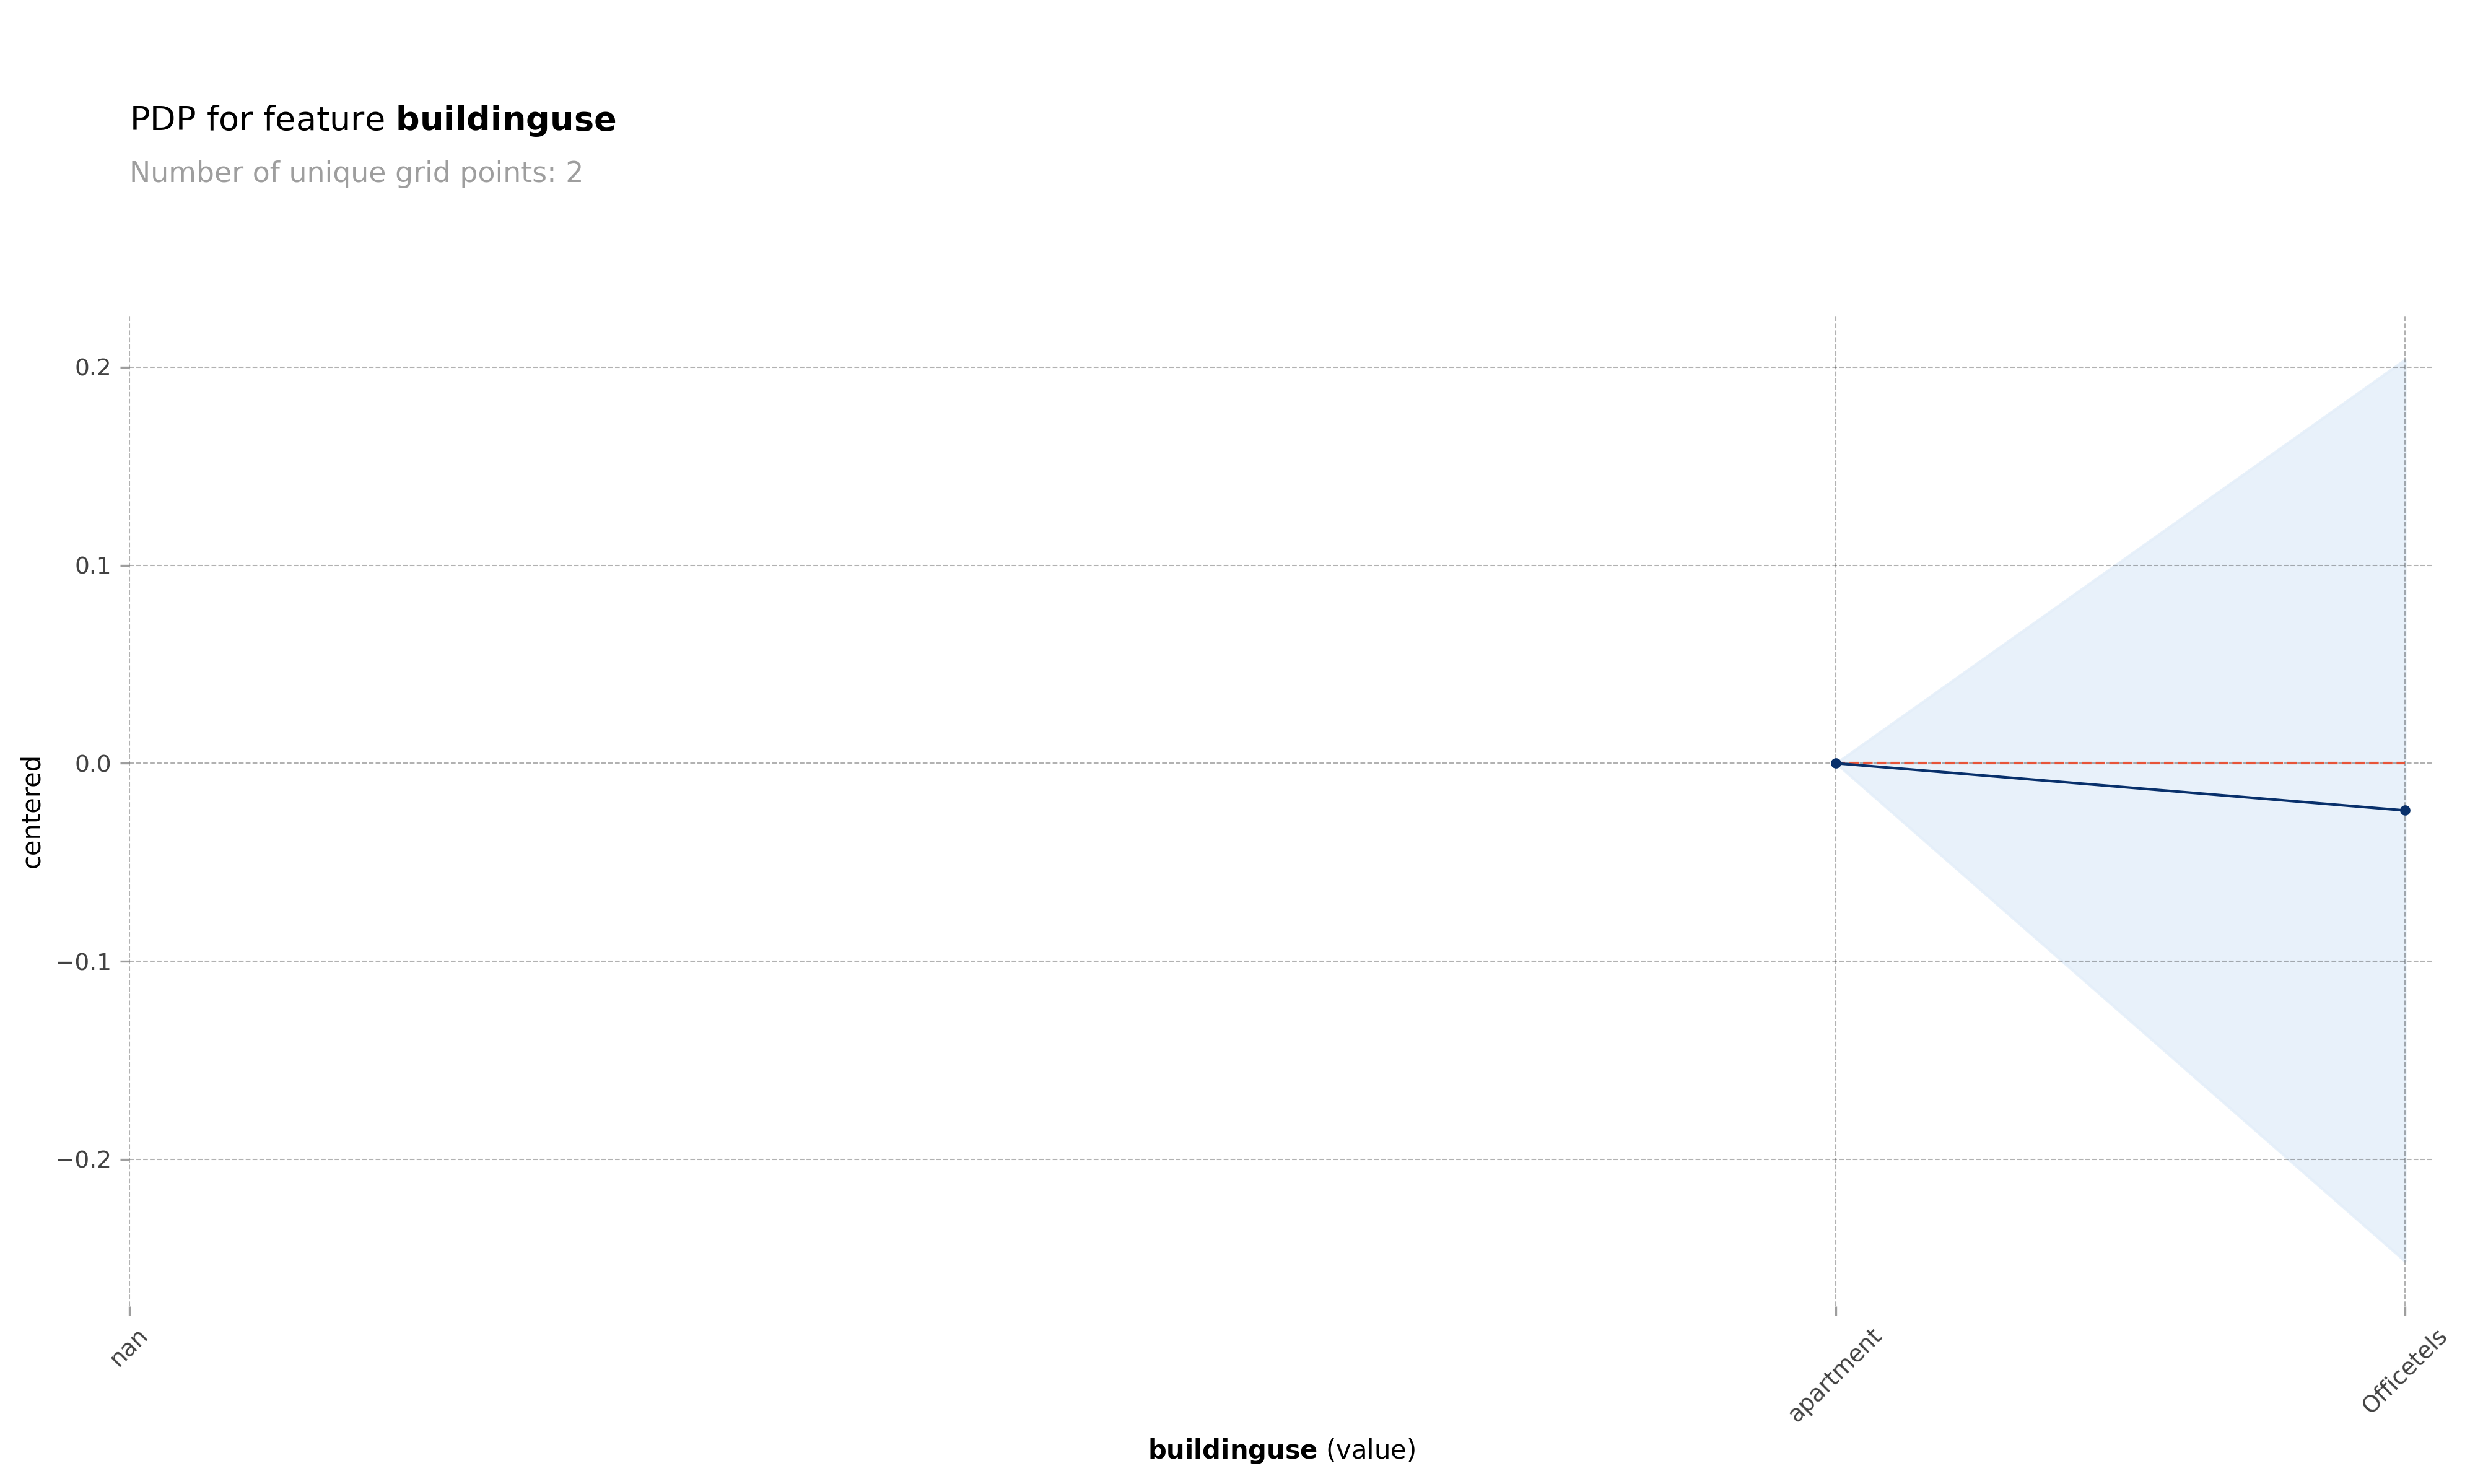

In [ ]:
pdp_isolate55.plot(engine='matplotlib')
plt.xticks(encoded_features5, original_features5, rotation=45)

([<matplotlib.axis.XTick at 0x7fcd7a6a55d0>,
 [Text(1, 0, '3.0'), Text(2, 0, '1.0'), Text(3, 0, '2.0'), Text(-2, 0, 'nan')])

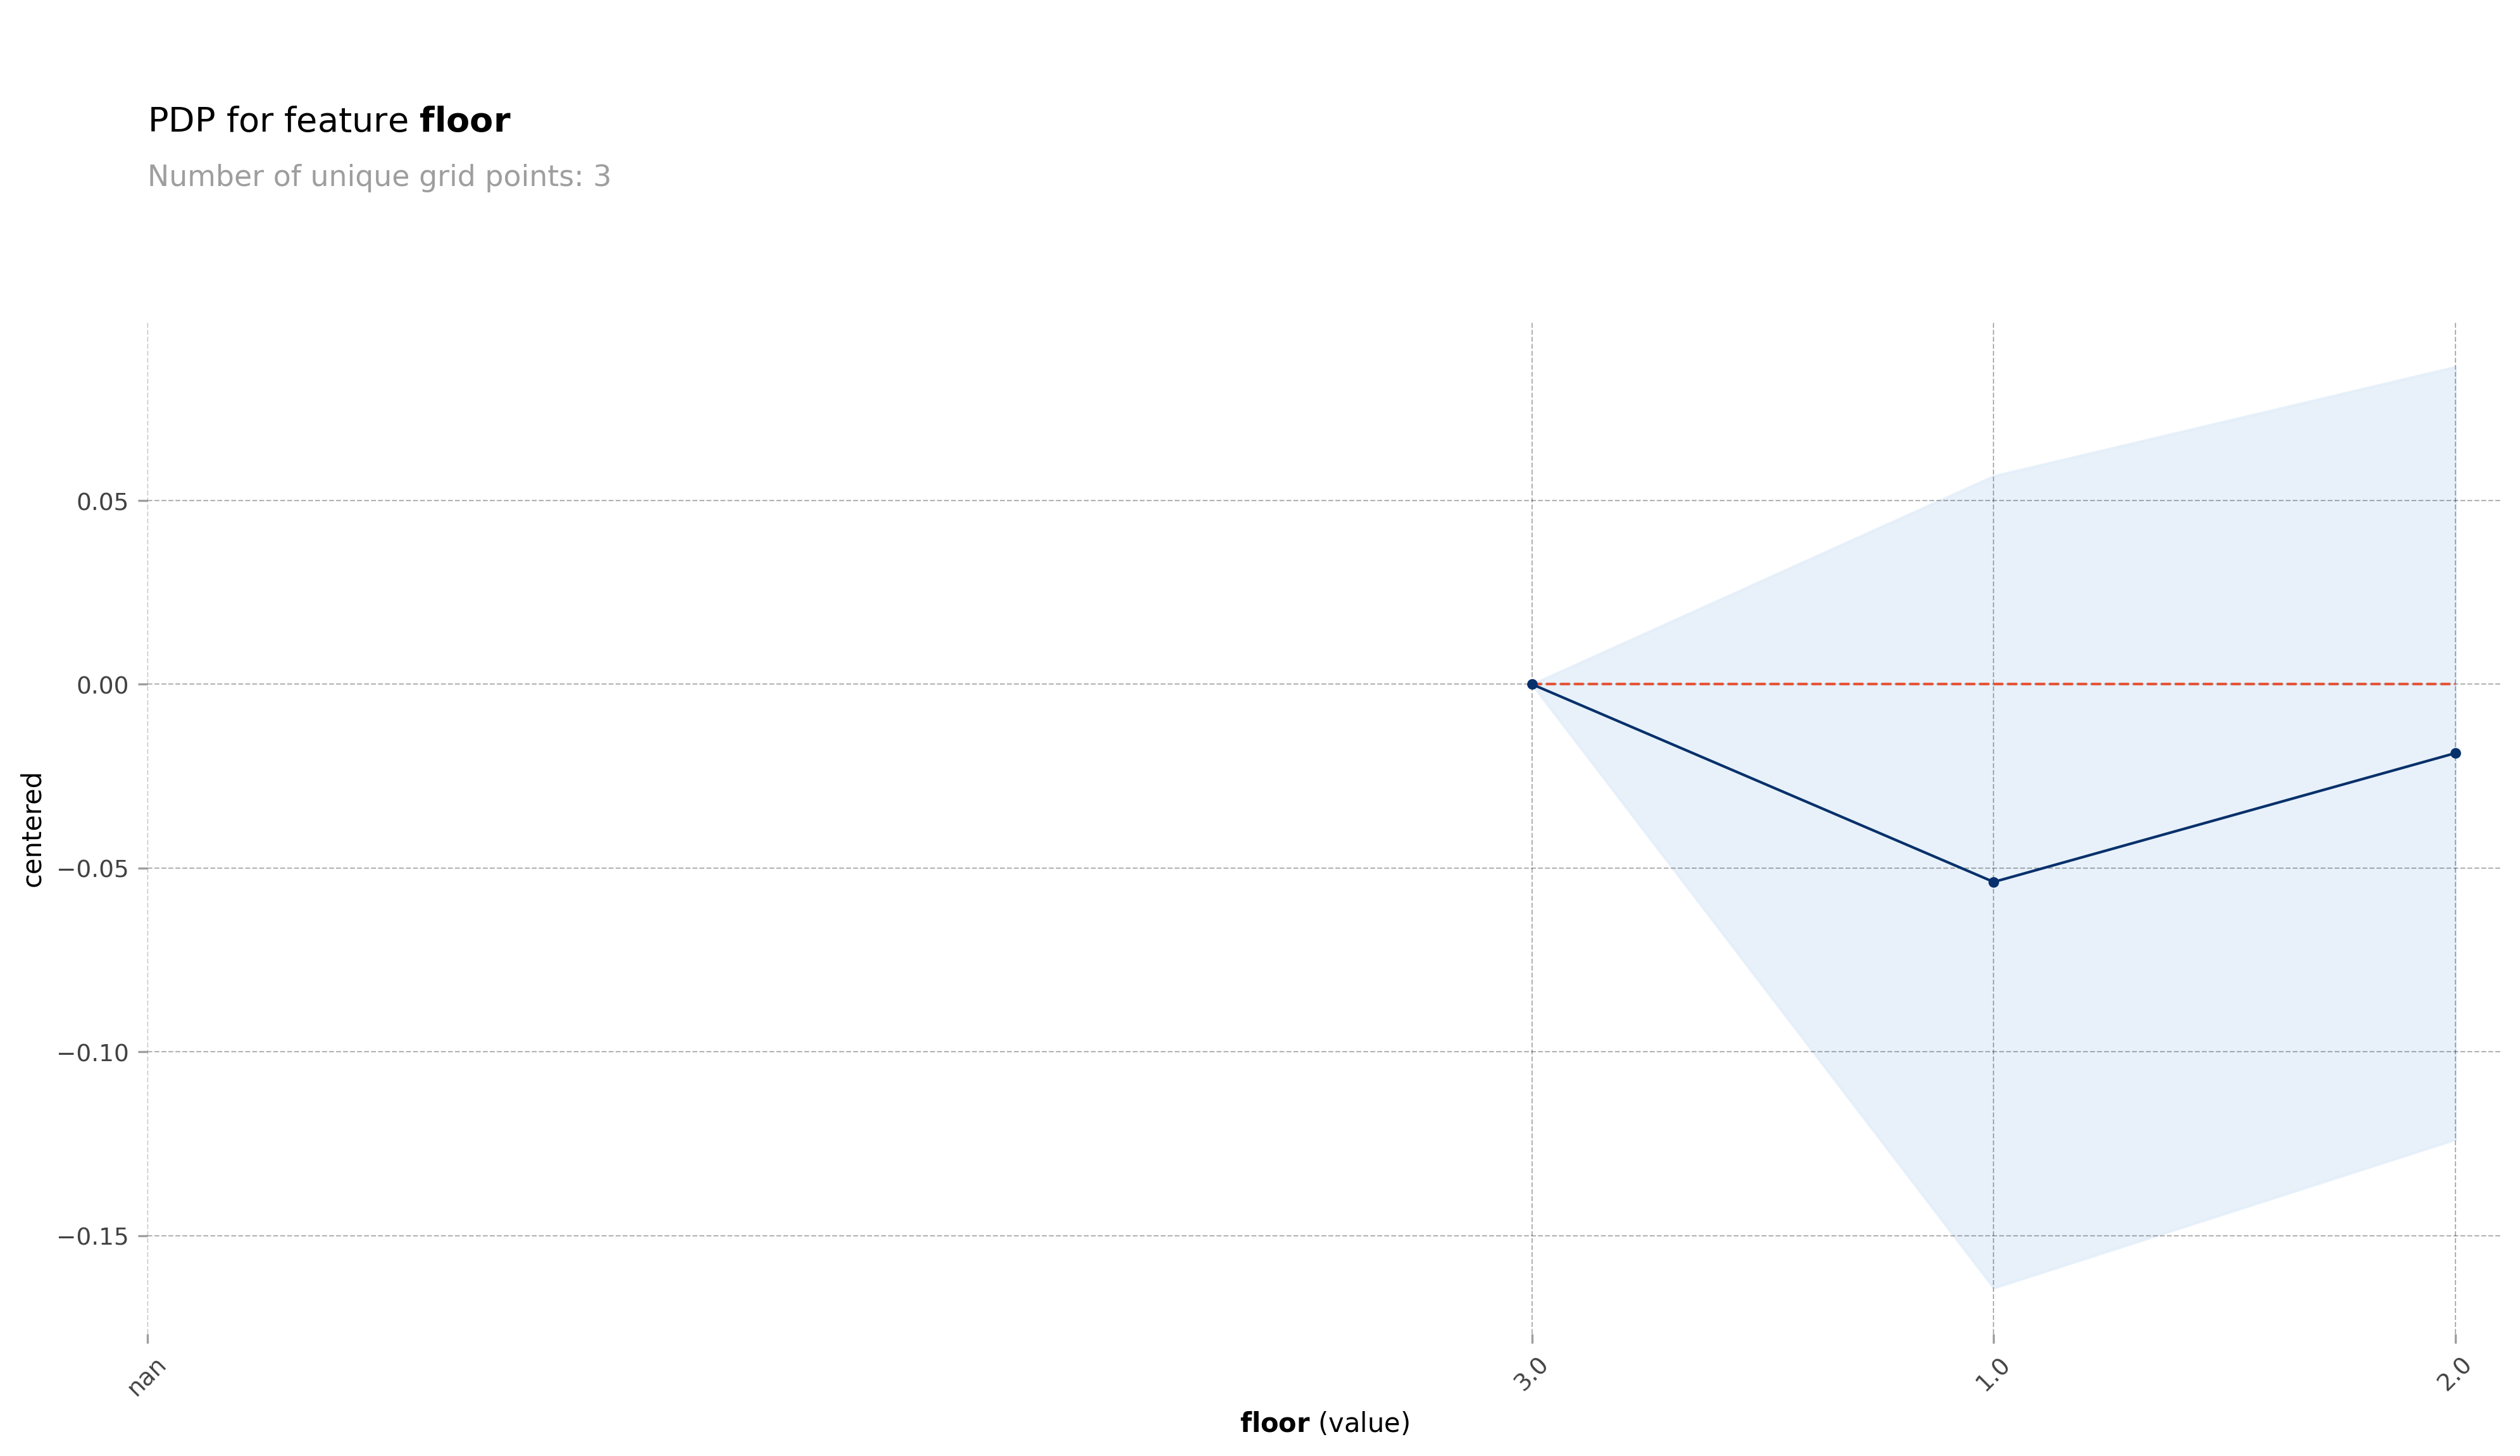

In [ ]:
pdp_isolate66.plot(engine='matplotlib')
plt.xticks(encoded_features6, original_features6, rotation=45)